In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing training and testing data
train_data=pd.read_csv('train.csv')
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test_data=pd.read_csv('test.csv')

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_y=train_data['SalePrice']
train_data=train_data.drop('SalePrice',axis=1)

In [8]:
main_df=pd.concat((train_data,test_data),axis=0)

In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:>

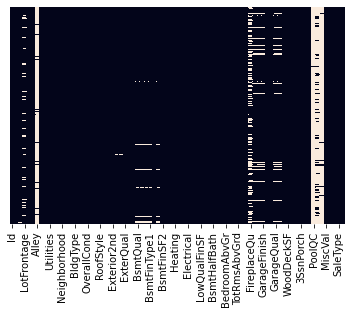

In [10]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [11]:
columns_to_drop=['Id','GarageYrBlt','YearBuilt','PoolQC','Fence','MiscFeature','Alley','FireplaceQu','MoSold','GarageCars','TotalBsmtSF','TotRmsAbvGrd']
main_df.drop(columns_to_drop,axis=1,inplace=True)

<AxesSubplot:>

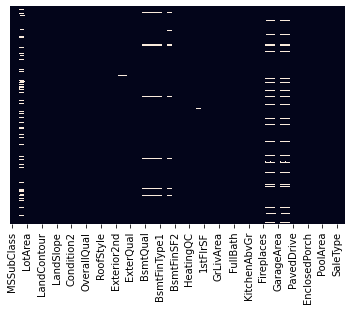

In [12]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [13]:
main_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... WoodDeckSF OpenPorchSF EnclosedPorch  \
0    AllPub    Inside       Gtl  ...          0          61             0   
1    AllPub       FR2       Gtl  ...        298           0             0   
2    AllPub    Inside       Gtl  ...          0          42             0   
3    AllPub    Corner       Gtl  ...          0          35           272   
4    AllPub       FR2       Gtl  ...        192          84             0   

  3SsnPorch ScreenPorch  PoolArea  MiscVal  YrSold SaleType SaleCondition  
0         0           0         0        0    2008       WD        Normal  
1         0           0         0        0    2007       WD        Normal  
2         0           0         0        0    2008       WD        Normal  
3         0           0         0        0    2006       WD       Abnorml  
4         0           0         0        0    2008       WD        Normal  

[5 rows x 68 columns]

In [14]:
null_table=pd.DataFrame(main_df.isnull().sum(),columns=['Null_count'])
null_table=null_table[null_table['Null_count']>0]
null_table['Null_count'].sort_values(ascending=False)

LotFrontage     486
GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Utilities         2
BsmtFinSF2        1
BsmtFinSF1        1
BsmtUnfSF         1
Electrical        1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageArea        1
SaleType          1
Name: Null_count, dtype: int64

In [15]:
nonCategorical=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                'GarageArea','BsmtUnfSF']

In [16]:
for each in nonCategorical:
    main_df[each]=main_df[each].fillna(main_df[each].mean()) 
    

<AxesSubplot:>

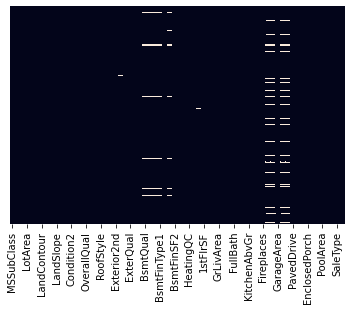

In [17]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [18]:
null_table=null_table.transpose()
null_table=null_table.drop(nonCategorical,axis=1)
null_table=null_table.transpose()

In [19]:
null_table

Null_count
MSZoning               4
Utilities              2
Exterior1st            1
Exterior2nd            1
MasVnrType            24
BsmtQual              81
BsmtCond              82
BsmtExposure          82
BsmtFinType1          79
BsmtFinType2          80
Electrical             1
BsmtFullBath           2
BsmtHalfBath           2
KitchenQual            1
Functional             2
GarageType           157
GarageFinish         159
GarageQual           159
GarageCond           159
SaleType               1

In [20]:
Categorical=null_table.index
for each in Categorical:
    main_df[each]=main_df[each].fillna(main_df[each].mode()[0])

<AxesSubplot:>

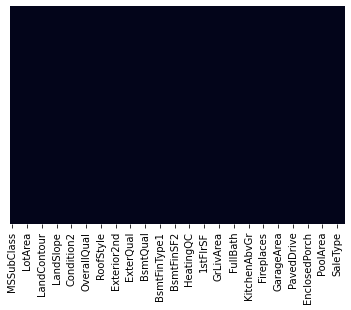

In [21]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

In [22]:
non_categoricalColumns=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                        'BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                        'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                        '3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [23]:
main_df[non_categoricalColumns].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0       706.0         0.0      150.0   
1         80.0     9600         0.0       978.0         0.0      284.0   
2         68.0    11250       162.0       486.0         0.0      434.0   
3         60.0     9550         0.0       216.0         0.0      540.0   
4         84.0    14260       350.0       655.0         0.0      490.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0       856       854             0       1710       548.0           0   
1      1262         0             0       1262       460.0         298   
2       920       866             0       1786       608.0           0   
3       961       756             0       1717       642.0           0   
4      1145      1053             0       2198       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0           61              0          0            0         0        0  
1            0              0          0            0         0        0  
2           42              0          0            0         0        0  
3           35            272          0            0         0        0  
4           84              0          0            0         0        0

In [24]:
categorical_columns=list(main_df.drop(non_categoricalColumns,axis=1).columns)

In [25]:
categorical_columns.append('YearRemodAdd')

In [26]:
def year_classify(year):
    if year in range(1950,1960):
        return '1950'
    if year in range(1960,1970):
        return '1960'
    if year in range(1970,1980):
        return '1970'
    if year in range(1980,1990):
        return '1980'
    if year in range(1990,2000):
        return '1990'
    if year in range(2000,2012):
        return '2000'
main_df['YearRemodAdd']=main_df['YearRemodAdd'].apply(year_classify)

In [27]:
no_null_train=main_df[:1460]
no_null_test=main_df[1460:]

In [28]:
no_null_train.to_csv('no_null_train',index=False)
no_null_test.to_csv('no_null_test',index=False)

In [29]:
main_df_copy=main_df.copy()

In [30]:
for each in categorical_columns: 
    df1=pd.get_dummies(main_df[each],prefix=each ,drop_first=False)
    main_df=pd.concat([main_df,df1],axis=1)

In [31]:
main_df.shape

(2919, 386)

In [32]:
main_df.drop(categorical_columns,axis=1,inplace=True)

In [33]:
main_df.shape

(2919, 336)

In [34]:
train_df=main_df[:1460]
test_df=main_df[1460:]

In [35]:
train_df.shape

(1460, 336)

In [36]:
test_df.shape

(1459, 336)

## Traning data

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
rfc=RandomForestRegressor()

In [39]:
X_train=train_df
y_train=train_y

In [40]:
rfc.fit(X_train,train_y)

RandomForestRegressor()

In [41]:
predictions=rfc.predict(test_df)

In [42]:
import pickle
filename='finalized_model.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [43]:
pred_df=pd.DataFrame(predictions)
sub_df=pd.read_csv('sample_submission.csv')
pred_df=pd.concat([sub_df['Id'],pred_df],axis=1)
pred_df.columns=['Id','SalePrice']
pred_df.to_csv('sample_submission6',index=False)

# Using StandardScaler and PCA

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
std=StandardScaler()
std.fit(train_df)
std_x=std.transform(train_df)

In [46]:
pca=PCA(n_components=2)

In [47]:
pca.fit(train_df)

PCA(n_components=2)

In [48]:
pca_x=pca.transform(train_df)

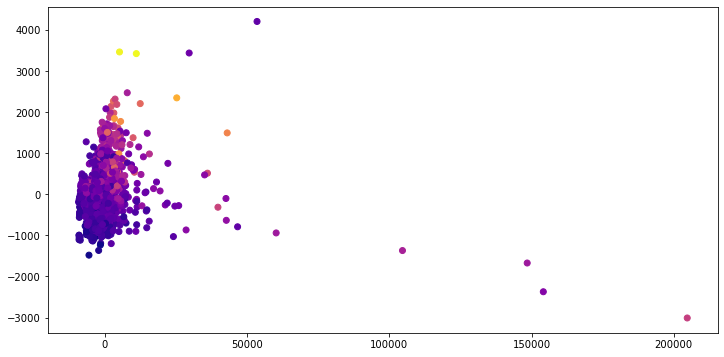

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(pca_x[:,0],pca_x[:,1],c=train_y,cmap='plasma')

In [50]:
pca_x.shape

(1460, 2)

In [51]:
rfc.fit(std_x,train_y)

RandomForestRegressor()

In [52]:
std.fit(test_df)
std_y=std.transform(test_df)
pca.fit(std_y)
pca_y=pca.transform(std_y)

In [53]:
predictions=rfc.predict(std_y)

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,3,4,5,7,9]
min_samples_leaf=[1,2,3,4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
             'criterion':['mse']
            }



In [55]:
random_search=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,n_jobs=1,cv=3,verbose=2,random_state=101)

In [56]:
random_search.fit(X_train,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse, total=   4.9s
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse, total=   5.0s
[CV] n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=120, criterion=mse, total=   5.1s
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=6, max_features=auto, max_depth=120, criterion=mse 
[CV]  n_estimators=400, min_samples_split=7, min_samples_leaf=6, max_features=auto, max_depth=120, criterion=mse, total=   6.2s
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=6, max_features=auto, max_depth=120, criterion=mse 
[CV]  n_estimators=400, min_samples_split=7, min_samples_leaf=6, max_features=auto, max_depth=120, criterion=mse, total=   7.0s
[CV] n_estimators=400, min_samples_split=7, min_samples_leaf=6, max_features=auto, max_depth=120, criterion=mse 
[CV]  n_estimators=400, min_sampl

[CV]  n_estimators=600, min_samples_split=9, min_samples_leaf=8, max_features=sqrt, max_depth=450, criterion=mse, total=   1.5s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse, total=   0.4s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse, total=   0.4s
[CV] n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=200, min_samples_split=7, min_samples_leaf=8, max_features=log2, max_depth=560, criterion=mse, total=   0.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=560, criterion=mse 
[CV]  n_estimators=1000, min_sample

[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mse, total=   1.0s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mse 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mse, total=   1.0s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mse 
[CV]  n_estimators=400, min_samples_split=9, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mse, total=   1.0s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=8, max_features=log2, max_depth=120, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=8, max_features=log2, max_depth=120, criterion=mse, total=   3.1s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=8, max_features=log2, max_depth=120, criterion=mse 
[CV]  n_estimators=1600, min_samp

[CV]  n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse, total=   1.7s
[CV] n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse, total=   1.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=780, criterion=mse, total=   9.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=780, criterion=mse, total=   9.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_samples_

[CV]  n_estimators=400, min_samples_split=7, min_samples_leaf=3, max_features=auto, max_depth=340, criterion=mse, total=   7.0s
[CV] n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse, total=  19.0s
[CV] n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse, total=  19.0s
[CV] n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=1000, min_samples_split=7, min_samples_leaf=1, max_features=auto, max_depth=780, criterion=mse, total=  19.1s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=560, criterion=mse 
[CV]  n_estimators=600, min_sa

[CV]  n_estimators=1200, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=mse, total=   3.3s
[CV] n_estimators=1200, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=mse 
[CV]  n_estimators=1200, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=mse, total=   3.2s
[CV] n_estimators=1200, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=mse 
[CV]  n_estimators=1200, min_samples_split=7, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=mse, total=   3.4s
[CV] n_estimators=1600, min_samples_split=9, min_samples_leaf=4, max_features=sqrt, max_depth=780, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=9, min_samples_leaf=4, max_features=sqrt, max_depth=780, criterion=mse, total=   4.7s
[CV] n_estimators=1600, min_samples_split=9, min_samples_leaf=4, max_features=sqrt, max_depth=780, criterion=mse 
[CV]  n_estimators=1600, min

[CV]  n_estimators=1800, min_samples_split=9, min_samples_leaf=3, max_features=log2, max_depth=1000, criterion=mse, total=   3.8s
[CV] n_estimators=1800, min_samples_split=9, min_samples_leaf=3, max_features=log2, max_depth=1000, criterion=mse 
[CV]  n_estimators=1800, min_samples_split=9, min_samples_leaf=3, max_features=log2, max_depth=1000, criterion=mse, total=   4.0s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_samples_split=9, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse, total=   2.8s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_samples_split=9, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse, total=   3.1s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, m

[CV]  n_estimators=1400, min_samples_split=9, min_samples_leaf=2, max_features=log2, max_depth=560, criterion=mse, total=   3.1s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse, total=   3.7s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse, total=   3.3s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=mse, total=   3.2s
[CV] n_estimators=400, min_samples_split=9, min_samples_leaf=3, max_features=auto, max_depth=670, criterion=mse 
[CV]  n_estimators=400, min_samples

[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=890, criterion=mse, total=   5.8s
[CV] n_estimators=2000, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=890, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=890, criterion=mse, total=   6.7s
[CV] n_estimators=2000, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=890, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=3, max_features=sqrt, max_depth=890, criterion=mse, total=   6.1s
[CV] n_estimators=1400, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=1400, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse, total=   2.8s
[CV] n_estimators=1400, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=560, criterion=mse 
[CV]  n_estimators=1400, min

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 40.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=101, verbose=2)

In [57]:
random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'mse'}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid={
    'criterion':[random_search.best_params_['criterion']],
    'max_depth':[random_search.best_params_['max_depth']],    

    
    'max_features':['auto'],
    'min_samples_leaf':[random_search.best_params_['min_samples_leaf'],
                        random_search.best_params_['min_samples_leaf']+2,
                        random_search.best_params_['min_samples_leaf']+4],
    'min_samples_split':[random_search.best_params_['min_samples_split']+3,
                        random_search.best_params_['min_samples_split']+4,
                        random_search.best_params_['min_samples_split'],
                        random_search.best_params_['min_samples_split']+1,
                        random_search.best_params_['min_samples_split']+2],
    'n_estimators':[random_search.best_params_['n_estimators']-190,
                    random_search.best_params_['n_estimators']-100,
                    random_search.best_params_['n_estimators'],
                    random_search.best_params_['n_estimators']+100,
                    random_search.best_params_['n_estimators']+200]
    
}

In [60]:
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=10,
                         n_jobs=1,verbose=2)

In [61]:
grid_search.fit(X_train,train_y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410, total=  11.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410, total=  11.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410, total=  12.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410, total=  11.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410, total=  11.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=410 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  20.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  20.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  20.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=  19.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  14.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  16.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  16.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  16.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410, total=  14.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410, total=  14.5s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410, total=  14.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410, total=  14.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=410 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=  24.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=  24.5s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=  24.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=  28.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600, total=  19.1s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600, total=  19.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600, total=  19.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600, total=  19.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410, total=  12.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410, total=  12.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410, total=  12.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410, total=  12.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=410 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=700, total=  20.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800, total=  23.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800, total=  24.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800, total=  23.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=  15.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=  14.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=  14.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=600 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=410, total=  10.5s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=410, total=  10.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=410, total=   9.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=  12.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=  20.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=  19.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=  19.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=  19.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600, total=  14.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600, total=  15.1s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600, total=  15.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=410, total=  10.1s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, total=  12.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, total=  12.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500, total=  12.1s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=  19.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=  19.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=  19.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=  19.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=  14.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600, total=  15.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=700, total=  17.1s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=700 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=  10.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=  10.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=  10.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=  10.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=  16.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=  16.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=  17.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=  16.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600, total=  13.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700, total=  14.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700, total=  14.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=  10.9s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=  10.5s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=  10.3s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500, total=  10.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=  16.8s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=  16.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800, total=  17.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=410 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=410, total=   8.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=410 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700, total=  15.0s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700, total=  14.7s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=700 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  11.2s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  10.4s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  10.6s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  10.5s
[CV] criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  criterion=mse, max_dep

[CV]  criterion=mse, max_depth=1000, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=  17.3s


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 191.6min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'criterion': ['mse'], 'max_depth': [1000],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 6, 2, 3, 4],
                         'n_estimators': [410, 500, 600, 700, 800]},
             verbose=2)

In [62]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 1000,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [63]:
predictions=grid_search.predict(test_df)

In [64]:
class Network(object):
  def __init__(self,input_nodes,hidden_nodes,output_nodes,learning_rate):
    self.input_nodes=input_nodes
    self.hidden_nodes=hidden_nodes
    self.output_nodes=output_nodes

    self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, (self.input_nodes, self.hidden_nodes))
    self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, (self.hidden_nodes, self.output_nodes))
    self.lr=learning_rate
    self.activation_function=lambda x:1/(1+np.exp(-x))
  

  def train(self,features, targets):
    n_records=features.shape[0]
    delta_weights_i_h=np.zeros(self.weights_input_to_hidden.shape)
    delta_weights_h_o=np.zeros(self.weights_hidden_to_output.shape)

    for X,y in zip(features,targets):
      final_outputs,hidden_outputs=self.forward_pass_train(X)
      delta_weights_i_h,delta_weights_h_o=self.backpropagation(final_outputs,hidden_outputs, X, y,
                          delta_weights_i_h, delta_weights_h_o)
    self.update_weights(delta_weights_i_h,delta_weights_h_o,n_records)
  
  
    def forward_pass_train(self,X):
      hidden_inputs = np.dot(X, self.weights_input_to_hidden)
      hidden_outputs = self.activation_function(hidden_inputs)

      final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output)
      # no activation function in last layer
      final_outputs = final_inputs

      return final_outputs, hidden_outputs


  def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
    # Output layer error is the difference between desired target and actual output.
    error = y - final_outputs

    # Calculate the hidden layer's contribution to the error
    hidden_error = error * self.weights_hidden_to_output

    # Backpropagated error terms
    output_error_term = error
    hidden_error_term = hidden_error.T * hidden_outputs * (1 - hidden_outputs)

    # delta weights
    delta_weights_i_h += hidden_error_term * X[:, None]
    delta_weights_h_o += output_error_term * hidden_outputs[:, None]

    return delta_weights_i_h, delta_weights_h_o


  def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
    self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records
    self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records



  def run(self, features):
    hidden_inputs = np.dot(features,self.weights_input_to_hidden)
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output)
    final_outputs = final_inputs

    return final_outputs
  


In [65]:
import sys
#from NeuralNet import Network
def MSE(y, Y):
    return (np.mean((y-Y)**2))

N_i = X_train.shape[1]


# hyperperemeters of network
iterations = 2000
learning_rate = 0.01
hidden_nodes = 8
output_nodes = 1
network = Network(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
  # Select and use random 256 records
  batch = np.random.choice(X_train.index, size=128)
  X, y = X_train.iloc[batch].values, train_y.iloc[batch].values
  network.train(X, y)

  # Printing out the training progress
  train_loss = MSE(network.run(X_train).T, train_y.values)
  #val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
  sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
  + "% ... Training loss: " + str(train_loss)[:5] )
  #+ " ... Validation loss: " + str(val_loss)[:5])
  #sys.stdout.flush()

  #for graphing training progress
  #losses['train'].append(train_loss)
  #losses['validation'].append(val_loss)

C:\Users\elklo\Anaconda3\envs\Aadesh\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Progress: 100.0% ... Training loss: 63070

In [66]:
predictions=network.run(test_df)

C:\Users\elklo\Anaconda3\envs\Aadesh\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gbr=GradientBoostingRegressor(n_estimators=500)

In [69]:
gbr.fit(X_train,train_y)

GradientBoostingRegressor(n_estimators=500)

In [70]:
predictions=gbr.predict(test_df)

In [71]:
param_grid={'loss':['ls', 'lad', 'huber', 'quantile'],
'learning_rate':[0.01,0.1,1],
'n_estimators':[100,300,500],
'subsample':[0.2,0.4,0.8,1.0],
'min_samples_split':[2,5,8,11],
'min_samples_leaf':[1,3,5,7],
'max_depth':[1,3,5,7,9],
'max_features':['auto','sqrt','log2'],
'verbose':[10]
}

In [72]:
boost_randomcv=RandomizedSearchCV(estimator=gbr,param_distributions=param_grid,n_iter=100,n_jobs=1,cv=2,verbose=10)

In [73]:
boost_randomcv.fit(X_train,train_y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] verbose=10, subsample=0.2, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=7, loss=quantile, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       16075.6562          79.5485            4.32s
         2       13276.0923          75.7781            2.28s
         3       14376.9508          95.2083            1.64s
         4       16036.8406         143.5680            1.29s
         5       12104.1229          64.8324            1.09s
         6       17715.9867         150.3870            0.95s
         7       17029.2380         118.4555            0.85s
         8       18111.1829         108.6543            0.78s
         9       15183.4132         121.5303            0.71s
        10       13960.6262         102.7919            0.67s
        11       12470.0523         114.8181            0.64s
        12       17388.2741       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        33       11572.2051          36.7472            0.30s
        34       14851.9394          64.1685            0.30s
        35       10753.5129          52.1701            0.30s
        36       11382.9314          63.8144            0.29s
        37       12929.6203          36.1177            0.29s
        38       13131.1564          90.6656            0.28s
        39       13693.2534         104.4473            0.28s
        40       13527.5651          75.8018            0.27s
        41       12943.2301          99.9949            0.26s
        42       14835.6362          65.3850            0.26s
        43       12104.8743          68.9048            0.25s
        44       12403.8385          61.1642            0.25s
        45       12371.7369          73.6348            0.25s
        46        9172.3011          28.6474            0.24s
        47       11258.7216          79.0224            0.23s
        48       14634.4873          71.1615            0.23s
        

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s



        42       14070.3121          64.4800            0.18s
        43       15075.1240          33.5103            0.18s
        44       15035.9793          71.4281            0.17s
        45       15484.7385          63.4770            0.17s
        46       12536.0658          53.9705            0.17s
        47       15932.5516          79.5360            0.17s
        48       11807.6474          73.2363            0.17s
        49       11591.5821          51.2917            0.16s
        50       14308.6407          60.3326            0.16s
        51       12875.9120          68.9605            0.16s
        52       11993.3039          75.8872            0.15s
        53       15362.7369          83.0829            0.15s
        54       13101.7790          36.6429            0.15s
        55       11515.8405          52.7534            0.15s
        56       11650.3089          41.4836            0.14s
        57       11578.9207          84.2517            0.14s
       

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


        22       12062.1452            3.00s
        23       11822.4370            3.07s
        24       11580.4219            3.09s
        25       11416.6356            3.10s
        26       11121.6096            3.13s
        27       10847.9315            3.19s
        28       10714.6110            3.18s
        29       10403.2712            3.20s
        30       10315.5342            3.15s
        31       10138.1822            3.13s
        32        9893.8534            3.16s
        33        9762.7192            3.12s
        34        9647.6562            3.12s
        35        9483.1616            3.09s
        36        9342.2123            3.08s
        37        8957.5603            3.09s
        38        8853.9466            3.06s
        39        8730.2671            3.05s
        40        8624.8822            3.00s
        41        8423.0233            2.97s
        42        8247.3479            2.96s
        43        8164.4082            2.93s
        44

       392        2463.6562            0.66s
       393        2460.6452            0.65s
       394        2457.8644            0.65s
       395        2455.1808            0.64s
       396        2452.3562            0.64s
       397        2448.8548            0.63s
       398        2446.9781            0.62s
       399        2441.9205            0.62s
       400        2438.4699            0.61s
       401        2437.4945            0.61s
       402        2433.3164            0.60s
       403        2432.2151            0.59s
       404        2428.8247            0.59s
       405        2425.6863            0.58s
       406        2421.4877            0.58s
       407        2419.1644            0.57s
       408        2417.8589            0.56s
       409        2410.7644            0.56s
       410        2409.9712            0.55s
       411        2408.9904            0.54s
       412        2405.2384            0.54s
       413        2402.1973            0.53s
       414

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


         3       29298.7342            3.48s
         4       26315.3479            3.59s
         5       24627.2466            3.46s
         6       23342.9329            3.62s
         7       22214.9233            3.66s
         8       21845.6397            3.50s
         9       21036.2836            3.49s
        10       19973.3671            3.53s
        11       19300.7068            3.47s
        12       18774.4233            3.41s
        13       18212.9603            3.29s
        14       17794.3918            3.26s
        15       17548.3575            3.20s
        16       17116.2548            3.20s
        17       16812.6370            3.15s
        18       16540.8822            3.10s
        19       16047.4014            3.14s
        20       15751.2247            3.07s
        21       14931.4315            3.10s
        22       14259.4959            3.10s
        23       14095.9658            3.07s
        24       13807.7849            3.07s
        25

       187        3961.3205            1.93s
       188        3954.0014            1.93s
       189        3951.8411            1.92s
       190        3947.9041            1.91s
       191        3935.7315            1.91s
       192        3920.6918            1.91s
       193        3914.8219            1.90s
       194        3910.5219            1.90s
       195        3899.6534            1.89s
       196        3895.0110            1.88s
       197        3887.6425            1.87s
       198        3867.8068            1.87s
       199        3863.0192            1.86s
       200        3857.0274            1.86s
       201        3842.6000            1.85s
       202        3836.2151            1.84s
       203        3831.6192            1.84s
       204        3828.8329            1.83s
       205        3821.3260            1.82s
       206        3817.8986            1.81s
       207        3811.9260            1.81s
       208        3809.3178            1.80s
       209

       380        2979.9603            0.72s
       381        2975.7808            0.72s
       382        2936.9918            0.71s
       383        2935.9274            0.71s
       384        2933.9493            0.70s
       385        2932.2096            0.70s
       386        2931.4027            0.69s
       387        2929.8836            0.68s
       388        2927.0890            0.68s
       389        2918.0342            0.67s
       390        2913.1384            0.67s
       391        2911.3438            0.66s
       392        2909.4315            0.65s
       393        2907.8479            0.65s
       394        2905.3137            0.64s
       395        2901.6315            0.64s
       396        2900.2685            0.63s
       397        2898.1301            0.63s
       398        2896.8096            0.62s
       399        2895.8425            0.61s
       400        2883.5137            0.61s
       401        2882.3178            0.60s
       402

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.9s remaining:    0.0s


      Iter       Train Loss      OOB Improve   Remaining Time 
         1       17931.3875         750.6820            0.90s
         2       14020.8262         643.5659            1.19s
         3       13919.0901         713.7312            1.09s
         4       11342.7049         637.1371            1.04s
         5       12354.8858         570.2361            1.00s
         6        9903.7282         304.3533            1.03s
         7       10281.5458         414.7978            1.00s
         8        9800.7729         295.3582            0.98s
         9        9623.4514         200.1020            0.97s
        10        8908.1062         328.8815            0.96s
        11       11302.1608         191.2110            0.95s
        12        9031.8603         141.0376            0.94s
        13        8853.5874         221.9246            0.95s
        14        7948.9756         316.7707            0.94s
        15       10076.2486         152.7615            0.93s
       

       143        2846.6745         -16.9754            0.62s
       144        2966.5622           2.2747            0.62s
       145        3478.1923           2.1142            0.62s
       146        2866.8944         -31.2974            0.61s
       147        3058.7432          -2.7513            0.61s
       148        3087.4117          -5.3802            0.61s
       149        3067.4611         -10.0808            0.61s
       150        3189.0541           4.2098            0.60s
       151        2947.4156          -5.0015            0.60s
       152        2823.9658          -3.9706            0.60s
       153        2720.0643         -11.1772            0.59s
       154        2942.0061         -12.0616            0.59s
       155        2864.2175          -7.5486            0.59s
       156        3230.7054          -0.0168            0.58s
       157        2481.1338           4.2598            0.58s
       158        3335.5825           4.2411            0.57s
       1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s remaining:    0.0s



         1       14767.1356         792.4197            2.39s
         2       14602.7062         961.1390            2.23s
         3       13960.8596        1193.4387            1.98s
         4       14002.4709         306.7364            1.85s
         5       14840.1452        1031.2093            1.83s
         6       11478.3560         269.9465            1.71s
         7       13391.6645        1068.8868            1.63s
         8       10421.8289         416.1342            1.64s
         9       10277.4095         257.5312            1.58s
        10       11001.4167         246.5981            1.54s
        11       11639.1939         246.0881            1.50s
        12       10175.3318         322.2335            1.46s
        13        9752.3040         278.3680            1.43s
        14        9080.9085          91.5650            1.41s
        15        9292.1265          82.6237            1.39s
        16        8250.7448         137.0917            1.37s
       

       148        3478.5065         -12.6590            0.57s
       149        3219.7136          -5.0312            0.57s
       150        3092.7597           2.7693            0.57s
       151        3170.9836          -2.4853            0.56s
       152        2804.2971           2.7472            0.56s
       153        3161.7414          -2.8593            0.56s
       154        2902.2774          -3.6720            0.55s
       155        3202.6004           3.2488            0.55s
       156        2731.0870         -12.8728            0.54s
       157        2882.9818          -8.4862            0.54s
       158        2867.3049          -0.8442            0.54s
       159        3431.2347          -9.3608            0.53s
       160        3242.1976          -5.4256            0.53s
       161        2720.6672          -7.1781            0.52s
       162        2429.9693         -15.3530            0.52s
       163        2853.7135           0.3426            0.52s
       1

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s remaining:    0.0s


         1  2345900251.0518    24409608.6716            7.01s
         2  1728431861.3384    19803821.2455            3.71s
         3  2423821542.2070    14511518.5070            2.55s
         4  2136637293.3261    21068814.3815            1.99s
         5  2576975228.6845    23011136.7702            1.69s
         6  2798813861.5289    18856781.6958            1.44s
         7  2245935421.9205    15774669.3859            1.27s
         8  1874026214.5199    21024157.6766            1.15s
         9  2208879543.5417    16247566.4047            1.04s
        10  1854373982.1173    17460798.4288            0.96s
        11  1692564749.9271     7689020.3078            0.89s
        12  1889456405.8531    13204372.3089            0.83s
        13  2529734925.6378    23219758.1242            0.79s
        14  1642696998.5364    17666193.6075            0.75s
        15  1896226928.1802    16192409.5212            0.71s
        16  2248739828.5945    18794249.6365            0.68s
        

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.8s remaining:    0.0s


        38  1705514057.1506    24039692.2523            0.23s
        39  1990401937.0269    23872812.2238            0.22s
        40  1599427075.8535    23102328.7411            0.22s
        41  2032394882.4390    18171018.8946            0.22s
        42  2682646585.8178    19977077.2435            0.22s
        43  1883991358.5434    13455174.6242            0.21s
        44  1861524355.7270    16817702.9301            0.21s
        45  2021463941.6861    26040977.8891            0.21s
        46  1663735628.5264    25500998.1510            0.21s
        47  1580624481.7058    18174241.7128            0.20s
        48  2053783781.1515    16032809.9328            0.20s
        49  1888153762.8711    11893236.1473            0.20s
        50  1928089538.4112    18193539.2806            0.19s
        51  2008028512.4816    21442815.8835            0.19s
        52  2240869301.4942    20067769.7211            0.19s
        53  1968275272.2093    16947555.6471            0.18s
        

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.2s remaining:    0.0s


        45  4580458690.0361   -74113479.0410            0.12s
        46  4166319444.1855  -498534852.4876            0.12s
        47  4136790812.8015  -208817209.5396            0.12s
        48  5601200907.4472  -175227589.8820            0.12s
        49  4984865378.3185  -314805852.9411            0.12s
        50  5424160434.4881  -138447062.7788            0.12s
        51  5176972292.5420  -520385926.6874            0.12s
        52  4086032843.2607  -127477108.3713            0.11s
        53  5850706938.7038  -203250886.5719            0.11s
        54  4733999062.2943   -64730767.2503            0.11s
        55  5359089216.4884  -137671350.9881            0.11s
        56  4222144917.7051  -292352836.7757            0.10s
        57  5002253635.3891  -644885302.8029            0.10s
        58  6757783044.5003  -425881383.4370            0.10s
        59  6659368544.9225  -974107084.4114            0.10s
        60  5644964187.3111  -338138189.9507            0.10s
        

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.4s remaining:    0.0s


         8  1259056801.0862    -8933568.5727            0.24s
         9   983621647.9752   -45254317.3198            0.24s
        10  1240353425.4987   -54993349.4854            0.24s
        11   934735323.5381  -117579044.9285            0.24s
        12  1361486908.4623   -61542263.0905            0.24s
        13  1195349745.6795  -178998337.3568            0.25s
        14  1489332359.5357   -91019217.4395            0.25s
        15  1200647333.5599    -6460360.0487            0.24s
        16  1255870927.7883   -53152435.5420            0.24s
        17  1257764970.3773  -148883616.6606            0.23s
        18  1629415808.8436   -32370836.1849            0.23s
        19  1393385026.7536   -49482023.9925            0.22s
        20  1626290262.7051   -94757697.0507            0.22s
        21  1545253826.6090  -172931257.0422            0.21s
        22  1918933673.1289   -89395318.7860            0.21s
        23  2052525641.9403    30404157.3342            0.20s
        

        56        2279.7097            7.86s
        57        2244.5942            7.87s
        58        2200.2283            7.87s
        59        2168.0986            7.88s
        60        2140.2535            7.89s
        61        2108.3390            7.89s
        62        2087.6493            7.89s
        63        2063.6055            7.89s
        64        2039.1496            7.89s
        65        2023.7047            7.89s
        66        2004.7937            7.89s
        67        1987.7003            7.87s
        68        1968.0318            7.86s
        69        1959.1754            7.85s
        70        1941.7509            7.85s
        71        1924.5566            7.85s
        72        1915.9002            7.84s
        73        1902.3925            7.83s
        74        1883.1723            7.83s
        75        1874.6320            7.83s
        76        1864.7045            7.82s
        77        1860.0254            7.84s
        78

       245        1417.2645            5.18s
       246        1416.2307            5.15s
       247        1415.0782            5.14s
       248        1414.2158            5.12s
       249        1412.4263            5.10s
       250        1411.9973            5.08s
       251        1410.1578            5.05s
       252        1408.5394            5.03s
       253        1407.9760            5.01s
       254        1405.5183            4.99s
       255        1404.7379            4.97s
       256        1404.3903            4.95s
       257        1403.8469            4.93s
       258        1403.3182            4.91s
       259        1402.1655            4.89s
       260        1401.8498            4.87s
       261        1400.9891            4.85s
       262        1397.7384            4.83s
       263        1396.9597            4.81s
       264        1395.9863            4.79s
       265        1393.8808            4.77s
       266        1393.2274            4.75s
       267

       430        1271.1331            1.43s
       431        1270.8861            1.41s
       432        1270.2568            1.39s
       433        1269.9003            1.37s
       434        1269.6928            1.35s
       435        1269.2280            1.33s
       436        1269.1308            1.31s
       437        1268.8093            1.29s
       438        1267.9891            1.27s
       439        1267.8683            1.25s
       440        1267.6013            1.23s
       441        1267.2247            1.21s
       442        1267.1335            1.19s
       443        1267.0655            1.17s
       444        1266.9609            1.15s
       445        1266.3107            1.13s
       446        1266.2644            1.11s
       447        1265.9373            1.09s
       448        1265.8732            1.07s
       449        1265.3626            1.05s
       450        1265.1240            1.03s
       451        1264.7462            1.01s
       452

       289        1492.6208            5.14s
       290        1492.2974            5.11s
       291        1491.1638            5.08s
       292        1491.0515            5.06s
       293        1489.8599            5.03s
       294        1489.7401            5.00s
       295        1489.1946            4.98s
       296        1488.6632            4.95s
       297        1486.2695            4.92s
       298        1484.3294            4.90s
       299        1483.5755            4.88s
       300        1482.0472            4.85s
       301        1480.6090            4.82s
       302        1480.0382            4.79s
       303        1478.8388            4.77s
       304        1478.4661            4.74s
       305        1478.2635            4.71s
       306        1477.9253            4.69s
       307        1477.1854            4.66s
       308        1476.9664            4.64s
       309        1473.5372            4.61s
       310        1472.9142            4.58s
       311

       474        1353.4410            0.62s
       475        1353.4128            0.59s
       476        1353.2726            0.57s
       477        1352.8650            0.55s
       478        1351.7660            0.52s
       479        1351.4527            0.50s
       480        1350.7726            0.47s
       481        1350.6395            0.45s
       482        1350.4337            0.43s
       483        1349.8675            0.40s
       484        1349.7974            0.38s
       485        1348.8905            0.36s
       486        1348.1768            0.33s
       487        1348.0925            0.31s
       488        1347.2693            0.28s
       489        1346.0559            0.26s
       490        1345.3951            0.24s
       491        1345.1188            0.21s
       492        1344.1962            0.19s
       493        1342.8687            0.17s
       494        1342.2408            0.14s
       495        1341.2523            0.12s
       496

       165   340719760.4374            3.13s
       166   337772169.8847            3.13s
       167   334197292.0708            3.12s
       168   330779860.2328            3.11s
       169   327157557.3504            3.10s
       170   323776554.0703            3.10s
       171   321077569.2912            3.10s
       172   318241550.4050            3.08s
       173   315704652.5208            3.07s
       174   312487879.2941            3.07s
       175   309955001.4277            3.05s
       176   307483560.5579            3.05s
       177   304525149.6338            3.03s
       178   301788184.6379            3.02s
       179   299407410.7126            3.01s
       180   297141035.6461            3.00s
       181   295666326.3634            2.99s
       182   294066146.6259            2.97s
       183   292358800.9943            2.96s
       184   290432596.9985            2.95s
       185   288680073.9051            2.94s
       186   286887759.6881            2.93s
       187

       358   114820025.9994            1.22s
       359   114324367.4869            1.21s
       360   113643656.3065            1.20s
       361   113131417.2739            1.19s
       362   112871424.9300            1.18s
       363   112640724.6311            1.17s
       364   112331170.8858            1.16s
       365   112124268.0579            1.15s
       366   111839445.8261            1.14s
       367   111141097.5418            1.13s
       368   110678859.9340            1.13s
       369   110011851.1183            1.12s
       370   109762067.8898            1.11s
       371   109544227.3613            1.10s
       372   109300478.0115            1.09s
       373   108855322.2588            1.08s
       374   108314557.2330            1.07s
       375   107984853.8333            1.06s
       376   107786138.2606            1.05s
       377   107400991.1942            1.04s
       378   107105344.4430            1.03s
       379   106928165.4673            1.02s
       380

        43  1618514292.9768            4.48s
        44  1593813356.2103            4.49s
        45  1568548549.6339            4.50s
        46  1544878371.4295            4.48s
        47  1525464519.0209            4.48s
        48  1506172185.2963            4.48s
        49  1487317053.9453            4.45s
        50  1467332861.8167            4.42s
        51  1449641000.1384            4.40s
        52  1429537790.3469            4.37s
        53  1408999721.2569            4.37s
        54  1391180087.3874            4.37s
        55  1373465067.9596            4.34s
        56  1356665599.6310            4.32s
        57  1339416671.7909            4.32s
        58  1322973343.3082            4.28s
        59  1303247747.3668            4.28s
        60  1284429146.3757            4.27s
        61  1265246916.2697            4.25s
        62  1247278346.9261            4.24s
        63  1230845201.6978            4.22s
        64  1213644830.9619            4.22s
        65

       230   239198873.1414            2.73s
       231   237169432.5917            2.73s
       232   235559248.9519            2.72s
       233   234264819.9777            2.72s
       234   233005621.2696            2.72s
       235   231852249.2799            2.71s
       236   230137127.9147            2.69s
       237   228757772.5680            2.68s
       238   227112986.7713            2.67s
       239   225239481.2201            2.66s
       240   223839129.9463            2.66s
       241   221989689.9507            2.65s
       242   220475828.8879            2.64s
       243   218955735.2756            2.63s
       244   217633572.5456            2.62s
       245   216428400.6457            2.62s
       246   215242283.0336            2.62s
       247   214085160.5920            2.62s
       248   213228355.5312            2.61s
       249   210989710.3650            2.61s
       250   209987492.5820            2.60s
       251   208874810.3242            2.59s
       252

       425   104832058.5677            0.74s
       426   104544659.1763            0.73s
       427   104373453.1041            0.72s
       428   104443777.3602            0.71s
       429   104303491.7563            0.70s
       430   104086037.3638            0.69s
       431   103722474.2326            0.68s
       432   103551378.8008            0.67s
       433   103447219.5012            0.66s
       434   103286770.3899            0.65s
       435   103116856.2990            0.64s
       436   102763804.7642            0.63s
       437   102620881.6427            0.62s
       438   102434810.2187            0.61s
       439   102291882.9656            0.60s
       440   102266493.1708            0.59s
       441   102096313.1685            0.58s
       442   101883104.2288            0.57s
       443   101797547.1610            0.56s
       444   101683308.4286            0.54s
       445   101588290.3689            0.53s
       446   101419323.4514            0.52s
       447

       100 14796914740252088320.0000 -21111817558562013184.0000            0.89s
       101 12288941125552695296.0000 -21842758066100297728.0000            0.89s
       102 13076693523812108288.0000 -34226006634455924736.0000            0.89s
       103 18655161601556824064.0000 -29566964513468137472.0000            0.88s
       104 28418859699954540544.0000 -51978983556329193472.0000            0.88s
       105 29779632160736034816.0000 -122594039144782266368.0000            0.88s
       106 47122277528845213696.0000 -169615801654876766208.0000            0.87s
       107 70140702582836240384.0000 -56917807944453259264.0000            0.87s
       108 96434612265359097856.0000 -161063637718858661888.0000            0.87s
       109 128363345401469714432.0000 -294441959728556277760.0000            0.86s
       110 74570354492724527104.0000 -307381636436338540544.0000            0.85s
       111 134222801706256203776.0000 -690102377527432970240.0000            0.85s
       112 332122691

       227 198016450582097170421435168980992.0000 -376041827126126067710922969841664.0000            0.33s
       228 178598855256744664236104477573120.0000 -400698354487939355646868523581440.0000            0.32s
       229 460044503210435824948317435985920.0000 -339480638549594859116820036583424.0000            0.32s
       230 294348622077373954499835601092608.0000 -887316508064851771221598984470528.0000            0.31s
       231 522665598562724765293716619395072.0000 -780019853952874000783715376037888.0000            0.31s
       232 339075414657306680779239348764672.0000 -1566291413605300657658916170104832.0000            0.30s
       233 463611741949492922156405877637120.0000 -1359946960892099624452629876178944.0000            0.30s
       234 600573419399309447988836617420800.0000 -1600264820910799613175525361582080.0000            0.30s
       235 883417920200719084762088796585984.0000 -2651593760564316109910475613929472.0000            0.29s
       236 1374502696181882253643

         4   473900383.8993 -2321316149.7598            1.41s
         5  1120133332.7782 -3597627625.2761            1.42s
         6  1709867281.8778 -1788904260.0560            1.42s
         7  1854104658.1280 -3656337492.4514            1.51s
         8  2121396834.6991 -4928236989.1982            1.46s
         9  2706758132.5027 -4029919711.0837            1.45s
        10  2411671271.0484 -4423998351.0956            1.42s
        11  5315550767.1122 -9164111397.2315            1.39s
        12  6142607440.7348 -8056385017.3337            1.37s
        13  6957401185.4222 -25851189346.5113            1.37s
        14  5772047181.2469 -11387648855.4041            1.37s
        15  9027976717.8283 -37581816948.5851            1.35s
        16 21831154115.0859 -40388725391.8137            1.34s
        17 15193562653.0171 -42669424028.8897            1.33s
        18 35170877494.9025 -100801777422.5942            1.33s
        19 34925093528.5896 -129846906901.3598            1.31s

       132 209671164304379317583872.0000 -318335918165982930010112.0000            0.74s
       133 226556884191933164945408.0000 -301119575282857763930112.0000            0.74s
       134 254893768856928115490816.0000 -687710795019960941805568.0000            0.74s
       135 273446317048207910109184.0000 -1287753585222699739774976.0000            0.73s
       136 764464845637726173659136.0000 -1468981919326856334540800.0000            0.73s
       137 511319227252757030240256.0000 -1737955590635893544714240.0000            0.73s
       138 799868273305477466554368.0000 -2208647141374419896631296.0000            0.72s
       139 1482264664035129405997056.0000 -2062267028220697838092288.0000            0.72s
       140 1707169934653024777535488.0000 -5667124143588577768374272.0000            0.71s
       141 1674581394609736614150144.0000 -4499888156949434704330752.0000            0.71s
       142 2160518283361233294852096.0000 -7351809424400625822597120.0000            0.70s
       14

       257 5993121432788676622237940853602516992.0000 -13091920149193663262551519300453138432.0000            0.19s
       258 15193689640251535071380376559667904512.0000 -32905175970645574656214656557458128896.0000            0.19s
       259 11530507348170167543353590787663200256.0000 -27587973671009150180381849169250222080.0000            0.18s
       260 12449239935044635357466500113060855808.0000 -19564345494188070003348011751034585088.0000            0.18s
       261 35645205753960855185728252834052308992.0000 -47293387395431875154263798199573544960.0000            0.17s
       262 40147129517477684786074284841511157760.0000 -44184008719611242703178041864994422784.0000            0.17s
       263 28924077405806323739689249663197642752.0000 -75942592927837642741331639201270071296.0000            0.17s
       264 48408877442374621175730092713923575808.0000 -66111565811726374792054299175963066368.0000            0.16s
       265 60853381996652874383169680820232257536.0000 -785982697

        41  1580374922.0399     1668375.3436            1.53s
        42   624867692.4813      702623.2118            1.55s
        43   322722887.5014    -2771144.6650            1.55s
        44   270220087.2527     1845639.6474            1.56s
        45   905744765.3945    -1551646.3033            1.58s
        46   906095556.8910     8767388.6564            1.58s
        47   881886516.6309    -5639433.8534            1.58s
        48   380033229.2901     1471917.6055            1.57s
        49   208492317.1556    -1125702.1589            1.57s
        50   303400192.3640    -2387870.9013            1.57s
        51   508807065.4486    -5528799.0634            1.57s
        52   784482160.4304    -9411541.2103            1.57s
        53  1314546275.2439    -9948655.5680            1.56s
        54   337772096.2972    -6355520.3562            1.56s
        55   423412949.8777    -5239977.1247            1.56s
        56  1362162732.4130    -3423218.4422            1.56s
        

       187    64910631.4058       85143.4433            1.16s
       188    58440666.8143    -1005142.0247            1.16s
       189   206827519.6105    -2721742.5177            1.16s
       190   534121569.9049   -10439672.9649            1.16s
       191   153334564.1439     -887265.7372            1.16s
       192   218774648.8641    -2410463.2141            1.15s
       193    81077461.0751     -818049.6480            1.15s
       194   574311119.2236    -4820732.5041            1.15s
       195   650079603.3879    -7724818.0987            1.14s
       196   240744971.5026    -1565438.9145            1.14s
       197   965069643.0403    -3473761.5318            1.14s
       198   169056699.5140    -1784167.5038            1.13s
       199   135493915.8235    -1580679.0339            1.13s
       200   576238175.7390    -5864981.1489            1.13s
       201   108772175.3146    -2790534.6756            1.12s
       202   127433338.6173    -1970630.4577            1.12s
       2

       333   311916767.9301    -3871879.0666            0.63s
       334    86816356.0620    -1769779.7871            0.63s
       335    57707560.4011     -118416.7166            0.63s
       336    30066894.0746     -102428.8927            0.62s
       337    53020844.9081    -1321944.4281            0.62s
       338   531358137.2884     -534685.8632            0.62s
       339    50338443.8899     -309840.1824            0.61s
       340    73669745.5916     -375802.1215            0.61s
       341    47420242.5744     -448938.7351            0.60s
       342   773440503.7368    -2887664.5962            0.60s
       343   540207414.1343    -7719803.6692            0.60s
       344    39860636.0070       -5417.5601            0.59s
       345    25085474.7463    -2114183.7598            0.59s
       346    58487854.4948    -2271557.2215            0.59s
       347    69854176.8235     -605701.4198            0.58s
       348    50400040.8635    -1338819.2277            0.58s
       3

       475   434984137.1340    -5561334.1076            0.10s
       476    76164079.4338    -1437662.2839            0.09s
       477    52088788.7631      -12280.1924            0.09s
       478    55263604.5286     -183770.2957            0.08s
       479   192384216.9009    -1257034.0658            0.08s
       480    57893823.1025     1074648.3790            0.08s
       481    66404736.6421     -805179.5729            0.07s
       482    67318599.1457      344205.6104            0.07s
       483    19592018.0853      595727.4549            0.07s
       484    35647132.5608     -127560.6476            0.06s
       485    79922513.3802    -1051023.0333            0.06s
       486    32275318.0907     -182344.4005            0.05s
       487    47506694.2089     -720662.0185            0.05s
       488   386593394.1955    -2050501.0274            0.05s
       489    87258172.2602    -2507424.3271            0.04s
       490    76008956.0966    -1316433.7349            0.04s
       4

       116   825352372.9664     -349419.4063            1.41s
       117   261933872.3771    -6098960.2059            1.41s
       118   246250965.5807    -1632308.9103            1.41s
       119   809435186.8255   -10189960.5644            1.41s
       120   319941038.2703    -2970444.2029            1.41s
       121   155019709.3878     1856517.3821            1.41s
       122   345726817.5065    -3212199.0234            1.41s
       123   277663204.2983     -499752.6047            1.40s
       124   691229293.0321    -8008154.7356            1.40s
       125   188767648.6706    -2566910.3570            1.40s
       126   248606335.7202    -6751774.1460            1.39s
       127   711703979.8838    -7682986.4677            1.39s
       128   164225275.1966      803332.3912            1.39s
       129   250543635.5273     -865737.0717            1.39s
       130   198584167.5263    -7091585.7720            1.38s
       131   178179734.5748    -3784165.5762            1.38s
       1

       261    92114806.1525     -676862.9194            0.91s
       262   523665915.2463    -5995422.9138            0.90s
       263   135025910.0059    -1479030.8680            0.90s
       264   189518587.2859    -1475923.5224            0.90s
       265   105055012.8123    -1146587.4950            0.89s
       266    63870539.8361    -1049477.1645            0.89s
       267   194257873.2389    -1155099.6507            0.89s
       268    95893747.1672     -813331.2667            0.88s
       269   126948996.1874     -822097.5211            0.88s
       270    83870909.0636    -2433808.1832            0.88s
       271   560642924.5517    -3529879.8913            0.87s
       272   472657399.6768    -1296929.4498            0.87s
       273   103514603.8427    -1243533.4452            0.87s
       274    68154074.7704    -1997195.8383            0.86s
       275   493004431.8527    -8568749.3925            0.86s
       276    79809427.9347     -447758.4512            0.86s
       2

       404    34903376.5327      679030.8832            0.37s
       405    47770221.5888     -764785.7234            0.37s
       406    34016259.6769     -307106.9377            0.36s
       407    50399574.1468    -1072475.7773            0.36s
       408    80567070.0654     -649621.0346            0.35s
       409    51794456.7481    -2363455.9196            0.35s
       410    43508926.6340     -371151.3362            0.35s
       411   361670475.4289    -4824726.0342            0.34s
       412   352755297.5990    -5130967.5186            0.34s
       413    47109635.3008     -164841.4597            0.34s
       414    81818402.2824    -1075197.2178            0.33s
       415    49160628.0935    -1914502.0607            0.33s
       416    96977000.6754     -791422.6178            0.32s
       417    40121942.2218      234992.6918            0.32s
       418    40588829.4191     -879327.7596            0.32s
       419    48631212.7077     -986228.2768            0.31s
       4

        64   843297742.4502    -5259501.9941            0.62s
        65   802515739.5115   -43228558.6267            0.61s
        66   704025255.7249   -18465246.2039            0.60s
        67   703854326.8567   -38770597.1340            0.59s
        68   789806772.8312   -40642742.1756            0.58s
        69   810260633.4213   -68902502.8102            0.57s
        70   739419911.3492  -123972606.2488            0.62s
        71   939312773.0679    -2090634.4554            0.61s
        72   733085241.2582   -41881266.1702            0.61s
        73   874182294.7001   -84616021.3819            0.61s
        74   829967651.9574  -231924136.5970            0.60s
        75   971412840.3450   -97609575.0232            0.60s
        76  1037399490.7484   -31605426.4887            0.60s
        77   877382749.2752   -37320899.2768            0.60s
        78  1119950081.0669   -13915749.6126            0.59s
        79   998663648.6626   -35486574.5161            0.59s
        

       209  1455253500.1246   -79177391.9667            0.23s
       210  1366848814.6909   -59461431.8378            0.23s
       211  1315406150.6900  -116054376.6422            0.23s
       212  1537147143.1749   -54334407.0786            0.23s
       213  1523440369.2748  -100148558.8564            0.22s
       214  1317236053.9792   -37217115.0595            0.22s
       215  1748467317.6830   -78210893.0066            0.22s
       216  1523583096.7378  -213849560.1151            0.22s
       217  1566630674.7373  -140832905.9667            0.21s
       218  1658191927.0811  -176793983.3084            0.21s
       219  1542251699.5642    40592328.8089            0.21s
       220  1329849470.0209   -26023703.9997            0.21s
       221  1696992075.0006    -7492566.1701            0.20s
       222  1763656496.2400   -24936189.6758            0.20s
       223  1547299107.0124    -9646634.5321            0.20s
       224  1545545868.2667   -86603770.5370            0.20s
       2

        39   923694965.9286   -60786095.8822            0.66s
        40  1051326312.7323    14810988.3539            0.66s
        41   990347694.9027   -97776016.7811            0.66s
        42   988792993.9324   -21145355.8809            0.66s
        43  1028411604.2427   -76296498.8164            0.66s
        44   938297574.6631   -72278120.6582            0.66s
        45  1020614163.1360   -23551415.2063            0.67s
        46   974225049.9711   -50118296.7483            0.67s
        47   875428902.3438   -84591035.3408            0.67s
        48   959071640.2033   -78191136.3180            0.67s
        49   912089040.5734   -44447438.1417            0.66s
        50  1099644124.0084   -12652851.1640            0.66s
        51   983560390.5335    -1436780.8406            0.66s
        52  1118425222.9237   -51024589.1010            0.66s
        53   899581064.5623   -61794681.9044            0.65s
        54   908200992.3606   -48592919.8792            0.65s
        

       181  1785364098.7352  -229342337.7580            0.31s
       182  1619648704.4624  -123418985.1598            0.31s
       183  2036457224.1635   -26626488.0274            0.30s
       184  1762754529.7751  -105475089.0878            0.30s
       185  1791124733.3889  -184568597.1252            0.30s
       186  1761305549.8047   -95292253.6798            0.30s
       187  2292272735.1500   -70171458.6891            0.29s
       188  1977391588.1101  -123100132.2901            0.29s
       189  2078146550.5263  -167002484.0716            0.29s
       190  2083417272.1941  -150036319.2008            0.29s
       191  2092428213.0207   -73495527.5710            0.29s
       192  2228619287.3780  -150381376.6322            0.28s
       193  2190839934.5687  -128344141.2888            0.28s
       194  1686451157.3795  -102415790.0688            0.28s
       195  2336616286.3667   -10058339.4616            0.27s
       196  2071229393.2831     8675573.8592            0.27s
       1

        18       19242.9578            5.97s
        19       18542.4779            5.91s
        20       17849.2455            5.80s
        21       17247.5957            5.62s
        22       16711.5229            5.46s
        23       16213.0027            5.35s
        24       15606.7252            5.24s
        25       15142.7380            5.11s
        26       14772.6887            4.97s
        27       14417.8700            4.86s
        28       13973.1803            4.80s
        29       13607.5808            4.76s
        30       13307.8410            4.76s
        31       12967.8383            4.74s
        32       12762.1611            4.65s
        33       12402.8187            4.57s
        34       12183.9153            4.56s
        35       11980.7763            4.51s
        36       11745.1376            4.44s
        37       11602.6514            4.36s
        38       11366.8001            4.27s
        39       11167.8071            4.18s
        40

       217        4318.2945            0.81s
       218        4306.2429            0.81s
       219        4299.2321            0.80s
       220        4292.9500            0.79s
       221        4278.5217            0.78s
       222        4262.4367            0.77s
       223        4255.3831            0.76s
       224        4248.0644            0.75s
       225        4241.5640            0.73s
       226        4233.8332            0.72s
       227        4215.4743            0.71s
       228        4203.4308            0.70s
       229        4196.2465            0.69s
       230        4190.2345            0.68s
       231        4185.6180            0.67s
       232        4180.0421            0.66s
       233        4172.6472            0.65s
       234        4170.3472            0.64s
       235        4161.2432            0.63s
       236        4155.8786            0.62s
       237        4150.2356            0.61s
       238        4144.0647            0.60s
       239

       100        7131.4748            1.67s
       101        7111.8703            1.67s
       102        7062.7621            1.66s
       103        7011.9404            1.65s
       104        6986.5881            1.64s
       105        6965.5117            1.63s
       106        6946.5625            1.62s
       107        6931.3476            1.61s
       108        6893.4413            1.61s
       109        6881.4906            1.59s
       110        6873.0122            1.58s
       111        6834.6635            1.56s
       112        6814.5701            1.55s
       113        6790.8388            1.54s
       114        6760.1172            1.52s
       115        6711.7885            1.52s
       116        6694.5557            1.51s
       117        6667.3239            1.49s
       118        6628.7858            1.48s
       119        6597.1542            1.47s
       120        6557.6136            1.47s
       121        6531.8441            1.45s
       122

       293        4307.9315            0.06s
       294        4301.4542            0.05s
       295        4291.3515            0.04s
       296        4284.0977            0.03s
       297        4281.2167            0.02s
       298        4268.9637            0.02s
       299        4263.4465            0.01s
       300        4260.3003            0.00s
[CV]  verbose=10, subsample=1.0, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=9, loss=lad, learning_rate=0.1, score=0.854, total=   2.5s
[CV] verbose=10, subsample=0.8, n_estimators=500, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=9, loss=lad, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       51997.3504         341.5192            4.49s
         2       52934.7709         302.1467            4.73s
         3       51737.6945         346.3771            4.64s
         4       51656.6256         247.5111            4.

       134       22883.2831         102.4494            4.42s
       135       23449.5682         110.8298            4.42s
       136       23945.4615          72.2881            4.40s
       137       22079.2351          71.6997            4.39s
       138       21770.1930          80.7960            4.37s
       139       22658.8681          96.3808            4.36s
       140       22269.5136          74.9432            4.35s
       141       23246.9714          77.4596            4.33s
       142       21398.3225          92.0045            4.32s
       143       22332.0973          61.0669            4.30s
       144       21610.8438         105.3588            4.28s
       145       21777.5589          68.5545            4.26s
       146       21087.7848          66.2286            4.24s
       147       21536.7448          90.3102            4.22s
       148       22022.6966          78.2950            4.21s
       149       22222.7493          35.0070            4.19s
       1

       410        9495.5409           8.4978            0.91s
       411       10041.2303          18.3680            0.90s
       412        9924.9792          -0.5490            0.89s
       413        9828.2246           0.9636            0.88s
       414        9830.9550          -1.5239            0.87s
       415        9183.1442           1.2093            0.85s
       416        9461.5241          10.2077            0.84s
       417        9401.7402           6.5500            0.83s
       418        9621.0860          12.0721            0.82s
       419        8904.8916           7.8128            0.81s
       420        9607.8767          -9.2075            0.80s
       421        9281.8734           1.8125            0.79s
       422        8710.1492          -1.1516            0.78s
       423        9189.5213          19.8617            0.77s
       424        9100.7583           5.2346            0.76s
       425       10036.8135           7.1851            0.75s
       4

        38       43548.6044         296.1662            4.65s
        39       45298.3608         248.1471            4.67s
        40       42085.5818         263.2444            4.70s
        41       45486.4100         249.9078            4.70s
        42       42940.3427         313.0570            4.68s
        43       42750.3323         241.0865            4.67s
        44       42760.1028         215.5218            4.65s
        45       42433.0217         254.1154            4.65s
        46       42812.6154         184.3188            4.62s
        47       41108.5807         248.6920            4.60s
        48       42604.7494         308.2461            4.59s
        49       41823.9308         230.7250            4.58s
        50       42353.3717         210.9438            4.57s
        51       39381.2214         261.8430            4.57s
        52       41647.2569         250.3225            4.55s
        53       38822.2319         252.8412            4.56s
        

       185       20379.5904          36.1865            3.37s
       186       19804.8572          68.8287            3.35s
       187       19829.7933          29.7954            3.35s
       188       18711.7115          47.7552            3.32s
       189       18901.4233          69.2338            3.32s
       190       19057.9407          69.9429            3.32s
       191       18463.1348          72.4071            3.30s
       192       17137.4336          63.4670            3.29s
       193       18610.8403          68.0721            3.28s
       194       18835.1588          35.7768            3.26s
       195       18652.6382          55.2589            3.25s
       196       18773.6834          38.6175            3.23s
       197       18334.4963          40.9962            3.22s
       198       17212.9096          33.7612            3.20s
       199       18132.3953          33.2941            3.19s
       200       17304.0528          35.9118            3.17s
       2

       335       11977.7068          16.4206            1.65s
       336       11965.1747           5.5213            1.64s
       337       11670.6937           3.8325            1.63s
       338       11749.4924          -6.3912            1.61s
       339       11820.4110          14.0623            1.61s
       340       11774.2285           4.1259            1.59s
       341       10887.7221           8.5087            1.59s
       342       11434.7866           2.3973            1.57s
       343       10773.9273          13.4608            1.57s
       344       12065.0819           0.0675            1.56s
       345       11000.5947          11.7305            1.54s
       346       11172.5849          -2.5267            1.53s
       347       11121.0934          14.8997            1.52s
       348       10761.3501          33.6291            1.51s
       349       10567.0424          17.5581            1.50s
       350       11275.4780          20.4374            1.48s
       3

       488        8409.4653           3.4109            0.11s
       489        7870.1263          -1.2296            0.10s
       490        8976.9867           1.5068            0.09s
       491        8848.4059          14.5579            0.08s
       492        8412.3391          -1.5895            0.07s
       493        8207.7250           8.0373            0.06s
       494        8713.7855           4.8238            0.06s
       495        8670.4618           6.6780            0.05s
       496        8670.3324           4.4241            0.04s
       497        8841.8411          -1.4070            0.03s
       498        8450.5089           2.9205            0.02s
       499        8589.7057          -1.3969            0.01s
       500        8816.0675           4.7639            0.00s
[CV]  verbose=10, subsample=0.8, n_estimators=500, min_samples_split=8, min_samples_leaf=1, max_features=sqrt, max_depth=9, loss=lad, learning_rate=0.01, score=0.822, total=   4.7s
[CV] verbose=

       168        6674.3586          21.1593            0.82s
       169        7967.3908          17.1204            0.82s
       170        8898.0932          25.1439            0.82s
       171        5976.6855          15.2132            0.82s
       172        8445.2675          41.7693            0.82s
       173        6793.4033          19.7901            0.82s
       174        6256.4041          26.1409            0.82s
       175        5745.6986          18.2973            0.82s
       176        6528.5724          20.2817            0.82s
       177        6367.3533          21.0544            0.81s
       178        5886.0765          26.6183            0.81s
       179        8211.0809          35.8000            0.81s
       180        6610.2320          31.9319            0.81s
       181        6127.5625          30.2382            0.80s
       182        7172.0006          25.3260            0.80s
       183        5801.1772          20.1697            0.80s
       1

       317        4603.0458           4.6636            0.46s
       318        3697.7179           4.3850            0.45s
       319        4566.2726           3.2496            0.45s
       320        5674.4910           5.7893            0.45s
       321        4189.8116           7.7579            0.45s
       322        5110.0936           2.6654            0.44s
       323        4370.0390           4.6563            0.44s
       324        4069.3143           5.2520            0.44s
       325        4407.9324           7.3963            0.44s
       326        3877.9631           4.4539            0.44s
       327        4325.4335           5.5960            0.43s
       328        4942.0472           6.0969            0.43s
       329        4376.0705           3.5252            0.43s
       330        4606.5280           1.1682            0.43s
       331        4067.4529           1.6893            0.42s
       332        4256.6960           7.2240            0.42s
       3

       459        3650.7461           1.9520            0.10s
       460        3606.1957           2.8478            0.10s
       461        3788.4918          -0.6147            0.10s
       462        3644.9149           2.9284            0.10s
       463        3654.1688           2.2366            0.09s
       464        3540.9582           0.8167            0.09s
       465        3689.8379           1.3904            0.09s
       466        4677.4865          -0.5911            0.09s
       467        4016.1202           4.2960            0.08s
       468        3524.3197           3.9647            0.08s
       469        4398.5379          -1.8005            0.08s
       470        3647.2780          -0.5442            0.08s
       471        3818.9942           3.3150            0.07s
       472        2899.2692           0.2347            0.07s
       473        3422.7792           1.8534            0.07s
       474        3668.9211           1.0250            0.07s
       4

        92       13657.1001          30.8805            1.01s
        93       11238.8705          37.2290            1.01s
        94       12113.3695          49.3438            1.01s
        95       10108.3020          26.1208            1.01s
        96        8521.5197          40.9645            1.01s
        97       12045.5426          47.7367            1.00s
        98        9129.1609          38.0856            1.01s
        99        8402.7892          25.5713            1.01s
       100        9215.6212          29.2149            1.01s
       101       10505.6453          33.6335            1.01s
       102        9016.6676          29.1705            1.00s
       103        9276.9452          45.6428            1.00s
       104        9631.2114          29.3934            1.01s
       105        9636.7356          51.5588            1.01s
       106        9446.4891          42.2571            1.00s
       107        8866.4090          29.5874            1.00s
       1

       242        6715.7876          10.3947            0.64s
       243        5819.8815          13.7154            0.64s
       244        6815.2057          16.1927            0.64s
       245        5342.4360           6.9383            0.64s
       246        6002.4863           9.0045            0.63s
       247        5837.0776           8.6576            0.63s
       248        6191.9124          16.7808            0.63s
       249        6322.8404          10.8599            0.63s
       250        5265.2401          12.8016            0.62s
       251        7841.4419           6.3013            0.62s
       252        6086.7047           2.2571            0.62s
       253        5695.7695          18.7300            0.62s
       254        5854.6950           5.7458            0.61s
       255        5920.4920          14.0892            0.61s
       256        6170.8314          17.6784            0.61s
       257        4972.1121          12.2884            0.61s
       2

       389        4883.3698           4.4997            0.28s
       390        4865.3408           0.7961            0.28s
       391        4281.1990           1.4722            0.28s
       392        3953.9164           3.9215            0.27s
       393        4211.5710           1.2239            0.27s
       394        4315.9614           4.9741            0.27s
       395        4429.6946           7.7158            0.27s
       396        4107.8921           2.2600            0.26s
       397        4514.2133           4.6678            0.26s
       398        4295.5960           3.5444            0.26s
       399        4386.4588           1.6167            0.26s
       400        4023.5064           4.4008            0.25s
       401        4281.3154           3.3989            0.25s
       402        4581.5401           2.2463            0.25s
       403        4290.8576           6.8913            0.25s
       404        5194.4032           3.5050            0.24s
       4

        52 200178636934.7064 -94157267842.1566            2.02s
        53 248708636560.9861 -187911927433.1047            2.03s
        54 340025246260.8221 -117260549650.0214            2.03s
        55 358642469088.5225 -137259263248.7756            2.03s
        56 394160212588.1401 -99635273646.8459            2.03s
        57 416076282394.8500 -156726539114.3151            2.03s
        58 525042085717.1248 -234136923482.7866            2.03s
        59 686107224618.9443 -229595201387.6567            2.02s
        60 662560694113.9818 -183639816206.9347            2.03s
        61 805704618336.1974 -136877243632.7288            2.02s
        62 744551596901.0190 -150018595750.7917            2.01s
        63 1094357203613.3699 -266220014941.9844            1.99s
        64 1137044893315.6982 -306421137819.4932            1.98s
        65 956271856378.7946 -790962093162.3882            1.97s
        66 1677239300411.8413 -585501857255.6511            1.96s
        67 1770737459697

       179 444111819333700928.0000 -197355545148552704.0000            1.43s
       180 557236347608515584.0000 -143126191737031040.0000            1.42s
       181 707932461510623232.0000 -214247079745730048.0000            1.42s
       182 780569847969809408.0000 -219340048360931200.0000            1.42s
       183 941098081633967744.0000 -65664625901163264.0000            1.42s
       184 623572815430903168.0000 -232557580987189632.0000            1.41s
       185 951927159664151936.0000 -274020052727874816.0000            1.41s
       186 952292866001931392.0000 -266518733435751168.0000            1.40s
       187 1164511761542893824.0000 -242697600485639424.0000            1.40s
       188 875541020246719104.0000 -357423712337385216.0000            1.40s
       189 1127341100118924544.0000 -191272439366270464.0000            1.39s
       190 1317449276749785600.0000 -265101385090673664.0000            1.39s
       191 1653979407686716160.0000 -314935218272910592.0000            1.

       303 2021761442678748242509824.0000 -783268130973087841648640.0000            0.89s
       304 2198804142634861162659840.0000 -677302457154554474528768.0000            0.88s
       305 3082795260794152348024832.0000 -1076990830662857724526592.0000            0.88s
       306 2951436601335635274366976.0000 -1382085644226581883781120.0000            0.87s
       307 3599458834847586244886528.0000 -2023627591059216281894912.0000            0.87s
       308 5447388054674970958102528.0000 -1445727477747058022023168.0000            0.87s
       309 5331546994705353689530368.0000 -2757926171350428035317760.0000            0.86s
       310 6684597600124916323057664.0000 -2552128698514547782189056.0000            0.86s
       311 7365470805593781260255232.0000 -2626543393868486828621824.0000            0.85s
       312 8210673257566210363490304.0000 -2761166542255192146968576.0000            0.85s
       313 6185383891385707036409856.0000 -1680927642801443734290432.0000            0.84s
 

       429 7336564330347953651017289039872.0000 -1665837288302249642353194172416.0000            0.32s
       430 7839875869728243290268839706624.0000 -3832936735144822605475179659264.0000            0.31s
       431 8067868371574173298925793968128.0000 -4989430144114776178898470174720.0000            0.31s
       432 16033905279687161978610318835712.0000 -3262886796902783812430024671232.0000            0.31s
       433 17302133815915844204015824928768.0000 -7516136685316357655051192238080.0000            0.30s
       434 19835112859612292607050537500672.0000 -7928028548320905746548376207360.0000            0.30s
       435 23742357852719657436408862212096.0000 -5374193363742813055870207787008.0000            0.29s
       436 22374142179105266583233907130368.0000 -16545585693913414002761986473984.0000            0.29s
       437 27058627248935428491386535542784.0000 -8233713231473724437344766918656.0000            0.28s
       438 31825573885188053290578450841600.0000 -1102539440040814

        43 119263125670.8672 -78866741420.8127            2.08s
        44 168828808091.6691 -77916970831.1561            2.08s
        45 247612741466.0794 -106086434537.6577            2.10s
        46 286701024800.8505 -106847369966.5161            2.11s
        47 345180967153.5140 -156543942905.6956            2.11s
        48 397123268918.6277 -151529111896.3336            2.11s
        49 359003444831.4895 -136895436598.6012            2.11s
        50 593592199831.6761 -334500769581.4091            2.11s
        51 755016459677.3031 -246257352758.7312            2.11s
        52 797646824666.6586 -310032517591.5992            2.09s
        53 976107076689.5781 -377707047538.8801            2.08s
        54 1037808169471.1986 -243371453351.0356            2.07s
        55 1306884095021.0527 -382848463528.0037            2.06s
        56 1403471802315.7625 -370897730152.7043            2.05s
        57 1230919001408.8586 -771325550325.4094            2.05s
        58 185828228232

       167 764558618263296640.0000 -183730907717801728.0000            1.50s
       168 1159413527340261632.0000 -443243774515606016.0000            1.50s
       169 1260987460290257152.0000 -539489444386394112.0000            1.49s
       170 1320000152322167552.0000 -388536765214301696.0000            1.49s
       171 2102895673994423296.0000 -587757379714642688.0000            1.48s
       172 1821135791345045760.0000 -744543003161667072.0000            1.48s
       173 1489530743820567808.0000 -555299686070171136.0000            1.48s
       174 2374407993896377856.0000 -1269938996350715904.0000            1.47s
       175 3951150251451558400.0000 -566266219851841024.0000            1.47s
       176 3226789026803176960.0000 -975192617026007552.0000            1.46s
       177 3768009798306830848.0000 -812412135175086080.0000            1.46s
       178 4391441262877747712.0000 -1448837592599173120.0000            1.46s
       179 3132458164765882880.0000 -2561209401684984832.0000  

       292 2849044153685465196658688.0000 -688395354083553492074496.0000            0.94s
       293 3238894688109805663420416.0000 -1367146951068930520645632.0000            0.94s
       294 2605905410323034547421184.0000 -2106256707720111858909184.0000            0.94s
       295 4199617716733740442451968.0000 -1070256578117092939661312.0000            0.94s
       296 3195171303718518272294912.0000 -2512313725731434785669120.0000            0.93s
       297 5882450020508827903852544.0000 -2520284065129548019138560.0000            0.93s
       298 8264387518891201103134720.0000 -1169495943829606316900352.0000            0.92s
       299 4707484414347751523876864.0000 -3004380937384784232972288.0000            0.92s
       300 10151928646689970628591616.0000 -1619378434125907233865728.0000            0.92s
       301 8466006883508468087521280.0000 -1771894843243355971780608.0000            0.91s
       302 13299183040880682618322944.0000 -4626495349863062064594944.0000            0.91

       391 245983790926431961612464160768.0000 -43453670621172218281936814080.0000            0.52s
       392 223386911837398867770024656896.0000 -121738545799877693084614524928.0000            0.52s
       393 164401310955918658411094343680.0000 -125207333618374385946322796544.0000            0.52s
       394 444789257165178675643300184064.0000 -69018760540530721610358849536.0000            0.51s
       395 222534303138413637881739345920.0000 -106884139420360614565862440960.0000            0.51s
       396 478457682249259331025136254976.0000 -47244922112453554142464442368.0000            0.50s
       397 426851992113430899346429181952.0000 -158536592860893308970445307904.0000            0.50s
       398 579101476177640688028613607424.0000 -166977835934914549326175797248.0000            0.49s
       399 548198271024698102500334501888.0000 -203779701854649616174766096384.0000            0.49s
       400 693896872848770535909085937664.0000 -252624167687772253677305200640.0000           

       489 32047743870047834815771436170346496.0000 -7018033471947023208284996511989760.0000            0.05s
       490 34667148898194898188720650317725696.0000 -22303762452532390272915432320008192.0000            0.05s
       491 56940108814482595131438136756797440.0000 -23166741289817591679100623567978496.0000            0.05s
       492 49101551756124603028147295102173184.0000 -16850223055433384607324400955424768.0000            0.04s
       493 52680921928404722672109769740779520.0000 -41717999239742665255595329187741696.0000            0.04s
       494 91123056789183495463923943989051392.0000 -15255685304578320970938699690803200.0000            0.03s
       495 110575094437292624571408441759760384.0000 -42092120590408694381936892866199552.0000            0.03s
       496 81754758668439000475700603442429952.0000 -27807157891201975517418637016170496.0000            0.02s
       497 111754678678999776049394836184236032.0000 -12345230915509783401978016181518336.0000            0.02s


       130   263796254.8646    -6042003.8453            0.59s
       131   270044185.9428    -4211900.2854            0.59s
       132   412011306.4576    -3518618.0704            0.58s
       133   272607495.3304    -2637728.7843            0.58s
       134   244791341.7560    -2129045.1421            0.58s
       135   208670471.0774     -248653.5073            0.58s
       136   355436519.8688    -3401641.9677            0.57s
       137   221256809.8762    -1530145.1489            0.57s
       138   359015514.9517    -4717033.8846            0.56s
       139   211040371.3551    -2321160.3073            0.56s
       140   205536395.0282    -3904314.2561            0.56s
       141   285901428.0522    -7341498.6759            0.55s
       142   263871667.3521    -3455411.7591            0.55s
       143   357941340.4060    -4485980.8640            0.55s
       144   252325892.1754    -2224309.2615            0.54s
       145   314157293.0570    -3820450.2412            0.54s
       1

       292   143432626.9219     -956513.6914            0.03s
       293   129371845.7690    -1707957.0669            0.02s
       294   138473626.0746    -1947699.9936            0.02s
       295   158006887.1463     -879850.4288            0.02s
       296   142309632.3128     -735691.5673            0.01s
       297   151821745.4832     -930513.9393            0.01s
       298   108571243.6401     -753787.6384            0.01s
       299   133358312.0012    -1041607.9606            0.00s
       300   147739848.4966    -1640148.9736            0.00s
[CV]  verbose=10, subsample=0.4, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=3, loss=ls, learning_rate=0.1, score=0.869, total=   1.1s
[CV] verbose=10, subsample=0.4, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=3, loss=ls, learning_rate=0.1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1  5535833677.8886   807834039.3337     

       145   276857853.5040     -233318.4075            0.54s
       146   424564331.9534    -4568777.0492            0.54s
       147   309136959.3542    -5005823.1469            0.54s
       148   335986842.6855    -4279694.8944            0.53s
       149   404147474.9394    -2884069.9046            0.53s
       150   447518326.8150    -1517255.2772            0.53s
       151   324380881.7006     -805305.9631            0.53s
       152   220379706.9137    -2350641.4328            0.52s
       153   277710014.1855    -3946941.5497            0.52s
       154   208569850.8542    -4628273.5380            0.52s
       155   353257912.6290    -5355096.0469            0.51s
       156   369861922.1985    -2180419.0503            0.51s
       157   316213386.8252    -5784201.2492            0.50s
       158   213373250.6270    -6194327.0359            0.50s
       159   335234364.6829    -3077120.2247            0.50s
       160   294200699.0384    -4026181.9241            0.49s
       1

         1       16303.2100         209.3626            4.48s
         2       16904.7364          56.3754            4.17s
         3       15726.3952         144.3597            3.66s
         4       16081.8186         128.7581            3.62s
         5       14573.7745         141.1403            3.54s
         6       15354.7682         156.7333            3.43s
         7       15763.4987          79.5745            3.35s
         8       15095.3190         134.1635            3.32s
         9       15111.7148         138.6337            3.26s
        10       14894.4482          38.3530            3.16s
        11       14432.4762         111.8336            3.12s
        12       15206.2338         126.3504            3.09s
        13       13776.9357         117.5270            3.02s
        14       14774.7086         115.6265            3.00s
        15       14641.9914         130.2084            2.98s
        16       14589.8709         111.8814            2.96s
        

       137        7393.0180          19.6410            1.67s
       138        7139.3252          10.1369            1.66s
       139        7034.0652          19.4493            1.65s
       140        7011.6510          23.2838            1.64s
       141        7439.6558          16.8577            1.63s
       142        7104.3481           2.4876            1.62s
       143        7154.1431          27.8105            1.61s
       144        7061.1851          16.6703            1.60s
       145        6870.4319          10.4245            1.59s
       146        7012.3902          15.0261            1.58s
       147        6976.4371          24.1247            1.57s
       148        7054.0803           5.5742            1.56s
       149        6752.3749          32.6766            1.55s
       150        6762.4210           6.1020            1.54s
       151        6962.0385          16.1081            1.53s
       152        6685.0951          12.4804            1.52s
       1

       277        4565.0883           8.4507            0.23s
       278        4431.2875           8.0910            0.22s
       279        4517.9676           7.2297            0.21s
       280        4554.9656          10.0625            0.20s
       281        4591.8811          13.4334            0.19s
       282        4500.1833           8.6087            0.18s
       283        4466.2683          11.5078            0.17s
       284        4455.3046          10.4842            0.16s
       285        4514.9755           4.1805            0.15s
       286        4600.2431           5.7793            0.14s
       287        4355.7010           6.5774            0.13s
       288        4551.9451           7.8262            0.12s
       289        4563.4760           9.3918            0.11s
       290        4431.1655           6.4719            0.10s
       291        4449.7303           5.1232            0.09s
       292        4299.0624          10.3573            0.08s
       2

       120        8665.2936          12.6755            1.96s
       121        8218.0454          27.1480            1.95s
       122        8198.0645          27.3666            1.94s
       123        8437.0693          18.2395            1.93s
       124        8448.0698          12.0950            1.92s
       125        8289.3893          18.8490            1.91s
       126        8312.9147          12.5090            1.89s
       127        7968.8005          28.5248            1.88s
       128        8233.0118          22.8603            1.87s
       129        8089.2726          26.3977            1.86s
       130        7913.6609          10.8645            1.85s
       131        8205.7130          33.2022            1.84s
       132        8347.7307           0.0750            1.82s
       133        8129.0286          20.2074            1.81s
       134        8014.1408          26.0058            1.80s
       135        7546.8372          25.3114            1.79s
       1

         5       12053.2931            1.71s
         6       11243.0858            1.71s
         7       10538.0943            1.65s
         8        9981.0408            1.59s
         9        9462.4056            1.55s
        10        8923.0087            1.52s
        11        8574.6894            1.51s
        12        8264.0482            1.48s
        13        7908.0620            1.45s
        14        7514.0111            1.41s
        15        7204.2785            1.40s
        16        6871.6028            1.38s
        17        6568.3919            1.37s
        18        6283.5693            1.37s
        19        6038.7983            1.36s
        20        5840.1398            1.35s
        21        5617.7105            1.34s
        22        5433.5070            1.33s
        23        5281.7986            1.30s
        24        5102.7543            1.28s
        25        4943.9678            1.25s
        26        4773.0623            1.23s
        27

        81       26050.4075       -2461.8676            1.57s
        82       25750.3116       -2522.8493            1.57s
        83       27069.7192       -2106.5297            1.57s
        84       25684.1815       -1151.5913            1.56s
        85       27088.1575       -2452.1164            1.55s
        86       27699.6849       -3417.5000            1.54s
        87       24613.7192       -2749.1233            1.54s
        88       29050.9281       -1815.2626            1.53s
        89       25030.6199       -2674.5068            1.52s
        90       24988.2534       -3169.9247            1.52s
        91       23139.6952       -3537.5982            1.51s
        92       27432.5651       -3384.4658            1.51s
        93       25626.8151       -2434.0594            1.50s
        94       25016.0205       -5460.9680            1.49s
        95       27281.9555       -2135.9566            1.48s
        96       28237.0308       -2984.8356            1.47s
        

       231       32461.1781       -2304.1941            0.51s
       232       34990.9623       -3293.6416            0.50s
       233       31071.2842       -5759.8356            0.50s
       234       35526.7637       -3371.9726            0.49s
       235       33586.0171       -3182.6050            0.48s
       236       35657.0308       -2408.8447            0.47s
       237       34381.4418       -2168.2420            0.47s
       238       31779.6986       -6207.5685            0.46s
       239       31118.3630       -7206.9795            0.45s
       240       32398.8562       -3412.6553            0.45s
       241       33046.5651       -4662.1484            0.44s
       242       30191.7637       -5695.9749            0.43s
       243       35309.5822       -2451.7169            0.42s
       244       37536.2158       -1215.7489            0.42s
       245       31761.5274       -8622.5776            0.41s
       246       36400.8082       -3077.0502            0.40s
       2

        80       23538.0171       -2281.2009            1.67s
        81       26225.6096       -2387.1324            1.67s
        82       28033.6336       -3841.8447            1.67s
        83       29328.5000       -4811.4817            1.66s
        84       27324.0068       -1638.7215            1.65s
        85       27727.2432       -3044.5913            1.64s
        86       28182.8219       -1783.2055            1.64s
        87       28059.1952       -1924.4384            1.64s
        88       27891.9178       -1711.2763            1.63s
        89       28667.2603       -1711.7740            1.62s
        90       30802.1747       -2038.1712            1.62s
        91       28855.4726       -1813.7900            1.61s
        92       25408.2192       -3697.7192            1.60s
        93       24694.7808       -2852.6210            1.59s
        94       26550.2603       -1741.3584            1.59s
        95       26191.5788        -955.8447            1.58s
        

       222       35378.9932       -3269.2717            0.67s
       223       36214.3699       -3576.1005            0.66s
       224       34042.0137       -5914.0274            0.66s
       225       35544.5959       -1846.8333            0.65s
       226       36674.7089       -4428.0320            0.64s
       227       34096.4966       -4332.9954            0.63s
       228       35827.1027       -3642.8721            0.62s
       229       35590.5411       -3358.2717            0.62s
       230       35396.0925       -4506.0365            0.61s
       231       32545.3527       -5688.5091            0.60s
       232       34212.7637       -5172.0023            0.59s
       233       35887.2397       -2440.7877            0.58s
       234       31320.0240       -4054.6553            0.57s
       235       35770.3767        -364.3242            0.56s
       236       36294.0514       -3109.8128            0.55s
       237       35087.4007       -4248.2854            0.54s
       2

        87    11598173.2617            3.58s
        88    11297517.3319            3.58s
        89    10912398.7632            3.58s
        90    10399716.9156            3.58s
        91    10166364.1009            3.57s
        92     9998539.8651            3.56s
        93     9717748.5132            3.55s
        94     9508707.2171            3.53s
        95     9299355.8247            3.52s
        96     8991239.6574            3.51s
        97     8788068.7555            3.50s
        98     8420327.9136            3.49s
        99     8276217.0439            3.48s
       100     8197109.2122            3.47s
       101     7959478.4009            3.46s
       102     7649322.1659            3.45s
       103     7469491.5439            3.44s
       104     7224190.6284            3.43s
       105     7086459.0738            3.42s
       106     6950053.6808            3.41s
       107     6819224.6085            3.40s
       108     6624688.2963            3.39s
       109

       271      250662.0702            2.09s
       272      254773.4486            2.08s
       273      247425.6528            2.08s
       274      249806.7834            2.07s
       275      254206.1168            2.06s
       276      241316.2439            2.05s
       277      243583.5869            2.04s
       278      243510.0564            2.03s
       279      243528.3534            2.03s
       280      237070.8278            2.02s
       281      243988.5852            2.01s
       282      231881.0447            2.00s
       283      226185.7574            1.99s
       284      221333.9422            1.98s
       285      220998.0120            1.97s
       286      207845.7377            1.96s
       287      209736.5099            1.95s
       288      210310.5106            1.94s
       289      209049.6543            1.93s
       290      207946.4454            1.93s
       291      204361.3660            1.92s
       292      196587.4751            1.91s
       293

       475       15497.0740            0.23s
       476       15578.7497            0.22s
       477       15548.9728            0.21s
       478       15554.7016            0.20s
       479       15529.5100            0.19s
       480       15507.3594            0.18s
       481       15928.5028            0.18s
       482       15248.9991            0.17s
       483       14928.9765            0.16s
       484       14855.4303            0.15s
       485       14707.6262            0.14s
       486       14440.6148            0.13s
       487       13273.0858            0.12s
       488       12986.7167            0.11s
       489       13301.1316            0.10s
       490       13449.7620            0.09s
       491       13567.9497            0.08s
       492       13547.0385            0.07s
       493       13267.6861            0.06s
       494       13229.2133            0.06s
       495       12835.3759            0.05s
       496       12957.6262            0.04s
       497

       157     2851108.7949            2.95s
       158     2794784.5884            2.95s
       159     2791879.1183            2.94s
       160     2723827.9902            2.94s
       161     2704708.6551            2.93s
       162     2541844.8562            2.93s
       163     2578653.3834            2.92s
       164     2545772.8333            2.91s
       165     2548397.6408            2.90s
       166     2517178.5002            2.89s
       167     2372344.9667            2.88s
       168     2366545.9340            2.87s
       169     2270023.5838            2.86s
       170     2240150.8800            2.85s
       171     2183514.8839            2.84s
       172     2116802.4283            2.83s
       173     2057681.3923            2.82s
       174     2029413.2932            2.81s
       175     1958009.2021            2.80s
       176     1861080.3131            2.79s
       177     1850112.8370            2.78s
       178     1775838.8057            2.78s
       179

        49       11718.0208          62.2018            1.05s
        50       11801.5116          33.9775            1.05s
        51       12231.2174          54.0422            1.06s
        52       11941.9941          82.0975            1.06s
        53       12321.1530          27.9784            1.06s
        54       12114.6218          34.4705            1.06s
        55       11419.3360          89.2483            1.06s
        56       11190.9034          23.8749            1.06s
        57       10932.1994          71.7432            1.07s
        58       10499.0036          55.4588            1.07s
        59       10852.1542          72.9583            1.06s
        60       11646.1797          48.7474            1.06s
        61       11770.1113          59.3676            1.07s
        62       11283.0080          35.6424            1.07s
        63       11231.6274          52.3862            1.07s
        64       11184.0853          26.0870            1.06s
        

       209        5897.3272          17.1002            0.68s
       210        6119.1594          18.1082            0.68s
       211        6234.7828          15.8093            0.68s
       212        6034.9524          39.9632            0.68s
       213        5623.5566          17.4280            0.68s
       214        6199.8541           6.1011            0.68s
       215        5966.1630          20.3581            0.68s
       216        6080.0153           7.2390            0.68s
       217        6066.4476           2.5173            0.68s
       218        5841.4558           8.3103            0.67s
       219        5741.5402           1.4745            0.67s
       220        5607.8076          16.1204            0.67s
       221        6204.6244           8.8330            0.66s
       222        6090.5282          17.3215            0.66s
       223        5636.9260          12.1681            0.66s
       224        5961.2145          10.2484            0.66s
       2

       357        4306.9953           5.1290            0.35s
       358        4263.6657           4.9322            0.34s
       359        4264.3506           8.0240            0.34s
       360        4310.8467           3.4645            0.34s
       361        4336.1493           9.0695            0.34s
       362        4293.2634           3.6206            0.34s
       363        4211.9421           5.3318            0.33s
       364        4168.5303           5.0480            0.33s
       365        4290.8906           2.1855            0.33s
       366        4147.6487           2.6199            0.33s
       367        4295.7978           3.2303            0.32s
       368        4191.2899           4.4476            0.32s
       369        4091.4088           4.4184            0.32s
       370        4087.8422           2.2501            0.32s
       371        4027.6284           6.7950            0.31s
       372        4123.7802           3.1532            0.31s
       3

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       18275.0444         102.3388            1.49s
         2       18106.9213         109.3186            1.49s
         3       17989.5293          69.5528            1.49s
         4       17295.2001          70.7103            1.49s
         5       17482.4851         102.1345            1.49s
         6       17244.4669         112.4445            1.40s
         7       17434.5654          74.2971            1.34s
         8       17672.2465          78.7692            1.35s
         9       17147.5184          94.4240            1.31s
        10       17445.7925         120.0584            1.27s
        11       17741.2519         113.2401            1.24s
        12       16612.5227          72.7642            1.22s
        13       17053.3757         107.0385            1.24s
        14       15806.2208          72.6488            1.21s
        15       16818.2010          73.1602            1.20s
       

       155        8539.7180          32.9433            0.83s
       156        8282.7440          27.5032            0.83s
       157        8480.3629          28.7190            0.83s
       158        8089.4449          36.5062            0.83s
       159        8317.3561          22.4970            0.83s
       160        8385.1251          27.7402            0.82s
       161        8028.0484          45.4331            0.82s
       162        8482.9378          14.5373            0.82s
       163        8446.2471           3.7107            0.82s
       164        7572.1931          29.8260            0.82s
       165        8124.7125          14.9787            0.82s
       166        8000.6757          32.8749            0.82s
       167        8232.6317          19.6059            0.81s
       168        7865.6684          27.6469            0.81s
       169        7641.9835          12.7936            0.81s
       170        8112.4402          23.2047            0.81s
       1

       304        5461.8146          12.3045            0.48s
       305        5363.5285          14.4922            0.48s
       306        5314.9682           6.7755            0.48s
       307        5230.4276           8.7516            0.48s
       308        5095.8077           6.4319            0.47s
       309        4975.1783          11.1338            0.47s
       310        5175.0502           5.2697            0.47s
       311        5205.4930           8.2118            0.47s
       312        5257.6311           9.4424            0.47s
       313        5313.5863           8.2383            0.46s
       314        5296.6753          10.0792            0.46s
       315        5360.4639           4.7202            0.46s
       316        5264.8675           8.8011            0.46s
       317        4655.8919           6.5797            0.45s
       318        5028.1230           6.1286            0.45s
       319        5207.5284          20.9149            0.45s
       3

       454        4111.8090           5.3641            0.11s
       455        4085.6879           3.9008            0.11s
       456        4013.4501           0.9771            0.11s
       457        4113.0281           3.9453            0.11s
       458        4162.8167           5.2663            0.10s
       459        4327.3652           2.1329            0.10s
       460        4150.8268           3.9599            0.10s
       461        3840.8761           2.7854            0.10s
       462        3765.3904           4.5683            0.09s
       463        4232.7250           2.6596            0.09s
       464        4178.2889           2.2259            0.09s
       465        4044.5555           0.6583            0.09s
       466        4139.2617           1.3262            0.08s
       467        4136.5209           0.5564            0.08s
       468        4038.0604           2.7815            0.08s
       469        3947.0949           0.2198            0.08s
       4

        76 55904319484566552.0000 -116968388476770752.0000            2.39s
        77 61712178691317160.0000 -140461664422723584.0000            2.39s
        78 80192269198543024.0000 -216336580891701184.0000            2.38s
        79 161067174001863584.0000 -337765611445865344.0000            2.37s
        80 185181864272401600.0000 -312031515006255744.0000            2.35s
        81 175556288164815904.0000 -433951870990154240.0000            2.35s
        82 181622561344867552.0000 -649273073094540288.0000            2.34s
        83 262854130471331040.0000 -947594086618654464.0000            2.33s
        84 528136367771651904.0000 -1287881089652217088.0000            2.32s
        85 673699532146023808.0000 -1285809555547307008.0000            2.30s
        86 1028039599858901760.0000 -1574045523969728000.0000            2.28s
        87 593606389063418368.0000 -2384828916094472704.0000            2.27s
        88 1499679363256912896.0000 -4426000267619450880.0000            2

       172 14721648881886292452977934336.0000 -32889021145336686067601899520.0000            1.33s
       173 14984462170660013618185109504.0000 -36820513943449459458217869312.0000            1.32s
       174 12877442744006130136896241664.0000 -47930142773971965343751471104.0000            1.31s
       175 21226994202211582511520153600.0000 -43311798548417262155154325504.0000            1.30s
       176 34448013778648908709140365312.0000 -58711230986527548430169931776.0000            1.29s
       177 43990065305640808057378177024.0000 -62515678458450456444217065472.0000            1.28s
       178 51738976600467933880433770496.0000 -98742536136075270588169453568.0000            1.27s
       179 66675784735134753900088786944.0000 -132364564014208055044078567424.0000            1.26s
       180 72754484431624364733761585152.0000 -220840802364669403135458934784.0000            1.25s
       181 103592450767986912731445854208.0000 -268992601960064334838632546304.0000            1.24s
      

       252 6543711427217472764130083030790307840.0000 -22131328968279317167262422507869700096.0000            0.50s
       253 12926641609428494468831621233466408960.0000 -37769398579237486419631902561495154688.0000            0.49s
       254 14802946230578751919969503756098207744.0000 -45547199474838415854367079667960119296.0000            0.48s
       255 16309138034918947099478099546232324096.0000 -76095046306088525648509380014244888576.0000            0.47s
       256 25701409985163935690731569125248729088.0000 -65679618257841338498906067284835434496.0000            0.46s
       257 34100617230618243561445196108557975552.0000 -80084266476671689467286443612193161216.0000            0.44s
       258 61429092114663144321093269516688818176.0000 -148520588876342270414800327146001661952.0000            0.43s
       259 42452253154338179042092842763958616064.0000 -175077311923464328022995496970278141952.0000            0.42s
       260 80540615979487558289329164182729261056.0000 -2996972

        35 1170162063162.8364 -4397322257344.6787            3.40s
        36 1382235479499.2041 -3472718805810.2891            3.42s
        37 3551429123716.6162 -9146208974545.2148            3.47s
        38 2966812331450.9365 -7662771097742.3613            3.47s
        39 5755205945505.6006 -8890228352195.6367            3.45s
        40 8096086523561.0928 -11891219494807.8789            3.42s
        41 5531684442166.7949 -22282273016988.2812            3.41s
        42 12434284887846.6328 -35665326198565.5156            3.40s
        43 10605314926161.3086 -41960010659510.8438            3.37s
        44 22755893932059.7070 -54198397466214.2969            3.35s
        45 20361571105533.1602 -62219653701075.4062            3.33s
        46 38244711717855.9609 -90048277713359.7812            3.31s
        47 75333086014570.2188 -122386493324764.3750            3.30s
        48 41419577913203.3828 -260085269804824.6250            3.31s
        49 55685470238967.5234 -292437132003

       147 46831386785751480750047232.0000 -108020318038207190494347264.0000            1.70s
       148 63370437679174177391640576.0000 -70428851082135066210467840.0000            1.69s
       149 33041935835074289071030272.0000 -143851833480214780082913280.0000            1.68s
       150 50202784564759218083594240.0000 -178076983442837860991893504.0000            1.67s
       151 102585041757210268988866560.0000 -381432552696955195520712704.0000            1.66s
       152 176193622518384873541992448.0000 -366024825119999807878856704.0000            1.65s
       153 182899526225305913276760064.0000 -473386448549709165891682304.0000            1.64s
       154 238973170816637522577195008.0000 -897457606321167476205813760.0000            1.63s
       155 354811208760465565505552384.0000 -751405742624079657385852928.0000            1.62s
       156 353733570795093708230361088.0000 -787060253422253479615791104.0000            1.60s
       157 908855164518742951058210816.0000 -1050382989

       227 180765297595628508391002939617968128.0000 -240757600649945863937501577651159040.0000            0.79s
       228 275891614839882978660699868577660928.0000 -549513162943114232061931470089879552.0000            0.77s
       229 288340535371906736572057425989861376.0000 -539109037103377885570977852530098176.0000            0.76s
       230 372692417624040785192755407446081536.0000 -817320556014588067113262338476605440.0000            0.75s
       231 392269913295431710099312403195887616.0000 -1239388682213967986153845012717109248.0000            0.74s
       232 512049245702882636155684469981839360.0000 -1601290075556995884882759100487696384.0000            0.73s
       233 792987665845776973889566179393011712.0000 -2849309383968073862357523749666816000.0000            0.72s
       234 1074147244498623223583646272695828480.0000 -3544406905444924354458731636120879104.0000            0.71s
       235 1219561118080849804485229073376739328.0000 -439858072502127645125438264877619609

      Iter       Train Loss      OOB Improve   Remaining Time 
         1  1619920042.7884   494609437.5795            0.90s
         2  1143043328.2348   334591764.2088            0.74s
         3  1123799695.3319   117922395.4527            0.69s
         4  1189895787.6617  -179164352.2891            0.67s
         5  1104608760.7342   -24684510.1335            0.65s
         6   993428801.9372    70201750.8605            0.64s
         7   981816002.5674    90443066.9702            0.67s
         8   821777078.7823    14019732.8288            0.66s
         9   960908730.6755    37834778.6837            0.65s
        10   841732159.7731    12425371.1151            0.67s
        11   787744209.2045    25131930.5162            0.66s
        12   889863115.3925    -6579379.4764            0.65s
        13   994393311.3955    -1946012.9634            0.64s
        14   957103257.7966   -21621522.1606            0.61s
        15   808709459.4161   -22338350.1150            0.61s
       

       212   523510192.1510   -13292913.4912            0.15s
       213   513418974.3864    -1362476.5811            0.15s
       214   460482899.7174   -11824114.2461            0.15s
       215   488080804.8520    -4440068.7146            0.15s
       216   483336762.6581   -15052837.8990            0.15s
       217   567012276.7175    -9816232.6624            0.15s
       218   468927507.2267   -54484448.9169            0.14s
       219   423649841.7262   -15853495.0158            0.14s
       220   504248765.5027    -5430811.3981            0.14s
       221   449013755.3190     3764086.5671            0.14s
       222   512227792.8573   -10308726.3741            0.14s
       223   509671896.9257    -7585940.5733            0.14s
       224   566211307.2855     -758003.9470            0.14s
       225   463930056.4960    -6804631.2794            0.13s
       226   512757769.2689      188402.4602            0.13s
       227   470415968.7766    -1799243.3043            0.13s
       2

       110   486811191.2728     8650837.2186            0.33s
       111   512437885.3262    -7466137.2484            0.34s
       112   508510643.7887   -27707420.3973            0.33s
       113   542656367.3051    -7806581.5322            0.33s
       114   550977368.9559    -2395017.7266            0.33s
       115   493235737.0675      232306.8369            0.33s
       116   532455142.2237   -18282144.1312            0.33s
       117   557361542.7064    -2723086.4923            0.33s
       118   474211098.1546   -19502911.5004            0.33s
       119   506721835.6724    -9989163.1785            0.33s
       120   511748238.7718   -18165833.9081            0.33s
       121   524908455.2122   -19361099.8274            0.33s
       122   516841279.6779    -8667244.0754            0.32s
       123   552851632.8738    -8224939.1572            0.32s
       124   565501156.2770   -62223800.7822            0.32s
       125   479756694.6838   -16689377.3585            0.32s
       1

         4   754760585.3415  -134459972.0939            1.40s
         5   721621877.4543   -58563252.5103            1.41s
         6   735457991.2321   -49869889.9808            1.37s
         7   728061131.3530   -85037941.2351            1.42s
         8   612511886.7447  -153577981.8092            1.42s
         9   826921807.1264   -24135270.1400            1.42s
        10   666212172.5287   -66131392.2341            1.45s
        11   715832610.8578  -126570670.1267            1.42s
        12   579302987.4590   -98834544.3759            1.44s
        13   770632692.2166  -134646670.5851            1.41s
        14   692066830.6344  -114671230.8695            1.39s
        15   672998461.9893  -128644025.3426            1.37s
        16   716033518.9880  -106552413.8418            1.33s
        17   772284659.1591   -82301695.2853            1.31s
        18   811581211.6897   -75170011.0658            1.28s
        19   658855058.9870  -118287498.4904            1.30s
        

       178  4807044218.7919  -798266549.2350            0.53s
       179  4763152232.7725  -976176491.5926            0.52s
       180  5393101080.7407  -683492579.0856            0.52s
       181  6081055026.7708  -806808606.5237            0.51s
       182  5190913407.7257 -1115808436.8205            0.51s
       183  6286041405.7024  -368089080.3397            0.51s
       184  5712945831.5422  -553325474.9181            0.50s
       185  5025891992.1444  -981820048.2976            0.50s
       186  5082503831.5406  -398008176.0607            0.50s
       187  5755718850.2849  -977131325.1689            0.49s
       188  5148663427.4771  -843914993.4749            0.49s
       189  6045897104.4458  -778030781.2049            0.48s
       190  5743052268.1470 -1752103614.6393            0.48s
       191  6387655438.0016    61075221.9555            0.47s
       192  5408506014.6187 -1305842435.4815            0.47s
       193  5925731688.7205  -741057915.7380            0.47s
       1

        42   967683904.5589  -227011629.8320            1.14s
        43  1099305397.0214  -284386435.5712            1.16s
        44  1251217130.7981  -147038596.2605            1.15s
        45  1185826655.7867   -87604834.5810            1.16s
        46  1203154379.4981  -230070315.3456            1.16s
        47   907448986.5036  -212455347.2420            1.18s
        48  1199395708.1664  -103382602.8333            1.17s
        49  1430533449.4542  -131877696.9170            1.16s
        50  1372840750.0611  -181571058.2246            1.15s
        51  1208057663.6426  -129234383.1511            1.15s
        52  1087056347.4659  -251992990.6280            1.14s
        53  1230606782.9603   -88356206.3935            1.13s
        54  1276773335.1805   -94724146.7960            1.12s
        55  1403075249.4064  -146692462.6078            1.11s
        56  1110711629.3126  -272733848.7036            1.11s
        57  1244503587.3092  -215964756.7919            1.10s
        

       211 10720119726.9482 -2013536778.7348            0.40s
       212 11821657631.7009 -2484874923.6800            0.39s
       213 14322219868.3119  -145270243.3041            0.39s
       214 12797750434.1240 -2015878361.5232            0.39s
       215 11584069920.5025 -2230475557.4137            0.38s
       216 12725395036.3631 -1892732341.9950            0.38s
       217 12863737623.8380 -2411004978.7199            0.37s
       218 11284122903.5421 -1383666211.4558            0.37s
       219 14609111946.9662  -926613802.2173            0.36s
       220 11449266899.8611 -1433537418.3947            0.36s
       221 14039371104.0636 -1526549574.0547            0.36s
       222 13276289488.0902 -1307558400.4669            0.35s
       223 14247744854.6461 -1441355188.6461            0.35s
       224 13188478635.3616  -558793874.2534            0.34s
       225 11827346702.8588 -1648767433.9070            0.34s
       226 15108227272.9250 -1849496777.3414            0.33s
       2

        65       25261.3478          93.1706            0.94s
        66       24225.3891           3.7528            0.95s
        67       26121.0701          86.8269            0.95s
        68       23670.2096          50.4809            0.95s
        69       21516.2391         116.7597            0.95s
        70       23162.1193         132.3861            0.95s
        71       25180.9321          60.4645            0.96s
        72       28253.0618         227.0304            0.96s
        73       21484.1362          69.8941            0.97s
        74       23169.5261          24.9912            0.96s
        75       24068.8926         128.3468            0.96s
        76       23764.5389          18.1580            0.97s
        77       21710.0606          23.6495            0.96s
        78       23093.3284          28.6838            0.96s
        79       22468.3136          16.5492            0.96s
        80       20152.3012          31.3285            0.96s
        

       227       15159.7486          13.5952            0.62s
       228       17028.7719         -77.3889            0.62s
       229       17630.6133           0.5036            0.62s
       230       16475.6947         -11.5872            0.62s
       231       16953.9623           4.3461            0.62s
       232       17605.5880          -5.3077            0.61s
       233       15266.6514          -8.7383            0.61s
       234       16332.0199         -13.9858            0.61s
       235       17204.0673          -4.3007            0.61s
       236       15356.8384          -0.8302            0.61s
       237       14532.9187          -2.9380            0.61s
       238       17768.7966          -3.7869            0.60s
       239       16293.8077         -10.1802            0.60s
       240       16184.6343          -9.0257            0.60s
       241       17653.3005         -10.9435            0.60s
       242       14783.3082         -15.5418            0.60s
       2

       383       16314.6630         -20.6775            0.27s
       384       13548.3718         -13.6311            0.27s
       385       14776.2807          -4.0978            0.27s
       386       11548.2180         -12.1743            0.27s
       387       12792.9866         -13.5117            0.26s
       388       13691.7149          -0.3375            0.26s
       389       12970.2406          -6.4096            0.26s
       390       13379.1076          -1.3585            0.26s
       391       13660.9343         -15.4202            0.26s
       392       16091.9745         -31.5764            0.25s
       393       14868.4283          -0.7728            0.25s
       394       13221.1528          -0.5076            0.25s
       395       13882.7049          -7.1206            0.25s
       396       14590.9319           6.9843            0.24s
       397       13377.5279           0.7568            0.24s
       398       14475.2706          -1.5169            0.24s
       3

        26       33247.1089         197.0691            1.04s
        27       32511.7704         161.8849            1.07s
        28       34495.7729         338.6538            1.06s
        29       31480.2002         160.2802            1.09s
        30       31987.5527         238.4370            1.08s
        31       29847.4045         550.8769            1.09s
        32       33674.5430         308.5464            1.10s
        33       32286.2092         432.1746            1.10s
        34       34813.6947         155.8585            1.11s
        35       28844.1751         409.6433            1.12s
        36       30209.9381         168.7734            1.12s
        37       32094.4674         182.8834            1.13s
        38       28735.5067         632.8779            1.12s
        39       30305.8117          54.5589            1.12s
        40       27871.0424         363.0621            1.11s
        41       26631.1558         107.1822            1.12s
        

       205       16838.7459          31.5276            0.89s
       206       18413.5108          -9.6870            0.89s
       207       16330.5451           1.8259            0.89s
       208       16564.4705         -11.1319            0.89s
       209       18374.9669           1.8329            0.88s
       210       15856.2828         -14.9693            0.88s
       211       16655.7842          14.1747            0.88s
       212       16615.4385          -3.9029            0.87s
       213       15897.6700          -3.8076            0.87s
       214       16798.4452          21.2270            0.88s
       215       16904.9852           2.4129            0.88s
       216       17748.5919           5.4146            0.88s
       217       17565.3094         -13.6397            0.88s
       218       16145.1610         -11.5238            0.88s
       219       16545.1546         -22.5227            0.88s
       220       15548.2326           3.9988            0.88s
       2

       393       14694.2892         -34.5694            0.32s
       394       16586.5844         -14.6160            0.32s
       395       14693.2682          -7.3122            0.32s
       396       14154.2465         -17.1202            0.31s
       397       14064.9979          -8.9685            0.31s
       398       14751.0714          -4.3111            0.31s
       399       13542.5508          -6.4960            0.31s
       400       15215.7860         -12.7935            0.30s
       401       13871.6252          -5.0838            0.30s
       402       12919.5339         -18.8759            0.30s
       403       14739.0977          -6.0775            0.30s
       404       16889.1116         -20.6297            0.29s
       405       13918.9538          -4.2073            0.29s
       406       14616.5740           0.2388            0.29s
       407       14530.9363          -4.3991            0.28s
       408       14570.2910         -23.8154            0.28s
       4

        50   532165870.0043     5033143.4285            1.12s
        51   257334111.9235     5120009.5383            1.13s
        52   338661468.0986     4748698.4026            1.12s
        53   347411168.7440     2843727.0383            1.12s
        54   321105408.3553     3212933.7664            1.12s
        55   333423256.6845     2843810.7898            1.11s
        56   574116623.6388     2952673.0883            1.16s
        57   455569216.5905     2376235.3694            1.15s
        58   391105802.9955     6579284.9551            1.15s
        59   370224808.0896     2336178.2154            1.15s
        60   567324376.7641     3420993.3243            1.14s
        61   381929825.6031     1864168.5884            1.14s
        62   320093926.6557     -637220.0733            1.13s
        63   492229279.2462     3870574.8813            1.12s
        64   302818194.4091     2468036.6968            1.14s
        65   298152970.0776     6852020.9385            1.13s
        

       221   210080158.7050      -93250.4521            0.35s
       222   192938852.2894     -386941.7565            0.35s
       223   187757541.9716      924004.8149            0.34s
       224   275652769.1900     -472236.8616            0.34s
       225   160648912.2956     -621091.2909            0.33s
       226   151197876.4242    -2489711.7287            0.32s
       227   185135208.0096     -750204.2403            0.33s
       228   244409672.7290      609615.3206            0.32s
       229   139291385.0066    -1128903.8359            0.32s
       230   219525732.5525     2114927.9307            0.31s
       231   203179147.0560    -1182237.9573            0.31s
       232   255971777.9854      271718.1242            0.30s
       233   165081571.7844     -360145.6259            0.30s
       234   203153662.4377     -893852.0990            0.29s
       235   126664024.6691     2266607.0173            0.29s
       236   219479550.1068      646929.8051            0.28s
       2

        72   440346705.9427      743745.1657            0.54s
        73   328056518.1313     1296268.9113            0.59s
        74   298475961.6926      823200.6030            0.59s
        75   302990243.8506     1313473.3284            0.58s
        76   395970629.9551    -2858603.2680            0.57s
        77   378088788.9741      422123.3460            0.56s
        78   365135024.1053     1572620.9370            0.60s
        79   479182050.2707     2937144.1535            0.60s
        80   284979879.0755     1049747.0812            0.60s
        81   399459459.7124     2381260.8245            0.60s
        82   483368317.0659     2937855.0587            0.60s
        83   269669594.6521     -903571.7518            0.60s
        84   470664613.0957    -1950852.2124            0.59s
        85   280642341.2152     2058347.1591            0.59s
        86   354299227.6404     1296075.5306            0.59s
        87   299396824.9488     1724530.6434            0.58s
        

       208   312343921.0560      -28882.3851            0.25s
       209   178852880.9064     -510785.0621            0.24s
       210   232222133.4664     -244140.4468            0.24s
       211   216752828.0901     -689384.5053            0.24s
       212   164178626.3412      282421.9910            0.24s
       213   188498177.1555     -640996.9387            0.23s
       214   230205224.6660     1032983.8502            0.23s
       215   201262114.4439    -1097327.1821            0.22s
       216   233665930.3539      924623.2412            0.22s
       217   282318219.8384    -2929585.7943            0.22s
       218   376960552.1366      191448.9388            0.22s
       219   262134885.4743      657093.0240            0.22s
       220   276604423.1535      703665.4451            0.22s
       221   226772263.9767     -492619.6696            0.21s
       222   254411014.3296      618702.6566            0.21s
       223   187663450.3726     -920848.6864            0.21s
       2

        62  1593465336.2691     7741325.5235            0.82s
        63  1297871435.5306    17610317.7427            0.82s
        64  1504612921.0184    10132708.7068            0.82s
        65  1396491677.6810    14790032.8699            0.82s
        66  1452343724.8075     7199445.1838            0.82s
        67  1433979595.7367     7399189.9275            0.82s
        68  1420844240.8214    11116394.5999            0.82s
        69  1495102115.2670     7122349.3031            0.82s
        70  1435980304.2685     9370262.4670            0.83s
        71  1514374729.7066     8722611.7199            0.83s
        72  1509968648.6387     8798177.1890            0.82s
        73  1307381806.1484    12805426.1899            0.81s
        74  1486052600.6408     8699714.2588            0.81s
        75  1348256258.3359    12133410.5094            0.81s
        76  1397613669.7186     3397675.0329            0.80s
        77  1302034993.8255     9608508.2335            0.80s
        

       227   677297627.0062     1642343.2792            0.25s
       228   610566005.8187     1439856.0455            0.25s
       229   645409943.3475     2348687.9743            0.24s
       230   587709367.7377     1425090.5491            0.24s
       231   627544052.9778     1323610.2188            0.24s
       232   624748226.0654     2201163.4129            0.23s
       233   639127411.4338     1749538.6538            0.23s
       234   597237970.4951     4591708.6991            0.23s
       235   577343334.7618     4039854.6553            0.22s
       236   608057954.7452     2911511.0223            0.22s
       237   649781429.2743      579010.7144            0.22s
       238   552653695.6565     1061068.5945            0.21s
       239   594507067.7444     1668512.7084            0.21s
       240   654298267.0311     2001412.6881            0.21s
       241   635647766.0462     2234434.7574            0.20s
       242   654168187.3777     2547606.7089            0.20s
       2

        80  1593240290.4163     6500437.6346            0.71s
        81  1568704237.6691    12748788.3860            0.71s
        82  1557965757.0495    10635654.0937            0.70s
        83  1638415587.4171     1593108.2130            0.69s
        84  1615103070.2461     9039785.0801            0.68s
        85  1598135543.6464     9580269.4302            0.71s
        86  1586963572.7009    11481128.6854            0.71s
        87  1554561810.3183     7595111.8537            0.71s
        88  1544984206.5023    11257040.0339            0.71s
        89  1571069180.5637    10359759.0671            0.70s
        90  1538284637.2472     9970760.4685            0.70s
        91  1546387096.7453     5940216.3883            0.69s
        92  1363697737.8660    15704399.4906            0.69s
        93  1401367300.5750    12299680.7298            0.69s
        94  1318042907.1649     7334775.1862            0.68s
        95  1386867319.6275    14114199.4202            0.68s
        

       253   618917259.4025     1749433.4464            0.15s
       254   583846676.4196      454552.4953            0.15s
       255   603730132.8411     2403959.7314            0.15s
       256   621928599.2406     2017567.7107            0.14s
       257   578801074.1580     -579301.4755            0.14s
       258   578443450.4801     1147731.8202            0.14s
       259   632768267.1286     4076562.7234            0.14s
       260   614420397.8776      175262.8929            0.13s
       261   574350563.8498      975011.4575            0.13s
       262   606204814.6676     2271392.1245            0.13s
       263   642097010.8359     1809947.0806            0.12s
       264   603533833.5882     2336141.4849            0.12s
       265   606306560.9083      839442.2525            0.12s
       266   618418215.6655     1746008.2579            0.11s
       267   567679815.5521     3754709.5818            0.11s
       268   575066500.1120     1882737.0882            0.11s
       2

        99       11168.8416          27.5018            0.00s
       100        8765.5961          26.9987            0.00s
[CV]  verbose=10, subsample=0.2, n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=3, loss=quantile, learning_rate=0.01, score=-0.135, total=   0.4s
[CV] verbose=10, subsample=0.2, n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=3, loss=quantile, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       19527.3805         119.2732            0.49s
         2       14982.6921         114.7235            0.39s
         3       19453.2393         122.3791            0.36s
         4       18281.3236         148.5490            0.36s
         5       22823.2683         157.2655            0.34s
         6       15957.6534          79.9080            0.33s
         7       20345.5352          92.9441            0.33s
         8       18821.4974       

        36  1435353047.2869  -284886016.7495            3.98s
        37  1499276521.5089  -270219685.1332            3.96s
        38  1477098277.7790  -398131213.3343            3.96s
        39  1254499073.5117  -552344281.0700            4.00s
        40  1495599934.6350  -157602538.2259            4.03s
        41  1564696353.5736  -628842428.0446            4.01s
        42  1734724523.9789  -236060295.4893            4.00s
        43  1562079737.8715  -200332843.6667            3.98s
        44  1581057337.3805  -703704498.8929            3.97s
        45  1604422880.7905  -518577565.0780            3.93s
        46  1916171701.8381  -407985956.5230            3.89s
        47  1936143060.5157  -397650806.3108            3.88s
        48  1751252226.9480  -429125653.3556            3.89s
        49  1892825126.5158  -448011144.6628            3.87s
        50  1900607109.8168  -432086829.0891            3.87s
        51  2246992636.9200  -470810912.5450            3.85s
        

       173 53179059491.0725 -22124925638.1738            3.44s
       174 73515125630.3239 -19129067142.9250            3.43s
       175 76780035619.5055 -17148721455.5239            3.43s
       176 82491596241.7521 -11868793083.4390            3.41s
       177 68517809148.4570 -20740274151.2307            3.41s
       178 61359325000.2798 -22270735713.5978            3.40s
       179 71553863333.7888 -22067596233.8963            3.39s
       180 81809312796.8408 -16108326148.7751            3.37s
       181 87418133745.1003 -38119731739.2705            3.37s
       182 70059994015.5418 -34228394193.5134            3.36s
       183 102530254647.4272 -20696780407.7799            3.34s
       184 90463839945.2912 -16511922511.6405            3.32s
       185 94318988114.8513 -28452475552.7610            3.31s
       186 90582724838.3954 -53719605914.7245            3.30s
       187 111561427011.4292 -28770796691.0559            3.28s
       188 114749005528.4047 -29828317314.3515       

       310 4601450159017.0293 -923361330388.7422            1.81s
       311 4391367308982.9316 -1207867477621.0967            1.80s
       312 3842023674560.0645 -1047178791410.0586            1.79s
       313 4370379202095.5977 -1174245131666.3262            1.78s
       314 5140688135711.8936 -985290801367.0186            1.77s
       315 5521504291311.4004 -493939862352.3721            1.76s
       316 4015137755612.7344 -1118049890984.4697            1.75s
       317 5036275114198.1680 -560569487734.7188            1.73s
       318 4241923676676.1440 -1554871600739.8721            1.72s
       319 4717278252359.8320 -1556416284895.9746            1.71s
       320 5106915714956.7295 -2375301261709.8174            1.70s
       321 5523506592420.4355 -1263663503393.3672            1.69s
       322 6259725685404.2207 -1171582146846.7939            1.68s
       323 5693795003569.8018 -2595540848161.7812            1.67s
       324 6151124790335.6289 -1993654440387.9902            1.66s

       451 146280680965298.8438 -41284930876779.8125            0.44s
       452 142152276022346.5312 -33595282586409.8438            0.43s
       453 122052460572856.3281 -53611433269985.0000            0.43s
       454 151925682182614.4062 -21843551838748.2812            0.42s
       455 176642335051357.8125 -22406958846648.5312            0.41s
       456 140643094340209.9219 -49636854385220.5938            0.40s
       457 183492979740471.7188 -33499369505145.0938            0.39s
       458 166728586591996.5938 -38133695912757.3750            0.38s
       459 145574466377347.6875 -51338864420259.9062            0.37s
       460 165017143740878.6250 -23061110884967.1875            0.36s
       461 152878227900515.7188 -23133110782310.0625            0.35s
       462 158563140831606.6875 -44337363301709.6250            0.34s
       463 174188857789927.3438 -32750040279189.6250            0.33s
       464 157998509646688.0625 -43426142621231.5312            0.32s
       465 170567146

        84  4820071496.0740 -1058733389.2606            2.87s
        85  5186568503.0958  -940691903.1673            2.89s
        86  5107541979.5892 -2147724007.1160            2.90s
        87  5512830935.3219 -3148948099.5976            2.90s
        88  6393986907.3881 -2188234268.2781            2.90s
        89  7081000187.9329 -1356567615.5401            2.88s
        90  6538419376.9628 -1069889428.0504            2.89s
        91  5577987753.0948 -1613632454.2629            2.89s
        92  7033375619.1290 -1963611962.9582            2.88s
        93  5725097730.4773 -1880788449.5118            2.87s
        94  8245288594.8416 -2323257060.2839            2.86s
        95  6116762700.6954 -1368248535.6505            2.85s
        96  7092473004.0731 -1717215299.0672            2.84s
        97  7223162772.4969 -1962773121.1659            2.83s
        98  5923605953.8989 -3188665178.3926            2.82s
        99  6459990266.2988 -2744084115.9546            2.82s
       1

       216 154742131859.1607 -28863981306.2150            2.01s
       217 140731689189.4512 -79757250929.2916            2.01s
       218 159076501391.2816 -70531600052.1095            2.01s
       219 192348987527.3926 -43549527248.9118            2.00s
       220 182754346600.5140 -76201966388.8684            1.99s
       221 208396222826.4243 -37408685539.5187            1.98s
       222 211927180353.8933 -60145797927.4357            1.97s
       223 216104280835.7101 -58539099173.6511            1.96s
       224 224203159985.9399 -52861852241.8728            1.96s
       225 212845459287.1120 -62630513862.7086            1.95s
       226 203542088128.8942 -29148520806.3288            1.94s
       227 198473435809.7261 -59760836805.2839            1.94s
       228 231267804367.9227 -42642187181.6625            1.93s
       229 235858750342.1388 -61735442716.0210            1.92s
       230 225554745293.3457 -82748793731.1863            1.91s
       231 239322205969.2781 -9293874566

       342 3896032240170.2910 -1148813460962.0645            1.14s
       343 4390345257593.7173 -1477324695243.6758            1.13s
       344 3989587901618.7480 -1113570073030.6758            1.13s
       345 4422831577445.8564 -1314969729965.7656            1.12s
       346 4093555923876.3320 -1350261861168.4043            1.11s
       347 4507060426437.9600 -929165104721.1348            1.11s
       348 4542288091555.4990 -953257487398.7959            1.10s
       349 4669857081703.0361 -1573519531231.3447            1.09s
       350 4542942390849.5117 -1156623102755.7080            1.09s
       351 4898577739865.8760 -1677259391578.6719            1.08s
       352 4133775964495.7656 -2298211938590.4336            1.07s
       353 5835399116776.2656 -1191623243045.3564            1.07s
       354 5347754004361.0264 -989302901194.0273            1.06s
       355 5310197079038.4160 -1433210291310.4922            1.05s
       356 5087371214943.8506 -808016834188.5459            1.04s

       472 145258637167634.9062 -28749077016835.8125            0.20s
       473 139121259272391.3906 -38254936487320.4062            0.19s
       474 152016975378992.2812 -41376907325910.9375            0.19s
       475 147640845585825.8125 -45742372327625.5000            0.18s
       476 138361577587490.9375 -47873227583950.7188            0.17s
       477 142558523056859.2812 -45916029448313.1562            0.17s
       478 149325183154395.1250 -58616673144903.2188            0.16s
       479 152692561903932.1250 -25395346420649.2188            0.15s
       480 156035625052487.0625 -40478865393739.3125            0.14s
       481 169724272715265.4375 -48685639259478.2500            0.14s
       482 163737607459871.7188 -66825830165105.7188            0.13s
       483 188841974213721.9062 -49580555587792.0938            0.12s
       484 167770636927376.3125 -66065894109368.5625            0.12s
       485 179131231763337.6875 -64323018673571.9062            0.11s
       486 226793043

       133   264057294.4622    -4000497.1196            0.38s
       134   292801495.3574    -8817437.4540            0.38s
       135   262463985.5723     -805239.4081            0.38s
       136   264515153.3266     -177095.1738            0.38s
       137   236964939.8815    -2521388.5478            0.38s
       138   233578887.7442    -3537586.3573            0.37s
       139   269964042.5373    -6785430.9683            0.37s
       140   200876341.1770    -1417829.1579            0.37s
       141   259093032.7412    -1418781.0949            0.37s
       142   263875012.0549    -5357728.6697            0.37s
       143   295998195.4385      723351.5784            0.37s
       144   238622506.2744     1196762.1776            0.37s
       145   295697080.3449    -3202532.8899            0.36s
       146   336522546.2468      293140.1140            0.36s
       147   264273568.4862      238485.1214            0.36s
       148   290971301.8233    -1347966.3442            0.36s
       1

       284   167189568.2207    -1728330.6496            0.04s
       285   169816936.5754    -1591208.3824            0.04s
       286   143084107.4930     -429411.5732            0.03s
       287   152700349.8661     -755445.5388            0.03s
       288   143960946.3490     -803233.0586            0.03s
       289   140624642.5845     -510245.8750            0.03s
       290   129867538.3103    -1728185.9992            0.02s
       291   151714536.3613    -2519346.6522            0.02s
       292   142470688.0103     -661718.0525            0.02s
       293   134385177.7674    -1109931.8217            0.02s
       294   133244857.4120      291885.4078            0.01s
       295   122085230.3923    -1707492.1698            0.01s
       296   130004812.6413    -1402875.9994            0.01s
       297   146394167.0247     -607056.1602            0.01s
       298   140719020.1374    -1360118.0060            0.00s
       299   135209792.9425    -1969687.9097            0.00s
       3

       176   272673332.7129     -658265.0949            0.34s
       177   247140013.1523    -1269278.7319            0.34s
       178   317287968.3743    -3183949.7688            0.34s
       179   323276812.6988    -3237695.4016            0.33s
       180   278475021.2433    -2329919.2104            0.33s
       181   239012770.1640      387636.1743            0.33s
       182   304767760.1472    -3889780.3735            0.33s
       183   241772203.9347     -586463.0897            0.32s
       184   274947031.2517    -4159577.8483            0.32s
       185   285844407.6083    -2263630.3952            0.32s
       186   210837627.1192    -2198956.9240            0.32s
       187   279914829.4673    -1476305.9170            0.31s
       188   303539143.7211      122184.6601            0.31s
       189   336094186.6095    -3493562.8043            0.31s
       190   329455969.2659    -2389486.5555            0.31s
       191   208459334.8532      289800.9287            0.30s
       1

         9   560648664.7405   -41048917.6088            1.73s
        10   536914034.0908   -60278321.6943            1.78s
        11   535566692.0144   -36805399.5033            1.80s
        12   486138684.7082   -97713978.1655            1.81s
        13   471773826.2658   -32311556.4437            1.82s
        14   421836211.0152   -42126371.7387            1.81s
        15   416997012.5194   -24136431.5126            1.78s
        16   377699554.5448   -28587092.9450            1.76s
        17   341840246.3585   -19937905.4721            1.76s
        18   371368375.4111   -30427775.4661            1.75s
        19   366825274.6518   -10297483.4903            1.74s
        20   320824432.6776   -41655754.5883            1.73s
        21   310630090.4271   -21106482.1568            1.72s
        22   272222296.3829   -37293452.6715            1.72s
        23   283651182.3991   -18906495.2159            1.71s
        24   263606174.3760   -25966488.9112            1.71s
        

       168     3383231.4414     -290136.9123            0.78s
       169     3041393.7456     -355274.3120            0.78s
       170     3270547.2455     -330356.7385            0.77s
       171     3203588.4824     -232525.8390            0.77s
       172     3053050.2277     -416672.9318            0.76s
       173     2901126.0202     -201611.6720            0.76s
       174     2920775.2987     -550131.0314            0.75s
       175     2748300.2466      -11115.6659            0.74s
       176     2619601.6960     -349692.7973            0.74s
       177     2544084.1363     -110660.5995            0.73s
       178     2564101.0808     -272257.5702            0.73s
       179     2389169.1535     -310964.1900            0.72s
       180     2198115.7704     -444348.7917            0.71s
       181     2164980.2193     -269023.5073            0.71s
       182     2224470.7992      -57539.3971            0.70s
       183     2119194.1650     -114163.6817            0.69s
       1

        18   543446435.3368  -108858109.9720            1.61s
        19   541713559.0538   -27124526.8132            1.62s
        20   545056462.3552    -3560277.7435            1.63s
        21   460987461.3071   -32274492.8469            1.64s
        22   455026049.1159   -13553395.0315            1.64s
        23   425836346.3285   -85442058.5075            1.63s
        24   403784322.4037   -65180938.0633            1.62s
        25   347675417.4636   -52504039.9387            1.61s
        26   381522209.3379   -24162901.6499            1.61s
        27   359808753.4652   -53016817.1136            1.59s
        28   333024445.0147   -33197330.1136            1.59s
        29   312241585.7222   -48424035.4304            1.58s
        30   338182561.6834    -5757854.4387            1.59s
        31   303238979.9991   -36102773.8121            1.58s
        32   288393272.7484    -1837250.8330            1.57s
        33   269516017.6341   -29731604.6557            1.57s
        

       154     8912063.3345     -702522.0848            0.98s
       155     8606091.2176    -1108388.4680            0.97s
       156     8147565.5284    -1526876.7240            0.96s
       157     8283145.7511     -697948.3743            0.96s
       158     7476812.4250     -855422.9569            0.95s
       159     7485577.7945     -262817.7082            0.94s
       160     7953701.1069     -525327.5148            0.94s
       161     6996551.1150    -1557498.6144            0.93s
       162     6860297.6746    -1114034.3839            0.93s
       163     6711581.4110    -1254334.3126            0.92s
       164     6787248.2105     -252421.2533            0.91s
       165     6248527.5011     -172080.0511            0.91s
       166     5613522.9640     -801939.2569            0.90s
       167     6412107.9695     -416434.7042            0.90s
       168     5486143.6686    -1683415.1117            0.89s
       169     5379208.8714     -911802.1409            0.88s
       1

       289      234798.0796      -22926.3843            0.07s
       290      213842.8255      -28497.4887            0.07s
       291      218323.2387      -20482.9807            0.06s
       292      197430.7309      -29272.7857            0.05s
       293      205788.5843      -29882.1800            0.05s
       294      190693.0810      -18225.3964            0.04s
       295      188275.2896      -20406.3298            0.03s
       296      194519.4580      -38662.6803            0.03s
       297      180727.5926      -41954.0478            0.02s
       298      198400.5446      -13584.2291            0.01s
       299      180389.4964      -24366.9498            0.01s
       300      180725.6979      -23167.1041            0.00s
[CV]  verbose=10, subsample=0.8, n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=3, loss=ls, learning_rate=1, score=0.625, total=   2.1s
[CV] verbose=10, subsample=0.2, n_estimators=300, min_samples_split=8, min_samp

       121    30545292.5616    -3505285.4555            0.70s
       122    27877821.8425    -6602667.9503            0.70s
       123    33026964.0137    -5918565.2979            0.69s
       124    38135157.4384    -6125879.7277            0.69s
       125    38974934.8630    -9756077.8938            0.68s
       126    41063593.7192    -2978707.1729            0.68s
       127    39124184.6781   -11385761.2363            0.68s
       128    51227235.8767    -4937184.6918            0.68s
       129    52154778.1918    -3676398.6027            0.67s
       130    52085853.5616    -1460641.1644            0.67s
       131    52882675.9726    -7588370.4846            0.66s
       132    49683503.6096    -9800720.2260            0.66s
       133    58598284.4247    -7551735.2226            0.66s
       134    47915621.0342    -3414910.6490            0.65s
       135    58986110.5685    -4808143.6644            0.65s
       136    56903433.9863    -4277046.3253            0.64s
       1

       276 132867843429.9247 -15184501598.4366            0.09s
       277 146870871493.4794 -12945972422.1661            0.09s
       278 139800280301.5959 -32826715323.6199            0.08s
       279 164741957919.3288 -18548123952.3613            0.08s
       280 182359091459.0137 -26015770687.4794            0.08s
       281 171950499595.1233 -18841204557.2860            0.07s
       282 186840940922.8219 -33050151303.5736            0.07s
       283 197269834555.9247 -23154449815.4966            0.06s
       284 196661995686.7055 -33257774018.0531            0.06s
       285 222328503880.4657 -48277285038.6678            0.06s
       286 222904404631.6986 -9973192577.4760            0.05s
       287 198560215063.3082 -47660391498.8904            0.05s
       288 281888945312.4658 -16773991466.1284            0.05s
       289 256954018833.1712 -77356229207.8236            0.04s
       290 277584648542.2603 -20696719970.8339            0.04s
       291 303604149263.4109 -65668635089

       110     8258889.9932     -797961.6490            0.74s
       111     8398682.1644    -1480887.1250            0.74s
       112     9638792.7808     -922730.5531            0.74s
       113     9659590.8767    -1911746.2380            0.73s
       114     9693820.8699     -724285.4932            0.73s
       115     9986259.4247    -2318380.0086            0.73s
       116    12139961.9932     -777467.7997            0.73s
       117    13620590.2123    -1150916.3887            0.72s
       118    13455357.3288    -2607499.2825            0.72s
       119    11640429.9726    -2009174.8818            0.71s
       120    14367806.2055    -1166550.4058            0.71s
       121    13930785.1781    -1994939.6541            0.70s
       122    15840038.4178    -1256851.6764            0.70s
       123    13905955.1918    -4126401.8938            0.69s
       124    19477928.1164    -2361237.4589            0.69s
       125    16340097.6712    -2479456.0993            0.69s
       1

       258 26129068150.1164   289952246.9726            0.16s
       259 24533427040.2671 -2887326704.9966            0.16s
       260 25716400189.4521 -5157332655.5925            0.15s
       261 30149686054.9521  -618102133.7038            0.15s
       262 29913455339.0685 -5598476802.2654            0.15s
       263 35164326736.0685 -1426137672.7123            0.14s
       264 40177101457.1164 -2133726274.6233            0.14s
       265 31784661725.5342 -2537140960.1712            0.14s
       266 35079905542.1781 -8523649511.5394            0.13s
       267 36310409650.2534 -4262981116.9589            0.13s
       268 35213363847.3356 -3893518881.6884            0.12s
       269 41653162978.2671 -6310748957.8630            0.12s
       270 42048425103.3836 -6561129299.8527            0.12s
       271 37791565291.3699 -7667777696.1267            0.11s
       272 46262849738.3699 -5654417430.7380            0.11s
       273 44894798987.7534 -10765810506.8407            0.10s
       

        57        4821.6559          -8.3860            0.09s
        58        4476.0288         -11.3846            0.09s
        59        4492.5946          -3.8464            0.08s
        60        4755.8135          -8.8547            0.08s
        61        4338.8681          11.3555            0.08s
        62        4488.5741          -4.2390            0.08s
        63        4572.3387          33.7962            0.08s
        64        4617.5111          16.3688            0.07s
        65        4561.5676           2.8623            0.07s
        66        4615.9171          78.0561            0.07s
        67        4488.2096          16.3468            0.07s
        68        4320.6164          -1.0415            0.07s
        69        4458.5758         -28.5197            0.07s
        70        4281.5272          43.5707            0.06s
        71        4332.1625          21.7905            0.06s
        72        4417.8121          -3.4544            0.06s
        

       275   525921543.1900      783418.4064            0.21s
       276   467074519.1262     -193671.0495            0.20s
       277   587553902.8123       20603.6507            0.20s
       278   594434181.0537      676825.6376            0.20s
       279   668750879.2099      584745.4854            0.20s
       280   557258511.3253      605743.2211            0.20s
       281   559871921.8540     -163238.5860            0.20s
       282   525623092.3741     -654540.5046            0.20s
       283   589162971.4035    -1540494.2148            0.20s
       284   537907621.1236     1878637.2952            0.20s
       285   649753464.8802      227525.5568            0.20s
       286   542675557.9680      143687.9239            0.20s
       287   538431641.1876      584022.5267            0.20s
       288   547077208.6731     -398673.4085            0.20s
       289   576395600.1200     -511081.7498            0.19s
       290   655796343.9375      929290.9260            0.19s
       2

       479   545501951.8837     -928471.8055            0.02s
       480   395279147.4668     -344279.3901            0.02s
       481   491203473.4752      760924.2529            0.02s
       482   435765743.5728       49117.3833            0.02s
       483   445502914.9731      227018.0806            0.02s
       484   493269556.8719       69654.0322            0.01s
       485   477942226.5250      -15410.0285            0.01s
       486   386329076.5257    -1891017.6630            0.01s
       487   497141606.3719    -2791950.0107            0.01s
       488   539246867.5928     -579524.6111            0.01s
       489   365457856.9717     -494869.0801            0.01s
       490   452443153.6337     -151786.7668            0.01s
       491   311227133.9682     -639801.8676            0.01s
       492   411920038.0328     -169622.7677            0.01s
       493   390173156.6169       76524.2199            0.01s
       494   415506946.7730     -331884.9632            0.01s
       4

       159   774003030.4203    -3264351.8085            0.29s
       160   851139421.9395     3277243.0799            0.29s
       161   818196865.5419    -1202257.1601            0.30s
       162   887042697.5275      874274.1958            0.30s
       163  1148296919.3827      275750.0086            0.30s
       164   900300928.6322     -884378.2666            0.30s
       165   808019237.2605     1218792.7267            0.32s
       166   829523860.2333      463737.7814            0.32s
       167   705400901.1143     3217982.4650            0.32s
       168   812521216.4131      238730.7231            0.32s
       169  1040166926.2797      140486.8147            0.32s
       170   971377558.9184    -4383375.6471            0.32s
       171   927791364.1753    -2401958.0237            0.32s
       172   776581489.9157     1006006.8724            0.32s
       173  1021881163.7625     -163455.0879            0.32s
       174   766934164.6159     4034587.9119            0.32s
       1

       313   650864337.9058     -742131.9587            0.19s
       314   581670525.3560      185312.2571            0.19s
       315   640639172.0103     -951316.0785            0.19s
       316   640422998.5641    -4786124.3886            0.19s
       317   706655416.6875     -424481.3205            0.19s
       318   511549534.9741      226415.1640            0.19s
       319   677728911.4234    -1112786.1791            0.19s
       320   509158084.1659     -392197.5597            0.19s
       321   611670260.2976       68436.8420            0.19s
       322   678877672.0994     1268357.3205            0.19s
       323   614475505.3946      176881.0722            0.19s
       324   614532335.6788       60715.3947            0.19s
       325   545265883.3264       71355.9307            0.19s
       326   572373885.2136     -639329.3549            0.18s
       327   546518313.9675      -23057.5961            0.18s
       328   735344516.0607      326552.9496            0.18s
       3

       468   479161134.5570     -100760.4460            0.03s
       469   502083741.6985     -283741.2442            0.03s
       470   564087332.6069      294328.8176            0.03s
       471   544191854.1617    -1481925.1394            0.03s
       472   535918104.6121      458500.1318            0.03s
       473   558644863.4168       -6301.5017            0.03s
       474   478797153.5671      390488.8200            0.03s
       475   478531202.5447    -1579331.4551            0.03s
       476   494267688.5075     -494090.3272            0.03s
       477   523035476.0061      751251.9509            0.03s
       478   481535627.4323     -138133.8945            0.02s
       479   477354657.6708      205818.3882            0.02s
       480   514047478.6765      -59253.3486            0.02s
       481   592982762.8175     -494411.5792            0.02s
       482   582058902.1216    -1099168.0456            0.02s
       483   400886956.7878     -306176.8019            0.02s
       4

       135   450552731.1205            3.96s
       136   447009247.9036            3.96s
       137   442553719.0509            3.94s
       138   436176398.1028            3.94s
       139   432869514.2818            3.92s
       140   428830377.1057            3.91s
       141   425128360.3561            3.90s
       142   421799925.4680            3.88s
       143   418113364.6232            3.87s
       144   413731256.5475            3.85s
       145   409731826.1773            3.83s
       146   405348536.9048            3.81s
       147   401735442.4562            3.79s
       148   397554226.8399            3.78s
       149   394358635.1439            3.76s
       150   391108343.8498            3.74s
       151   387513310.1259            3.72s
       152   382406976.6262            3.71s
       153   378207827.7526            3.69s
       154   374425105.2739            3.68s
       155   371528916.5101            3.66s
       156   367904438.9874            3.65s
       157

       324   124711135.5278            1.62s
       325   124527085.0148            1.61s
       326   123833108.2806            1.60s
       327   123455160.1821            1.60s
       328   122751343.8357            1.58s
       329   122385823.0028            1.57s
       330   121834339.3372            1.56s
       331   121593304.3104            1.55s
       332   120777143.3713            1.54s
       333   120306338.0811            1.53s
       334   119611901.8964            1.52s
       335   119041159.8979            1.51s
       336   118638900.2783            1.50s
       337   118048495.2456            1.49s
       338   117666669.8413            1.48s
       339   117300921.3997            1.47s
       340   116554659.1573            1.46s
       341   116156332.5431            1.45s
       342   115277801.9746            1.44s
       343   115005389.2814            1.43s
       344   114656796.4179            1.42s
       345   114445761.8445            1.41s
       346

         2  2969553827.4005            5.47s
         3  2922263711.2681            6.29s
         4  2876497466.7781            5.70s
         5  2829205999.8413            5.54s
         6  2792189380.7512            5.35s
         7  2753171085.0497            5.21s
         8  2714881371.3817            5.04s
         9  2672602624.9829            4.96s
        10  2637154116.6736            4.80s
        11  2605103871.9757            4.80s
        12  2566137862.4356            4.71s
        13  2529005090.5031            4.75s
        14  2489889517.2482            4.72s
        15  2453945891.9591            4.68s
        16  2414674339.9380            4.59s
        17  2375714209.1210            4.54s
        18  2335706234.4389            4.52s
        19  2299340549.1283            4.50s
        20  2267494938.4837            4.48s
        21  2233571343.9481            4.44s
        22  2203432735.2281            4.36s
        23  2173307592.9276            4.39s
        24

       186   321561761.1137            2.99s
       187   318626389.8167            2.99s
       188   316311283.5908            2.98s
       189   314216047.3501            2.97s
       190   311704299.4868            2.96s
       191   309681794.4157            2.95s
       192   308107616.2807            2.94s
       193   305522719.4719            2.93s
       194   303530612.7679            2.91s
       195   301795160.5159            2.90s
       196   300038888.7129            2.89s
       197   298050563.4299            2.87s
       198   296125188.1243            2.86s
       199   293505745.9436            2.85s
       200   290097980.1052            2.84s
       201   287216725.6790            2.84s
       202   284605834.2200            2.82s
       203   282328035.8878            2.81s
       204   280208852.8757            2.80s
       205   278397230.7902            2.79s
       206   276752336.6756            2.78s
       207   274655031.4897            2.77s
       208

       392   117384640.5724            0.91s
       393   117097182.4220            0.90s
       394   116834926.0517            0.90s
       395   116207360.3462            0.89s
       396   115542526.7994            0.88s
       397   114653549.3963            0.88s
       398   114306941.5276            0.87s
       399   113876538.0363            0.86s
       400   113339681.9513            0.85s
       401   112842972.2081            0.84s
       402   112306512.3513            0.84s
       403   111989324.5713            0.83s
       404   111830544.7350            0.82s
       405   111755718.1029            0.81s
       406   111579751.4840            0.80s
       407   111369064.1266            0.79s
       408   111158683.1494            0.78s
       409   110852084.2608            0.77s
       410   109851337.9814            0.77s
       411   109438050.6051            0.76s
       412   109194528.4739            0.75s
       413   109344040.1768            0.74s
       414

        93   272567192.1363     1081052.2758            0.02s
        94   232664756.3472     3744432.3695            0.01s
        95   315337892.6177    -1266458.9339            0.01s
        96   266477748.4987     3903695.5300            0.01s
        97   335725964.9703     -695740.9335            0.01s
        98   335335002.9621     1683595.9905            0.00s
        99   251551127.5961     1118001.4903            0.00s
       100   181973866.4729     1183506.2635            0.00s
[CV]  verbose=10, subsample=0.2, n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=3, loss=huber, learning_rate=0.1, score=0.800, total=   0.3s
[CV] verbose=10, subsample=0.2, n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=3, loss=huber, learning_rate=0.1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1  2076890653.9204   256953199.4197            0.20s
         2  2820139978.1933   198991215.304

        19       17467.3392         692.5202            3.90s
        20       15928.6419         205.9805            3.87s
        21       16059.0441         408.1193            3.85s
        22       14997.3344         148.6967            3.80s
        23       15707.3303          51.6311            3.80s
        24       14359.8484          83.7984            3.73s
        25       14554.2429         280.3305            3.68s
        26       14456.9664         177.6697            3.66s
        27       14366.0913         236.3383            3.62s
        28       13851.8881         120.8134            3.56s
        29       13660.5657         113.5756            3.53s
        30       12473.5641         112.0699            3.48s
        31       11920.3839         220.3448            3.45s
        32       11512.3726         190.4903            3.46s
        33       11646.9009         -24.0548            3.43s
        34       11581.2164         -27.1403            3.38s
        

       154        3611.8248          -8.4554            1.50s
       155        3197.3158          -6.4565            1.49s
       156        3259.3323          -2.2602            1.48s
       157        3325.3641          -5.4265            1.47s
       158        3404.6102         -10.9455            1.46s
       159        3371.3576         -20.7994            1.44s
       160        3461.7697          -1.8613            1.43s
       161        3191.0110          -0.9846            1.42s
       162        3087.5852          -7.0792            1.41s
       163        3323.3372         -12.5745            1.40s
       164        3163.2877          -0.9990            1.38s
       165        3189.5706         -31.5739            1.37s
       166        3393.5403          -8.7723            1.36s
       167        3130.5668         -15.8800            1.35s
       168        3203.7213         -21.5865            1.34s
       169        2990.8892          -1.9485            1.33s
       1

       299        1862.9268          -6.1640            0.01s
       300        1839.7116         -31.3465            0.00s
[CV]  verbose=10, subsample=0.8, n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=9, loss=lad, learning_rate=0.1, score=0.840, total=   3.0s
[CV] verbose=10, subsample=0.8, n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=9, loss=lad, learning_rate=0.1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       53267.8990        3613.1664            4.48s
         2       51029.7874        2614.3358            4.02s
         3       46115.4464        3014.0125            4.06s
         4       42673.7260        2743.3876            3.70s
         5       41608.7344        2174.1835            3.77s
         6       38990.6690        2415.4471            3.82s
         7       35583.0619        2113.1142            3.85s
         8       34515.9790        1448.8267   

       128        4049.1502         -32.1387            1.78s
       129        4324.1810           0.9568            1.76s
       130        3804.5518           1.3126            1.76s
       131        3761.5559         -14.6631            1.75s
       132        3790.8339         -12.3483            1.73s
       133        4045.6031          -0.1282            1.72s
       134        3885.0442          -0.6446            1.70s
       135        3633.7181          -0.8367            1.69s
       136        3732.4756          -1.9400            1.68s
       137        3989.4535         -26.6049            1.67s
       138        3886.9292          -5.5000            1.66s
       139        3747.4341          -2.3653            1.65s
       140        3890.5066         -12.6699            1.63s
       141        3555.5428           0.5175            1.62s
       142        3921.9931         -37.2169            1.61s
       143        3756.9861         -15.3015            1.59s
       1

       280        1798.2820           1.8806            0.19s
       281        1633.5184          -6.2782            0.18s
       282        1910.6704          -8.9497            0.17s
       283        1818.7191          -2.0516            0.16s
       284        1842.8363          -1.5591            0.15s
       285        1775.3305          -7.8812            0.14s
       286        1765.7228          -4.2921            0.13s
       287        1769.1744          -7.4557            0.12s
       288        1554.5883          -3.1008            0.11s
       289        1646.2251          -6.2614            0.10s
       290        1729.7914          -1.4025            0.10s
       291        1722.3397          -0.6885            0.09s
       292        1758.8059         -10.2745            0.08s
       293        1618.1260          -5.4626            0.07s
       294        1604.9833          -3.6854            0.06s
       295        1740.7778          -3.9429            0.05s
       2

        96        5681.4057          -6.0588            0.01s
        97        5384.8967          42.4033            0.00s
        98        5615.4448           6.4996            0.00s
        99        5621.8685          -0.6333            0.00s
       100        5106.7608          -2.6829            0.00s
[CV]  verbose=10, subsample=0.4, n_estimators=100, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=1, loss=quantile, learning_rate=0.1, score=0.566, total=   0.2s
[CV] verbose=10, subsample=0.8, n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=9, loss=quantile, learning_rate=1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1        8228.1281        4993.9288            4.49s
         2        5431.9330        -271.6336            5.47s
         3        4912.2486        -665.3685            5.30s
         4        4924.1096        -500.9267            4.96s
         5        4591.1286        -268

       181        3800.6670           0.0000            0.59s
       182        3911.6077           0.0000            0.59s
       183        4103.5413           0.0000            0.59s
       184        3935.7214           0.0000            0.58s
       185        4096.8620           0.0000            0.58s
       186        3688.0217           0.0000            0.58s
       187        4011.7784           0.0000            0.58s
       188        4052.8329           0.0000            0.58s
       189        3974.4185           0.0000            0.58s
       190        4185.3981           0.0000            0.57s
       191        3975.3421           0.0000            0.57s
       192        4069.0493           0.0000            0.57s
       193        3885.1296           0.0000            0.57s
       194        4063.2240           0.0000            0.57s
       195        4187.2024           0.0000            0.57s
       196        3963.2274           0.0000            0.56s
       1

       317        4194.2557           0.0000            0.30s
       318        4184.0267           0.0000            0.30s
       319        3942.7707           0.0000            0.30s
       320        3901.5591           0.0000            0.30s
       321        4113.4521           0.0000            0.30s
       322        3854.1935           0.0000            0.30s
       323        4015.5856           0.0000            0.29s
       324        4027.4063           0.0000            0.29s
       325        4012.2993           0.0000            0.29s
       326        3895.1445           0.0000            0.29s
       327        4104.4315           0.0000            0.29s
       328        3935.0889           0.0000            0.29s
       329        3960.8979           0.0000            0.28s
       330        4008.3757           0.0000            0.28s
       331        3862.7190           0.0000            0.28s
       332        3849.3070           0.0000            0.28s
       3

       450        4016.4356           0.0000            0.08s
       451        3889.7361           0.0000            0.08s
       452        4042.5341           0.0000            0.08s
       453        4140.3707           0.0000            0.07s
       454        4149.8445           0.0000            0.07s
       455        4046.1457           0.0000            0.07s
       456        3750.5764           0.0000            0.07s
       457        3910.8130           0.0000            0.07s
       458        3949.3783           0.0000            0.07s
       459        3845.5533           0.0000            0.06s
       460        4148.4019           0.0000            0.06s
       461        4045.7486           0.0000            0.06s
       462        3925.8199           0.0000            0.06s
       463        4155.0272           0.0000            0.06s
       464        3924.7964           0.0000            0.06s
       465        4011.6812           0.0000            0.06s
       4

       143        4394.5440           0.0000            1.13s
       144        4246.2322           0.0000            1.13s
       145        4509.2543           0.0000            1.13s
       146        4273.8247           0.0000            1.12s
       147        4239.6765           0.0000            1.12s
       148        4404.4849           0.0000            1.11s
       149        4471.1421           0.0000            1.10s
       150        4671.6753           0.0000            1.10s
       151        4374.2009           0.0000            1.09s
       152        4340.7726           0.0000            1.09s
       153        4402.7180           0.0000            1.08s
       154        4230.0046           0.0000            1.08s
       155        4430.8986           0.0000            1.07s
       156        4347.4991           0.0000            1.07s
       157        4415.8594           0.0000            1.06s
       158        4349.5553           0.0000            1.06s
       1

       331        4190.0899           0.0000            0.42s
       332        4571.3594           0.0000            0.42s
       333        4189.0904           0.0000            0.42s
       334        4324.8312           0.0000            0.42s
       335        4435.8394           0.0000            0.41s
       336        4450.2300           0.0000            0.41s
       337        4093.0384           0.0000            0.41s
       338        4392.0639           0.0000            0.41s
       339        4341.2397           0.0000            0.40s
       340        4229.3586           0.0000            0.40s
       341        4331.1421           0.0000            0.40s
       342        4452.2445           0.0000            0.40s
       343        4223.2969           0.0000            0.39s
       344        4296.9664           0.0000            0.39s
       345        4075.1890           0.0000            0.39s
       346        4304.1055           0.0000            0.39s
       3

         2       45518.1067            1.62s
         3       42506.0543            1.71s
         4       39926.5228            1.87s
         5       37634.2813            1.82s
         6       35634.4129            1.78s
         7       33520.3213            1.75s
         8       32024.2193            1.69s
         9       30271.8284            1.65s
        10       28744.4928            1.62s
        11       27439.2699            1.58s
        12       26291.7441            1.57s
        13       25045.7557            1.59s
        14       23829.6582            1.61s
        15       22881.5557            1.59s
        16       22013.5419            1.56s
        17       21127.9966            1.53s
        18       20317.0015            1.53s
        19       19669.0411            1.50s
        20       19083.3345            1.47s
        21       18348.5113            1.43s
        22       17754.4844            1.40s
        23       17271.7965            1.36s
        24

        84        8757.6944            0.22s
        85        8740.2393            0.20s
        86        8684.3533            0.19s
        87        8669.5971            0.18s
        88        8629.1334            0.16s
        89        8583.7898            0.15s
        90        8555.0544            0.14s
        91        8521.5256            0.12s
        92        8498.4395            0.11s
        93        8478.5919            0.09s
        94        8421.9768            0.08s
        95        8362.6578            0.07s
        96        8288.5358            0.05s
        97        8259.6022            0.04s
        98        8164.6674            0.03s
        99        8151.4251            0.01s
       100        8138.0001            0.00s
[CV]  verbose=10, subsample=1.0, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=5, loss=lad, learning_rate=0.1, score=0.832, total=   1.4s
[CV] verbose=10, subsample=0.8, n_estimators=100, min_s

         9  1618067288.1381   -70091117.1593            0.10s
        10  1406732265.1629  -146524773.7757            0.11s
        11  1424426780.8027   -99186724.4028            0.11s
        12  1327765709.8989   -82853380.5921            0.11s
        13  1241567766.7895  -111959817.4021            0.11s
        14  1421212772.9072   -92963785.9902            0.11s
        15  1326350398.3522    42280597.3655            0.11s
        16  1233381288.7624  -115902975.9056            0.11s
        17  1123191035.7070   -99044308.5686            0.11s
        18  1215562625.1721   -45613725.8433            0.11s
        19  1133687586.8323   -90731806.1746            0.11s
        20  1162522831.6123   -51681988.9372            0.11s
        21  1039128583.1506   -64886927.4210            0.11s
        22  1099608433.8653    -7696355.3112            0.11s
        23  1039495980.4366      200938.3512            0.10s
        24  1036580243.8493    13395030.9155            0.10s
        

       112        4377.8675         -19.5760            0.41s
       113        4145.8236          -1.1562            0.41s
       114        4244.7199          -6.0582            0.40s
       115        4254.5170         -29.9897            0.40s
       116        4061.9904         -20.0911            0.40s
       117        4110.0906        -143.7377            0.40s
       118        4124.0058        -350.7637            0.40s
       119        4270.8697         -18.2205            0.40s
       120        4330.1947          -4.4822            0.40s
       121        4123.7135         -21.2877            0.39s
       122        4289.5546        -107.2055            0.39s
       123        4272.1735           1.8945            0.39s
       124        4201.0558          -4.4904            0.39s
       125        4354.3545          -4.1897            0.39s
       126        4112.0067          -0.0438            0.38s
       127        4174.3714          -2.8774            0.38s
       1

       285        3299.2539         -19.3240            0.03s
       286        3209.3522           9.3397            0.03s
       287        3303.5036          -3.5760            0.03s
       288        3371.6437          -0.0753            0.03s
       289        3467.8243         -27.6336            0.02s
       290        3302.5717         -11.7966            0.02s
       291        3348.3846          -1.3884            0.02s
       292        3251.2991          -5.1144            0.02s
       293        3370.9788         -16.0514            0.02s
       294        3295.8803           1.1836            0.01s
       295        3285.4753         -19.9336            0.01s
       296        3121.8344         -23.4890            0.01s
       297        3240.1358         -11.5678            0.01s
       298        3287.0750          -2.5171            0.00s
       299        3159.9296         -50.5240            0.00s
       300        3319.6498         -11.8795            0.00s
[CV]  ve

       144        3934.2880         -15.1863            0.34s
       145        3948.2279         -68.1911            0.33s
       146        4082.4406         -40.8514            0.33s
       147        4200.8649         -13.6527            0.33s
       148        4019.9212        -108.5295            0.33s
       149        4211.2943         -18.2897            0.33s
       150        4120.6962         -31.7671            0.32s
       151        4121.6878          -1.3616            0.32s
       152        4060.1437         -10.7253            0.32s
       153        4039.5361        -316.6890            0.32s
       154        4162.0257         -28.2945            0.32s
       155        3949.4829         -18.9466            0.32s
       156        3968.7336          -6.0774            0.32s
       157        3939.8810         -24.8377            0.31s
       158        3846.4647          11.7534            0.31s
       159        4096.0906          -9.6610            0.31s
       1

         2  1565172806.0062   761468480.6707            2.08s
         3  1286457462.9847  -268264034.3119            2.18s
         4  1027037808.7603  -500517081.6684            2.14s
         5  1058437658.2210  -185923853.0481            2.12s
         6   921797336.6433  -101687498.3957            2.06s
         7   861020346.2442   -29006319.4294            1.97s
         8   843146537.3972   -12609823.3108            1.93s
         9   741954388.8357   -46698323.4311            1.90s
        10   692325817.3523   -88191398.8231            1.85s
        11   630129009.8387  -138542324.7870            1.83s
        12   585751403.3780   -43635913.3827            1.82s
        13   586550487.6122   -33677007.9450            1.78s
        14   551821859.8643   -32677582.4796            1.77s
        15   457432729.0513  -107331643.0970            1.76s
        16   433947158.3484   -42224087.4646            1.73s
        17   449958065.5876   -63118597.6142            1.73s
        

       160     6605844.9428     -841895.3313            0.83s
       161     6942926.2698     -628209.0799            0.83s
       162     6573801.0594     -442847.8858            0.82s
       163     6106774.4519     -661586.2528            0.82s
       164     6288446.0265     -896037.1276            0.81s
       165     6010822.6442     -368843.6162            0.81s
       166     5831571.8820      -33752.4497            0.80s
       167     5523676.1258     -752881.5731            0.79s
       168     5254491.5365     -774188.4006            0.79s
       169     4992817.3254     -906447.7384            0.78s
       170     4788489.1271     -564910.6910            0.78s
       171     4818188.6713     -429978.0660            0.77s
       172     4769447.9060     -165440.7466            0.76s
       173     4360086.4435     -548082.2103            0.76s
       174     4318780.0811     -286180.4403            0.75s
       175     4182193.8923     -862754.5089            0.74s
       1

        17   619837335.2102    -4168616.5234            1.58s
        18   577808378.6966  -143682535.7369            1.60s
        19   611528728.4094   -29835937.4660            1.63s
        20   508287700.0299   -92100482.1928            1.65s
        21   522971879.1507     4811089.4815            1.65s
        22   482784181.7004   -26324347.3279            1.65s
        23   445641473.1100   -35709597.0072            1.65s
        24   437424082.5651   -48674544.6042            1.64s
        25   392361327.3498   -27269311.3942            1.64s
        26   379201398.4125   -36839485.4676            1.62s
        27   339542904.4147   -50244794.2929            1.62s
        28   342300757.7789   -55114784.0931            1.60s
        29   324959440.8811   -43258523.2373            1.60s
        30   327510385.7167   -16257563.1621            1.58s
        31   304187473.3873   -18733960.7155            1.58s
        32   299536084.7703   -19580517.8570            1.57s
        

       171     6285976.0271     -994277.5330            0.78s
       172     5443991.2996     -461086.2286            0.77s
       173     5724848.5406     -591171.7243            0.77s
       174     5089628.6227     -895572.0623            0.76s
       175     5235340.1153     -551379.7740            0.75s
       176     5156168.9083     -383967.8512            0.75s
       177     4665429.5914     -219884.2585            0.74s
       178     5103283.1405     -468530.7141            0.74s
       179     4721549.0216     -532948.7641            0.73s
       180     4522080.1352     -986049.1835            0.72s
       181     4350613.4312     -190961.9614            0.72s
       182     4280708.0370     -241840.8025            0.71s
       183     3835307.5656     -320168.7480            0.71s
       184     3651935.8122     -280850.5339            0.70s
       185     3667881.4997     -778288.7262            0.69s
       186     3540777.9676     -255417.7279            0.69s
       1

        38        4316.7757           6.8884            0.23s
        39        4057.4649          16.9778            0.23s
        40        4102.0106          18.4479            0.23s
        41        4484.9386          -7.2455            0.23s
        42        3673.7843          16.5714            0.22s
        43        3792.1988          19.1852            0.22s
        44        3887.7218         -16.6181            0.21s
        45        3779.4892          -2.0304            0.21s
        46        3716.9746          17.8987            0.21s
        47        3776.7925          12.8811            0.21s
        48        3798.5664           1.5425            0.20s
        49        3862.6616           9.8366            0.20s
        50        3648.2672           5.5508            0.20s
        51        3439.7444         -16.9246            0.19s
        52        3843.1463           4.6364            0.19s
        53        3606.3441          -0.5487            0.18s
        

        66        3435.3219          -0.5902            0.14s
        67        3632.0986         -12.6968            0.13s
        68        3256.4127         -14.8984            0.13s
        69        3596.7791           5.0625            0.12s
        70        3355.7533           9.8903            0.12s
        71        3047.0141           6.8043            0.12s
        72        3319.9608         -12.6498            0.11s
        73        3395.9569          -7.1139            0.11s
        74        3517.9636         -13.3625            0.11s
        75        3303.2310          -2.6646            0.10s
        76        3204.7197         -21.3294            0.10s
        77        3228.0590          -4.4910            0.09s
        78        3381.5298         -10.2749            0.09s
        79        3312.1280          14.7210            0.09s
        80        3327.9247          -4.5660            0.08s
        81        3255.7803          -5.3444            0.08s
        

       111        3275.2190           0.0000            0.79s
       112        3545.2586           0.0000            0.79s
       113        3039.1885           0.0000            0.79s
       114        3342.8728           0.0000            0.78s
       115        3315.2637           0.0000            0.78s
       116        3305.5632           0.0000            0.78s
       117        3388.3575           0.0000            0.77s
       118        3206.9315           0.0000            0.76s
       119        3411.9161           0.0000            0.76s
       120        3402.7779           0.0000            0.75s
       121        3305.1421           0.0000            0.75s
       122        3445.5572           0.0000            0.74s
       123        3429.9207           0.0000            0.74s
       124        3353.8170           0.0000            0.74s
       125        3324.4394           0.0000            0.73s
       126        3485.9402           0.0000            0.73s
       1

       263        3308.5913           0.0000            0.37s
       264        3384.4974           0.0000            0.37s
       265        3192.1045           0.0000            0.37s
       266        3354.1668           0.0000            0.37s
       267        3341.3269           0.0000            0.37s
       268        3251.3021           0.0000            0.37s
       269        3322.3637           0.0000            0.36s
       270        3536.7233           0.0000            0.36s
       271        3344.0752           0.0000            0.36s
       272        3279.4630           0.0000            0.36s
       273        3278.7279           0.0000            0.36s
       274        3430.2534           0.0000            0.36s
       275        3464.9921           0.0000            0.35s
       276        3385.9550           0.0000            0.35s
       277        3390.7457           0.0000            0.35s
       278        3316.8822           0.0000            0.35s
       2

       422        3361.4680           0.0000            0.11s
       423        3350.3361           0.0000            0.11s
       424        3369.2142           0.0000            0.11s
       425        3214.6902           0.0000            0.11s
       426        3332.2512           0.0000            0.11s
       427        3348.1324           0.0000            0.10s
       428        3323.8183           0.0000            0.10s
       429        3287.4851           0.0000            0.10s
       430        3358.8307           0.0000            0.10s
       431        3443.6531           0.0000            0.10s
       432        3276.2507           0.0000            0.10s
       433        3456.7551           0.0000            0.10s
       434        3377.3981           0.0000            0.09s
       435        3441.8861           0.0000            0.09s
       436        3270.1399           0.0000            0.09s
       437        3256.3623           0.0000            0.09s
       4

        93        3328.6276           0.0000            1.20s
        94        3409.4211           0.0000            1.19s
        95        3428.7022           0.0000            1.18s
        96        3390.0245           0.0000            1.17s
        97        3341.9745           0.0000            1.17s
        98        3270.2438           0.0000            1.15s
        99        3393.1630           0.0000            1.14s
       100        3272.7366           0.0000            1.13s
       101        3407.8765           0.0000            1.13s
       102        3307.2954           0.0000            1.12s
       103        3359.3291           0.0000            1.11s
       104        3525.6976           0.0000            1.11s
       105        3210.1760           0.0000            1.10s
       106        3419.2190           0.0000            1.09s
       107        3346.5500           0.0000            1.09s
       108        3367.0899           0.0000            1.08s
       1

       248        3572.5048           0.0000            0.47s
       249        3450.5099           0.0000            0.47s
       250        3311.5702           0.0000            0.46s
       251        3473.5543           0.0000            0.46s
       252        3404.1068           0.0000            0.46s
       253        3295.2818           0.0000            0.46s
       254        3365.3705           0.0000            0.45s
       255        3341.8370           0.0000            0.45s
       256        3439.3976           0.0000            0.45s
       257        3227.4279           0.0000            0.45s
       258        3396.8623           0.0000            0.44s
       259        3384.4401           0.0000            0.44s
       260        3319.3993           0.0000            0.44s
       261        3450.2565           0.0000            0.44s
       262        3479.2842           0.0000            0.44s
       263        3388.7116           0.0000            0.43s
       2

       407        3338.4911           0.0000            0.15s
       408        3428.8089           0.0000            0.15s
       409        3329.3743           0.0000            0.14s
       410        3329.3250           0.0000            0.14s
       411        3462.6330           0.0000            0.14s
       412        3340.7236           0.0000            0.14s
       413        3512.8154           0.0000            0.14s
       414        3396.3026           0.0000            0.14s
       415        3521.3043           0.0000            0.14s
       416        3330.2099           0.0000            0.13s
       417        3508.6248           0.0000            0.13s
       418        3353.2442           0.0000            0.13s
       419        3513.1467           0.0000            0.13s
       420        3432.0640           0.0000            0.13s
       421        3475.6250           0.0000            0.13s
       422        3374.2115           0.0000            0.12s
       4

        39      994773.1948     -241908.9055            5.52s
        40      852387.1242     -344304.4087            5.54s
        41      569435.0299     -396058.3330            5.52s
        42      499430.7459     -258910.3899            5.52s
        43      390386.8466     -182230.9200            5.51s
        44      388759.1812      -80612.4780            5.49s
        45      344833.2180     -165337.9437            5.46s
        46      319966.9570      -91374.3059            5.44s
        47      232667.8881      -90964.8092            5.42s
        48      154352.6638     -181260.6652            5.40s
        49      152731.6601      -81609.2094            5.38s
        50      104810.6973     -113897.5671            5.37s
        51      104279.5992      -54704.7294            5.35s
        52       97956.7423       -9226.7675            5.34s
        53       98631.2264      -13273.8056            5.32s
        54       79851.2229      -16851.3781            5.30s
        

       174           0.0041          -0.0051            3.90s
       175           0.0036          -0.0010            3.90s
       176           0.0034          -0.0015            3.89s
       177           0.0036          -0.0010            3.87s
       178           0.0025          -0.0019            3.86s
       179           0.0021          -0.0009            3.85s
       180           0.0022          -0.0008            3.83s
       181           0.0018          -0.0007            3.82s
       182           0.0016          -0.0002            3.81s
       183           0.0014          -0.0006            3.79s
       184           0.0012          -0.0003            3.78s
       185           0.0010          -0.0005            3.77s
       186           0.0008          -0.0002            3.75s
       187           0.0008          -0.0001            3.74s
       188           0.0005          -0.0002            3.73s
       189           0.0005          -0.0000            3.71s
       1

       318           0.0000          -0.0000            2.21s
       319           0.0000          -0.0000            2.20s
       320           0.0000          -0.0000            2.19s
       321           0.0000          -0.0000            2.18s
       322           0.0000          -0.0000            2.17s
       323           0.0000          -0.0000            2.16s
       324           0.0000          -0.0000            2.15s
       325           0.0000          -0.0000            2.14s
       326           0.0000          -0.0000            2.13s
       327           0.0000          -0.0000            2.12s
       328           0.0000          -0.0000            2.11s
       329           0.0000          -0.0000            2.10s
       330           0.0000          -0.0000            2.09s
       331           0.0000          -0.0000            2.08s
       332           0.0000          -0.0000            2.07s
       333           0.0000          -0.0000            2.06s
       3

       462           0.0000          -0.0000            0.48s
       463           0.0000          -0.0000            0.46s
       464           0.0000          -0.0000            0.45s
       465           0.0000          -0.0000            0.44s
       466           0.0000          -0.0000            0.43s
       467           0.0000          -0.0000            0.41s
       468           0.0000          -0.0000            0.40s
       469           0.0000          -0.0000            0.39s
       470           0.0000          -0.0000            0.38s
       471           0.0000          -0.0000            0.36s
       472           0.0000          -0.0000            0.35s
       473           0.0000          -0.0000            0.34s
       474           0.0000          -0.0000            0.33s
       475           0.0000          -0.0000            0.31s
       476           0.0000          -0.0000            0.30s
       477           0.0000          -0.0000            0.29s
       4

        90        2025.2157        -757.2369            4.92s
        91        1647.5474        -684.8627            4.93s
        92        1823.2417        -271.8577            4.93s
        93        1277.6221        -600.4019            4.92s
        94        1309.4116        -427.1050            4.90s
        95         959.3824        -441.3843            4.89s
        96         777.5075        -376.3494            4.87s
        97         596.7667        -633.1931            4.86s
        98         415.0692        -367.8573            4.86s
        99         524.9930        -297.5631            4.85s
       100         415.8637        -201.2601            4.84s
       101         355.1478        -240.9386            4.83s
       102         319.2257        -114.4737            4.81s
       103         363.4087         -35.8824            4.80s
       104         316.0139        -117.3205            4.79s
       105         284.8589         -74.0572            4.77s
       1

       238           0.0001          -0.0001            3.17s
       239           0.0000          -0.0000            3.16s
       240           0.0000          -0.0000            3.15s
       241           0.0000          -0.0000            3.13s
       242           0.0000          -0.0000            3.12s
       243           0.0000          -0.0000            3.11s
       244           0.0000          -0.0000            3.10s
       245           0.0000          -0.0000            3.08s
       246           0.0000          -0.0000            3.07s
       247           0.0000          -0.0000            3.06s
       248           0.0000          -0.0000            3.04s
       249           0.0000          -0.0000            3.03s
       250           0.0000          -0.0000            3.02s
       251           0.0000          -0.0000            3.01s
       252           0.0000          -0.0000            2.99s
       253           0.0000          -0.0000            2.98s
       2

       386           0.0000          -0.0000            1.38s
       387           0.0000          -0.0000            1.37s
       388           0.0000          -0.0000            1.35s
       389           0.0000          -0.0000            1.34s
       390           0.0000          -0.0000            1.33s
       391           0.0000          -0.0000            1.32s
       392           0.0000          -0.0000            1.31s
       393           0.0000          -0.0000            1.29s
       394           0.0000          -0.0000            1.28s
       395           0.0000          -0.0000            1.27s
       396           0.0000          -0.0000            1.26s
       397           0.0000          -0.0000            1.24s
       398           0.0000          -0.0000            1.23s
       399           0.0000          -0.0000            1.22s
       400           0.0000          -0.0000            1.21s
       401           0.0000          -0.0000            1.19s
       4

        14        7072.1232         193.3080            1.16s
        15        6718.5963         273.7899            1.15s
        16        6351.0175         208.8210            1.14s
        17        5894.9204          46.1168            1.14s
        18        5912.8503         156.4636            1.12s
        19        5743.2223          88.8092            1.11s
        20        5541.0744          35.6972            1.10s
        21        5270.1777         109.9424            1.08s
        22        5137.1992          34.3320            1.08s
        23        4848.7522         166.9850            1.06s
        24        4680.9735          95.4561            1.04s
        25        4608.8748          45.2311            1.03s
        26        4447.7519         106.8276            1.01s
        27        4293.8851          58.7387            1.00s
        28        4208.4403          50.2422            0.98s
        29        4069.3506          99.4249            0.97s
        

        49        2925.9358           9.5450            0.73s
        50        2886.6171          30.3968            0.72s
        51        2857.2841          30.2365            0.70s
        52        2737.7494          27.1464            0.69s
        53        2635.1259          28.6323            0.67s
        54        2734.8338          -5.6588            0.66s
        55        2638.1967          29.9282            0.65s
        56        2624.4061          17.7325            0.63s
        57        2601.1224          23.0734            0.62s
        58        2505.3928          23.0132            0.60s
        59        2493.8362           7.3987            0.59s
        60        2539.2564           6.3686            0.58s
        61        2491.9816          -4.5891            0.56s
        62        2302.8060          29.0647            0.55s
        63        2323.9643          27.5479            0.54s
        64        2450.3237          -0.3970            0.52s
        

       129  3170660044.7366            0.47s
       130  3158455908.7261            0.47s
       131  3146333879.9261            0.47s
       132  3134265547.7408            0.46s
       133  3122302531.3246            0.46s
       134  3110397530.8258            0.46s
       135  3098583650.2004            0.46s
       136  3086878931.2017            0.46s
       137  3075229886.6447            0.46s
       138  3063662920.0803            0.45s
       139  3052172379.1060            0.45s
       140  3040755974.8214            0.45s
       141  3029402135.5369            0.45s
       142  3018131406.1725            0.44s
       143  3006923984.2877            0.44s
       144  2995794851.8309            0.44s
       145  2984743828.4621            0.43s
       146  2973763512.2089            0.43s
       147  2962881437.9070            0.43s
       148  2952040412.6081            0.42s
       149  2941291617.5464            0.42s
       150  2930611512.3846            0.42s
       151

        23  5684333943.2931            0.70s
        24  5646772556.6653            0.71s
        25  5609672074.7631            0.71s
        26  5572991814.6099            0.72s
        27  5536777635.3406            0.73s
        28  5500875701.7781            0.73s
        29  5465534922.7370            0.74s
        30  5430475101.6805            0.75s
        31  5395880808.9188            0.75s
        32  5361704357.6178            0.74s
        33  5327912650.6420            0.74s
        34  5294499398.8382            0.73s
        35  5261392399.7950            0.73s
        36  5228531133.8839            0.73s
        37  5196149431.8048            0.73s
        38  5164020304.9672            0.73s
        39  5132149794.7260            0.73s
        40  5100480397.3174            0.73s
        41  5069321629.1139            0.73s
        42  5038474738.1001            0.73s
        43  5007790268.4077            0.73s
        44  4977389476.3669            0.72s
        45

       226  2244896028.7760            0.20s
       227  2237998600.3962            0.20s
       228  2231131331.2662            0.20s
       229  2224326881.2808            0.20s
       230  2217560090.5343            0.19s
       231  2210817482.2226            0.19s
       232  2204113936.2026            0.19s
       233  2197466299.3169            0.19s
       234  2190864491.7092            0.18s
       235  2184314461.3218            0.18s
       236  2177811136.6435            0.18s
       237  2171332039.5250            0.18s
       238  2164904522.3150            0.17s
       239  2158534078.3877            0.17s
       240  2152202546.4449            0.17s
       241  2145899934.3934            0.16s
       242  2139645783.8184            0.16s
       243  2133412382.7632            0.16s
       244  2127223178.3295            0.16s
       245  2121096120.4759            0.15s
       246  2114998183.7489            0.15s
       247  2108939690.1813            0.15s
       248

        83       11118.0393          -9.8454            0.85s
        84       11533.2545         -13.0131            0.85s
        85       10962.8711         -19.8565            0.85s
        86       10782.1290         -21.7289            0.84s
        87       10746.9712          31.6166            0.84s
        88       10728.0392         -21.5290            0.83s
        89       10625.5425         -56.1765            0.83s
        90       11282.7764         -23.0112            0.83s
        91       11334.0520           0.5978            0.82s
        92       11020.9132          -7.6671            0.82s
        93       10965.4489         -18.7955            0.82s
        94       10948.6824          10.3850            0.81s
        95       11268.0730         -78.7540            0.81s
        96        9812.8020         -53.1129            0.81s
        97       11278.7233         -39.6645            0.81s
        98        9940.8921         -24.9401            0.80s
        

       240        7308.9610           0.3636            0.22s
       241        7143.1110          -0.8940            0.22s
       242        6670.5808          -1.6215            0.22s
       243        7576.4265          -7.1678            0.21s
       244        7545.4654         -29.0474            0.21s
       245        7346.8629         -13.7362            0.20s
       246        7215.1798         -10.0617            0.20s
       247        7333.3260          -7.8893            0.20s
       248        7429.3304          -6.3005            0.19s
       249        6690.0681          22.3033            0.19s
       250        7519.3541         -26.1595            0.19s
       251        6967.7155          -7.2789            0.18s
       252        6696.5761         -18.4893            0.18s
       253        6866.9411          -6.4484            0.18s
       254        7693.4352         -13.2926            0.17s
       255        6929.3523           6.0551            0.17s
       2

        81       11726.2498           4.1778            0.83s
        82       12299.9604         -16.4109            0.84s
        83       12527.1248         -27.5246            0.83s
        84       12628.8904         -11.5166            0.83s
        85       12459.9840         -44.6034            0.83s
        86       12943.5683          13.4313            0.83s
        87       12167.3597          -7.7556            0.83s
        88       12774.0635         -28.9264            0.82s
        89       12210.0313         -23.2402            0.82s
        90       12159.6924           0.9562            0.81s
        91       11675.8884           6.1178            0.81s
        92       11841.0878          19.6915            0.81s
        93       12032.2519          -6.1067            0.80s
        94       12202.3944         -64.7363            0.80s
        95       11629.3040           0.3801            0.79s
        96       11839.4135          37.0496            0.79s
        

       235        7846.4260         -26.0069            0.24s
       236        8320.4496         -10.1233            0.24s
       237        7984.8267         -12.3469            0.23s
       238        6648.2375          -5.5957            0.23s
       239        7971.5755           5.6384            0.23s
       240        8693.2838          -2.9666            0.22s
       241        7984.6636           0.0598            0.22s
       242        8673.2968           0.2636            0.22s
       243        8278.3425          -2.6584            0.21s
       244        8548.2246         -11.5167            0.21s
       245        7973.2067           8.7413            0.21s
       246        8302.9620         -22.1961            0.20s
       247        8244.5356          -4.5343            0.20s
       248        7834.1824          -9.3951            0.19s
       249        8309.8585          36.7743            0.19s
       250        7269.4944          -6.5434            0.19s
       2

       120       10463.8847            0.70s
       121       10435.8468            0.70s
       122       10408.1807            0.70s
       123       10379.3618            0.69s
       124       10351.0395            0.69s
       125       10335.8782            0.69s
       126       10306.6509            0.69s
       127       10279.0171            0.69s
       128       10253.9586            0.69s
       129       10226.3031            0.68s
       130       10199.0100            0.68s
       131       10177.1193            0.67s
       132       10163.8831            0.67s
       133       10132.9727            0.67s
       134       10106.1201            0.66s
       135       10079.6887            0.66s
       136       10067.1542            0.66s
       137       10045.4061            0.65s
       138       10019.8107            0.65s
       139        9997.4475            0.64s
       140        9976.0210            0.64s
       141        9950.1204            0.64s
       142

        22       16487.6669            1.24s
        23       16421.4172            1.24s
        24       16359.1853            1.23s
        25       16293.9237            1.23s
        26       16233.2098            1.22s
        27       16173.3813            1.21s
        28       16116.0765            1.20s
        29       16051.9313            1.20s
        30       15984.0616            1.20s
        31       15923.5438            1.19s
        32       15851.2983            1.17s
        33       15795.5279            1.16s
        34       15736.0249            1.15s
        35       15682.2543            1.14s
        36       15627.7140            1.13s
        37       15560.6449            1.12s
        38       15504.7165            1.11s
        39       15453.1924            1.10s
        40       15423.2302            1.08s
        41       15372.2755            1.08s
        42       15322.6736            1.07s
        43       15269.2628            1.06s
        44

       225        9711.0235            0.28s
       226        9696.9510            0.28s
       227        9678.2517            0.28s
       228        9666.1707            0.27s
       229        9652.1458            0.27s
       230        9631.7536            0.27s
       231        9615.7892            0.26s
       232        9602.3373            0.26s
       233        9587.5654            0.25s
       234        9569.7946            0.25s
       235        9551.9158            0.25s
       236        9530.8966            0.24s
       237        9516.0701            0.24s
       238        9499.2582            0.24s
       239        9486.2003            0.23s
       240        9470.5714            0.23s
       241        9450.2480            0.22s
       242        9433.7227            0.22s
       243        9419.2429            0.22s
       244        9406.5043            0.21s
       245        9391.5457            0.21s
       246        9376.9555            0.20s
       247

       115        7108.2229            1.07s
       116        7066.9459            1.06s
       117        7022.9282            1.06s
       118        6986.2494            1.05s
       119        6951.1232            1.05s
       120        6911.8443            1.04s
       121        6876.2047            1.04s
       122        6837.8342            1.03s
       123        6806.3264            1.02s
       124        6766.0169            1.01s
       125        6730.6606            1.01s
       126        6694.9893            1.00s
       127        6658.5380            0.99s
       128        6619.4766            0.99s
       129        6586.1792            0.98s
       130        6551.4028            0.98s
       131        6514.0708            0.97s
       132        6490.5186            0.96s
       133        6453.5105            0.96s
       134        6423.5028            0.95s
       135        6397.1271            0.94s
       136        6368.2948            0.94s
       137

         1       18074.4733            2.99s
         2       17906.5989            2.53s
         3       17727.2552            2.87s
         4       17565.2885            2.74s
         5       17416.5739            2.59s
         6       17291.0656            2.40s
         7       17128.7698            2.30s
         8       16964.0718            2.26s
         9       16797.4254            2.17s
        10       16624.4154            2.14s
        11       16475.7682            2.15s
        12       16348.5565            2.11s
        13       16182.0125            2.08s
        14       16027.4060            2.08s
        15       15892.7162            2.05s
        16       15748.1495            2.02s
        17       15618.0428            2.01s
        18       15496.3709            1.99s
        19       15361.6474            1.95s
        20       15248.7292            1.93s
        21       15117.1400            1.91s
        22       14960.4772            1.91s
        23

       200        5250.2307            0.57s
       201        5231.0765            0.56s
       202        5207.8617            0.56s
       203        5185.4932            0.55s
       204        5163.3939            0.55s
       205        5141.7225            0.54s
       206        5123.7772            0.54s
       207        5104.2802            0.53s
       208        5084.7225            0.52s
       209        5061.6534            0.52s
       210        5042.8858            0.51s
       211        5021.4773            0.51s
       212        5002.5928            0.50s
       213        4979.9572            0.50s
       214        4965.8835            0.49s
       215        4944.4898            0.49s
       216        4922.5383            0.48s
       217        4900.1106            0.48s
       218        4876.9026            0.47s
       219        4858.6792            0.46s
       220        4834.8762            0.46s
       221        4815.8467            0.45s
       222

        89  3099714864.4702    20507652.9423            0.01s
        90  3033888544.5448    17504919.4004            0.01s
        91  4771245795.3616    26715721.8318            0.01s
        92  4354124614.5650    19632744.8131            0.01s
        93  1561709493.6907    14262167.4380            0.01s
        94  2296193923.3940    17183546.6726            0.01s
        95  3697063190.4052    19810537.1125            0.01s
        96  2291016390.7703    17980152.3742            0.00s
        97  1956024828.8553    21745835.6933            0.00s
        98  2695375979.5580    17374915.0606            0.00s
        99  3611309108.1808    21120648.1303            0.00s
       100  1237281848.6839     7300088.5047            0.00s
[CV]  verbose=10, subsample=0.2, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, loss=ls, learning_rate=0.01, score=0.574, total=   0.1s
[CV] verbose=10, subsample=0.2, n_estimators=100, min_samples_split=5, min_s

        65 10262689856.0267  -476703216.2550            1.41s
        66 13687123004.4368 -1230405838.4226            1.42s
        67 10515673435.0862 -2332778628.9470            1.41s
        68 11384996727.1925 -2191645245.2715            1.41s
        69 14768751211.3437 -1490897492.2255            1.41s
        70 14297770209.2709  -856569309.1356            1.41s
        71 12683244905.7048 -1226397561.6486            1.42s
        72 14064046290.7308  -899229484.2371            1.42s
        73 16209501454.4097 -2275747433.6770            1.42s
        74 11924040268.0829 -1445733705.6977            1.41s
        75 13293221227.4343 -3029064679.4829            1.41s
        76 14868446731.6599 -1937763009.1747            1.40s
        77 20460282014.0028 -2926105686.6133            1.40s
        78 18340197692.6754 -4311817205.7685            1.40s
        79 20834032004.6019 -2132899561.5572            1.39s
        80 21393124514.8813 -1989740878.3369            1.39s
        

       239 54483503132936.8594 141764137528.6797            0.84s
       240 49871031975438.5469 -8530565249064.9141            0.84s
       241 66407955621158.1094 -5218780115274.0859            0.84s
       242 69407719739444.8047 -2293741106043.1172            0.83s
       243 62532814258727.4219 -11946352622059.6172            0.83s
       244 65711775105789.3828 -5886611477231.5000            0.83s
       245 62548423616762.0312 -6741031558878.9688            0.83s
       246 67879571898926.6953 -7193418546085.3125            0.82s
       247 69728302331073.8906 -19165518441770.8281            0.82s
       248 81853303589338.9375 -20243219144350.5156            0.82s
       249 105693934340380.2188 -15113579966571.5156            0.82s
       250 84015617013094.7969 -15313115988043.8906            0.81s
       251 107436882543890.8125 -22150249160952.4844            0.81s
       252 125075814579867.6719 -22210921520358.0625            0.81s
       253 114078582297970.5469 -1339108

       361 27870028506884700.0000 -3350274615689812.0000            0.44s
       362 30281646842991820.0000 -1111954683866584.0000            0.44s
       363 33209002744569820.0000 242480355137516.0000            0.44s
       364 27932412728935780.0000 -4671128395026612.0000            0.43s
       365 29223356874623088.0000 -2277577156653408.0000            0.43s
       366 24538849683264400.0000 -4012456206561296.0000            0.43s
       367 32343027288320632.0000 -2039673395625024.0000            0.42s
       368 34286286958927312.0000 -528129228555920.0000            0.42s
       369 29020776468427848.0000 -12371547733174368.0000            0.42s
       370 35307327808681268.0000 -2890466323456984.0000            0.41s
       371 41917891951893152.0000 -2743748533299112.0000            0.41s
       372 31979243970660760.0000 -3624899373865240.0000            0.41s
       373 36859822151320968.0000 -5280763207828376.0000            0.41s
       374 55123157350541520.0000 120519

       477 5207285437369046016.0000 -331563009454521344.0000            0.07s
       478 6647021139368897536.0000 -1107283542308886528.0000            0.07s
       479 8849465241904920576.0000 -1232591135583113216.0000            0.07s
       480 7745831864233237504.0000 -1432354722101323776.0000            0.06s
       481 10092200817487259648.0000 -992047174132598784.0000            0.06s
       482 7743583157080194048.0000 -844635921986050048.0000            0.06s
       483 9488366315078762496.0000 -147783263803172864.0000            0.05s
       484 8623409511964908544.0000 -1586385105899466752.0000            0.05s
       485 8474978466577338368.0000 -2527349711544907776.0000            0.05s
       486 9940029042073600000.0000 -143653236656488448.0000            0.04s
       487 10735483336613668864.0000 209614978912929792.0000            0.04s
       488 7641084001851360256.0000 -1563796826244943872.0000            0.04s
       489 10832170514933925888.0000 -2437246815478577152

       140 425977494840.5464 -96655903213.9683            1.14s
       141 423244820405.3442 -73957944279.0975            1.14s
       142 606643235443.0469 -30797882342.5626            1.14s
       143 492845059521.0833 -24167487033.1547            1.14s
       144 669712358423.4028 -37134427326.9840            1.14s
       145 460705507996.3474 -63780462034.7915            1.14s
       146 642113242135.9746 -55970613878.4203            1.13s
       147 729863914312.2404 -54933666848.5488            1.13s
       148 614194873896.8329 -78377575840.3267            1.13s
       149 656657174231.8787 -71542119847.7234            1.13s
       150 646900347236.0420 -156911503319.5314            1.12s
       151 767765956216.6329 -95016904112.7185            1.12s
       152 751985705155.1289 -80815827002.7931            1.12s
       153 725929120863.5365 10869385012.7363            1.11s
       154 779396752206.5653 -140602201935.7993            1.11s
       155 869539051562.3002 -808011216

       315 3480840292875128.5000 -646694687743639.5000            0.59s
       316 3115416350090662.0000 -400263555420731.5000            0.59s
       317 3774731112030476.5000 -267881499227281.5000            0.59s
       318 3159946729879806.0000 -126911789633517.5000            0.58s
       319 3349444789056894.5000 -1059899668776749.5000            0.58s
       320 4114877402361040.5000 85213423973469.0000            0.58s
       321 3993888963891501.5000 -416088921274344.0000            0.57s
       322 4329019439657619.5000 -455028119342525.0000            0.57s
       323 5216382179708914.0000 -839332988547240.0000            0.57s
       324 5180462073327155.0000 -86776700821244.0000            0.57s
       325 5240858766295045.0000 -601953405570994.0000            0.56s
       326 4707165981249038.0000 -885941139658286.0000            0.56s
       327 5935707690764167.0000 -409936271758540.0000            0.56s
       328 5217527328113604.0000 -890388823359972.0000            

       435 878353441210692224.0000 -123894465075771392.0000            0.21s
       436 1260864217503946496.0000 -43533671332083456.0000            0.20s
       437 1167934149738143744.0000 -194379020085069056.0000            0.20s
       438 1155222605406061568.0000 -49532202265836800.0000            0.20s
       439 1289499455864599808.0000 -154695932974786816.0000            0.19s
       440 1256850243297920000.0000 -122926960750680832.0000            0.19s
       441 1232556306474664960.0000 -407608495933325312.0000            0.19s
       442 1482666906867501824.0000 -223113636807290880.0000            0.18s
       443 1555112103517843456.0000 -23375259565676800.0000            0.18s
       444 1431942353464844288.0000 -147512525898875648.0000            0.18s
       445 1771321249841187328.0000 -233873011418282496.0000            0.17s
       446 1930386458670912256.0000 -263665986841734144.0000            0.17s
       447 2092020954315593984.0000 -84778272399789056.0000         

        13  6267989894.6295    31270965.3513            0.09s
        14  6502178995.1773    10096717.1934            0.09s
        15  6362339903.9389    35229522.7077            0.09s
        16  6319799257.0453    30895518.9295            0.09s
        17  6360297664.3465     4461032.9250            0.09s
        18  6413338900.8389    35011915.9265            0.09s
        19  6438352772.9795    23729489.1728            0.09s
        20  6387583573.1465    22472362.2857            0.09s
        21  5881768688.7288    16558843.8851            0.09s
        22  6335826553.4415    36120515.9102            0.09s
        23  5876719832.3473    16667584.1772            0.08s
        24  5539461355.0354    32699069.8013            0.10s
        25  5647310239.1066    48470739.2317            0.10s
        26  6228192353.2422    16851716.0292            0.10s
        27  5891159223.2166    27672055.4891            0.10s
        28  6169416690.1825     6345504.5819            0.10s
        

        62   270739429.0087            0.04s
        63   267958708.2409            0.04s
        64   263526472.0324            0.04s
        65   258894704.9245            0.04s
        66   252668794.4547            0.04s
        67   249413634.4745            0.03s
        68   245550102.6696            0.03s
        69   241920891.6165            0.03s
        70   237757984.5137            0.03s
        71   235618045.6299            0.03s
        72   231277221.5630            0.03s
        73   228250735.9990            0.03s
        74   224857666.5202            0.03s
        75   222619305.1724            0.03s
        76   219182417.4193            0.03s
        77   217509923.2877            0.02s
        78   215480568.7117            0.02s
        79   213470558.4741            0.02s
        80   210695745.0897            0.02s
        81   208134681.2537            0.02s
        82   206747517.5243            0.02s
        83   204543699.0375            0.02s
        84

        29       42774.9379            0.95s
        30       42506.2450            0.94s
        31       42241.2438            0.94s
        32       41972.8140            0.93s
        33       41701.8814            0.92s
        34       41435.9712            0.90s
        35       41158.6152            0.89s
        36       40916.7755            0.88s
        37       40651.2012            0.87s
        38       40392.8182            0.85s
        39       40144.7084            0.84s
        40       39901.9917            0.82s
        41       39659.9395            0.81s
        42       39434.0830            0.80s
        43       39215.0472            0.79s
        44       38970.5948            0.78s
        45       38735.0786            0.76s
        46       38525.7304            0.75s
        47       38301.0214            0.73s
        48       38084.3594            0.72s
        49       37851.6956            0.71s
        50       37633.8642            0.69s
        51

        92   279348215.3929            0.18s
        93   278074238.9147            0.18s
        94   275809913.6262            0.18s
        95   272582660.0801            0.18s
        96   269894701.0944            0.18s
        97   263697321.2637            0.18s
        98   262131041.4251            0.18s
        99   259606190.5179            0.17s
       100   253009071.5517            0.17s
       101   250100219.8780            0.17s
       102   247784025.1827            0.17s
       103   244982908.1483            0.17s
       104   241737509.1320            0.17s
       105   239663409.5539            0.17s
       106   238538107.6792            0.17s
       107   236042503.2306            0.17s
       108   232158101.5048            0.17s
       109   227582491.2363            0.17s
       110   224331958.3480            0.17s
       111   220264688.5914            0.17s
       112   219473974.6242            0.17s
       113   217763938.8678            0.17s
       114

      Iter       Train Loss   Remaining Time 
         1  4769802376.0338            0.29s
         2  3965923221.2311            0.29s
         3  3487600808.6700            0.29s
         4  2637878182.8327            0.37s
         5  2442045221.7477            0.35s
         6  2286091960.1112            0.34s
         7  2156797867.9296            0.33s
         8  2068146073.9981            0.33s
         9  1989577687.6638            0.32s
        10  1817079456.9674            0.32s
        11  1684078448.8495            0.31s
        12  1617926627.0967            0.31s
        13  1555628954.2930            0.29s
        14  1527473821.0867            0.29s
        15  1481065355.3327            0.28s
        16  1429114758.1357            0.30s
        17  1387049703.4179            0.30s
        18  1353824336.2480            0.30s
        19  1280149861.0173            0.30s
        20  1222671002.9984            0.29s
        21  1190791186.9656            0.29s
        2

       207    92362821.3652            0.08s
       208    90784850.3355            0.08s
       209    90087983.5718            0.08s
       210    89459468.6088            0.08s
       211    88510987.4108            0.08s
       212    87792055.1265            0.08s
       213    87632572.5816            0.08s
       214    86826989.5085            0.08s
       215    85909832.7662            0.08s
       216    85493514.1930            0.08s
       217    84265382.1869            0.08s
       218    82723882.5563            0.07s
       219    81859295.6843            0.07s
       220    81361470.8940            0.07s
       221    80695364.1506            0.07s
       222    78807121.5235            0.07s
       223    77833973.7879            0.07s
       224    77437499.1484            0.07s
       225    76679058.8281            0.07s
       226    76538221.6070            0.07s
       227    75634590.5913            0.07s
       228    74727884.2226            0.07s
       229

        59   345209423.0933    -1796716.3169            1.87s
        60   144905922.4961    -5944813.8037            1.87s
        61   128817135.2702    -7583108.6055            1.87s
        62   148693065.1022    -6577843.1513            1.86s
        63   266181110.6832    -2463528.7732            1.86s
        64   128659580.0628    -7914536.2362            1.85s
        65    89627756.0478      941928.7926            1.84s
        66   138545206.9851    -3963746.9165            1.83s
        67   101047054.6884    -3377752.2075            1.83s
        68   257565064.5091    -8035200.7284            1.82s
        69   243123148.2445     -438938.3956            1.81s
        70   222607414.4135    -6796929.9675            1.80s
        71    65607544.2480     3016573.9030            1.79s
        72   282199522.8439    -1766419.7714            1.78s
        73   245382680.9008    -1102067.0780            1.77s
        74   235913986.6652    -1887060.5978            1.76s
        

       208     7866479.2898     -343424.0718            0.72s
       209    17839601.3348    -1050664.2456            0.71s
       210     8887422.6954     -565018.2966            0.71s
       211    44814726.9939     -286308.2343            0.70s
       212     8574377.4888     -152700.9903            0.69s
       213    33966714.3806     -881515.9743            0.69s
       214    16958091.4999     -892695.3552            0.68s
       215    34971600.9090       96828.1166            0.67s
       216    38791743.4055     -481687.2431            0.66s
       217    14237691.1338     -304325.7282            0.65s
       218    29390038.3223    -1043882.6932            0.65s
       219    34512713.3301     -269283.7385            0.64s
       220    15705538.7172     -620144.0395            0.63s
       221     7473713.4630     -293332.6821            0.62s
       222    13514426.2354     -673318.7775            0.61s
       223    35665942.9231      -39157.7496            0.61s
       2

        42   201536661.2051   -16247624.5643            2.30s
        43   155308071.6050     2336568.3778            2.33s
        44   452109190.8422    -8544767.6765            2.34s
        45    99286836.5769    -3579463.4489            2.34s
        46   337530306.9304    -7110386.5152            2.33s
        47   128529628.5805    -4634360.0832            2.33s
        48   212485817.6332   -14437299.0576            2.35s
        49   231300441.2360   -14593857.7618            2.33s
        50   428030766.7341    -5613807.6144            2.32s
        51   191098452.3473    -3857358.5637            2.32s
        52   182681377.1481    -9468440.2248            2.32s
        53   407387734.9591    -6060505.9096            2.31s
        54   126876668.8324    -4499798.5060            2.29s
        55   227281201.2399    -5002481.5266            2.28s
        56   185327327.2772   -10492526.4221            2.27s
        57   388280905.2745    -6817894.1237            2.26s
        

       176     8944140.6904     -156016.3832            1.20s
       177    49158519.7836    -1175311.2569            1.19s
       178    25878043.0221    -1313994.7775            1.18s
       179    48496882.3636     -576767.1832            1.17s
       180    36380020.1867     -920198.8710            1.16s
       181    12463316.2630     -306741.3971            1.15s
       182    48242009.0600     -637608.0454            1.14s
       183    42782513.2897     -538260.4507            1.13s
       184    20607951.1376    -1739109.1780            1.11s
       185    10926657.8439      -17848.0844            1.10s
       186    29756310.0001    -1518469.4889            1.09s
       187    11459249.1513     -202385.7567            1.08s
       188    24870533.9734    -1014970.8533            1.07s
       189    26183041.2279     -925686.6627            1.06s
       190    26792628.5054    -1621904.7912            1.05s
       191    11175215.5521     -170151.0339            1.04s
       1

        23        4459.0216            0.43s
        24        4329.8561            0.43s
        25        4188.9142            0.43s
        26        4082.5847            0.43s
        27        3981.1343            0.42s
        28        3872.1252            0.41s
        29        3770.0993            0.41s
        30        3692.7332            0.40s
        31        3600.0023            0.40s
        32        3537.3167            0.39s
        33        3475.4033            0.38s
        34        3399.8877            0.38s
        35        3326.3794            0.38s
        36        3264.7673            0.37s
        37        3212.5328            0.36s
        38        3168.9940            0.36s
        39        3119.7503            0.35s
        40        3075.6064            0.35s
        41        3032.7101            0.34s
        42        3003.1452            0.33s
        43        2973.8927            0.33s
        44        2927.5483            0.32s
        45

         1       16462.2774         195.2620            0.79s
         2       17293.1706         177.2667            0.88s
         3       16830.0282         122.6511            0.78s
         4       16091.0744          63.6578            0.77s
         5       15334.8886         119.0819            0.70s
         6       15877.9075         140.9745            0.69s
         7       14326.0244         161.6944            0.66s
         8       15554.6656         189.6824            0.66s
         9       15075.8554         105.8885            0.65s
        10       14447.6138         188.7710            0.64s
        11       15458.2978         146.8940            0.63s
        12       14318.6178         201.6089            0.60s
        13       14964.6787          67.5759            0.58s
        14       14365.5299          72.4738            0.57s
        15       14280.4819         106.2910            0.55s
        16       14592.5798          67.2630            0.55s
        

        48       12454.6409          64.3279            0.27s
        49       12377.8721          64.1686            0.26s
        50       12428.8658          83.2607            0.26s
        51       12043.5527          73.3549            0.26s
        52       12438.3293          46.1393            0.25s
        53       11902.7078          51.9993            0.25s
        54       11793.1017          30.2757            0.24s
        55       11721.7406          40.5450            0.24s
        56       11790.8252          41.1961            0.23s
        57       12022.4032          78.6536            0.23s
        58       11676.6726          50.9568            0.22s
        59       11210.6281          52.9129            0.22s
        60       11695.5347          31.7846            0.21s
        61       11328.6397          50.6912            0.20s
        62       11438.5318          71.5629            0.20s
        63       11272.9533          65.9181            0.19s
        

       103   354555367.1373            0.53s
       104   351958585.2907            0.53s
       105   348289372.7083            0.53s
       106   345957187.0045            0.53s
       107   341513992.7789            0.53s
       108   339427084.9119            0.53s
       109   337381419.6915            0.53s
       110   334769277.9966            0.53s
       111   332167142.0344            0.53s
       112   329699431.7934            0.53s
       113   327721672.8255            0.52s
       114   325799610.3759            0.52s
       115   323446071.2880            0.52s
       116   321644705.0774            0.51s
       117   319382022.9539            0.51s
       118   316587374.7968            0.51s
       119   314511345.1209            0.50s
       120   312591665.6847            0.50s
       121   310326939.2269            0.50s
       122   308618321.0171            0.49s
       123   306990950.2946            0.49s
       124   305260521.7008            0.49s
       125

         1  4101966207.5986            0.89s
         2  2977126831.1278            1.19s
         3  2486361764.2080            1.09s
         4  2309826826.8812            1.03s
         5  2090371128.3055            1.00s
         6  1941002364.2793            1.03s
         7  1856559088.8817            1.09s
         8  1764412257.7739            1.09s
         9  1671013189.4792            1.10s
        10  1600999811.6952            1.07s
        11  1545809818.6462            1.05s
        12  1466626913.9551            1.03s
        13  1398946824.2890            0.99s
        14  1351438840.0377            0.98s
        15  1316151791.5994            0.97s
        16  1276289793.0217            0.94s
        17  1240126150.4377            0.93s
        18  1211267499.0732            0.92s
        19  1169252217.5126            0.90s
        20  1127679337.8243            0.90s
        21  1103797622.0266            0.88s
        22  1075226797.8392            0.87s
        23

       202   264950938.9158            0.27s
       203   264399564.0463            0.27s
       204   263638852.0253            0.27s
       205   262932150.9791            0.26s
       206   262367568.8760            0.26s
       207   261730635.9548            0.26s
       208   261162604.2052            0.26s
       209   260440996.2494            0.25s
       210   259777960.0799            0.25s
       211   259220987.1003            0.25s
       212   258617812.0923            0.25s
       213   257673670.1016            0.24s
       214   256961547.7299            0.24s
       215   256321400.1158            0.24s
       216   255771760.4671            0.24s
       217   255068088.1749            0.23s
       218   254544041.9999            0.23s
       219   253751873.0479            0.23s
       220   253271636.7601            0.22s
       221   252454724.0210            0.22s
       222   251792397.6152            0.22s
       223   251209070.1949            0.22s
       224

        84  1122005419.1798     2091265.5154            0.36s
        85  1018148839.1150     -162411.6702            0.36s
        86   983843198.0276       72083.8241            0.36s
        87  1067284575.5991     6307683.7898            0.37s
        88  1106758725.5306     8576557.8903            0.36s
        89   976025190.3523     7894283.8616            0.36s
        90  1026394459.0308       62276.6915            0.36s
        91  1045086394.5586     3817673.0372            0.36s
        92   966720012.2790     1361538.8301            0.36s
        93   907870248.3013     8946249.4960            0.36s
        94  1036087627.4853       37012.9634            0.36s
        95   704418087.8956    -7642608.7311            0.36s
        96   976989334.5246      991227.4295            0.36s
        97   970972583.7246     7827637.9446            0.36s
        98  1001246572.0028    -1629843.7274            0.36s
        99   849876439.0892     8100384.3423            0.36s
       1

       277   524172571.6118    -6877380.2542            0.21s
       278   497878408.1717    -2471138.2282            0.21s
       279   649818958.6504     -353138.4059            0.21s
       280   630715226.6954     -709813.3189            0.21s
       281   576748284.4395     -857453.9685            0.21s
       282   618296336.0716    -5113241.1666            0.21s
       283   576103346.2106   -12898221.0459            0.21s
       284   615571408.9487     -713041.7394            0.21s
       285   627025226.8707    -3019960.9987            0.20s
       286   556231654.8087    -5563940.6890            0.20s
       287   557649282.0843    -1936254.2561            0.20s
       288   616707301.8602      -77337.4923            0.20s
       289   554860027.7043     -912873.8925            0.20s
       290   584753664.1810    -5677833.4840            0.20s
       291   503159241.9306      343433.2527            0.20s
       292   560188541.0299    -2246936.6748            0.20s
       2

       469   500310544.7239     -638624.6760            0.03s
       470   506592250.8779    -4581126.9055            0.03s
       471   531760774.1761    -2450422.7627            0.03s
       472   460616212.2823     -197640.8423            0.03s
       473   463596249.3023    -1567974.3092            0.03s
       474   480082508.0037     -130115.3258            0.02s
       475   520297718.6348      443286.2108            0.02s
       476   492356236.3651     -590820.4245            0.02s
       477   454647896.2472     -356462.8680            0.02s
       478   505955589.9864     -351993.5432            0.02s
       479   430453351.1706    -7530705.2499            0.02s
       480   499168687.7798     -885451.2484            0.02s
       481   475418798.8950     -761375.3843            0.02s
       482   486951952.6196     -534488.7680            0.02s
       483   523379266.5823      -10879.8934            0.02s
       484   491515571.0910     -167259.6716            0.02s
       4

       152   951337429.3250      -10917.8890            0.29s
       153   900324323.4647    -1700275.0125            0.29s
       154   893347866.2348     3517509.7974            0.29s
       155   911631326.8522     3039836.4059            0.29s
       156   822331288.4273     2674137.8232            0.29s
       157   780406759.3147     1109311.1695            0.29s
       158   917380754.6198      240247.0502            0.29s
       159   794398907.4009     1456035.3044            0.29s
       160   906511936.9673       50200.0560            0.28s
       161   890796922.9975     3687770.3007            0.29s
       162   934487166.5388     -386651.9245            0.28s
       163   756123709.9923    -4854124.0599            0.28s
       164   820489767.3277    -6797101.5331            0.28s
       165   783216252.2391     4035191.9583            0.28s
       166   938936669.3975      254796.1596            0.28s
       167   911470974.0427    -1437063.7844            0.28s
       1

       342   562284264.4491      -14224.8759            0.14s
       343   630445674.5659    -4020194.5084            0.14s
       344   555526611.3720    -2481975.1453            0.14s
       345   565782387.0851    -3074505.3999            0.14s
       346   561636083.9328      528710.2478            0.14s
       347   598310609.1366    -3457065.1960            0.14s
       348   667713927.2355     -558182.5000            0.14s
       349   688046901.7056     -553699.9570            0.14s
       350   574481368.3360     -981478.6213            0.14s
       351   596604918.4455       52516.1599            0.14s
       352   603000276.4809     -794638.9140            0.14s
       353   570005736.0739      739452.8899            0.14s
       354   606420631.1856      143709.5694            0.13s
       355   657727069.1316      538329.2739            0.13s
       356   556076411.2772    -2438107.5474            0.13s
       357   594992095.9909    -1103454.9458            0.13s
       3

         5  2533569401.1059            0.89s
         6  2162362482.8418            0.99s
         7  1844998400.0744            0.99s
         8  1578375579.8298            0.98s
         9  1367834933.1835            0.98s
        10  1172960058.1055            0.98s
        11  1026700284.7293            1.02s
        12   884998035.3292            1.02s
        13   772685593.9811            1.01s
        14   665658647.3806            1.01s
        15   586255661.5316            1.00s
        16   522014578.6725            1.00s
        17   461250647.7344            0.99s
        18   408178633.3405            0.99s
        19   366421958.4593            1.01s
        20   326279974.2142            1.01s
        21   296433536.3138            1.00s
        22   263871187.1010            1.00s
        23   233805683.1133            1.02s
        24   208795111.2103            1.01s
        25   188868976.8437            1.03s
        26   171621940.0312            1.02s
        27

       217      939733.4821            0.50s
       218      922853.8349            0.50s
       219      909480.8777            0.50s
       220      894652.3443            0.49s
       221      859784.8343            0.49s
       222      846193.0543            0.49s
       223      833445.6390            0.49s
       224      822948.1917            0.49s
       225      797736.3223            0.49s
       226      777763.5110            0.49s
       227      761503.6928            0.49s
       228      750461.3804            0.48s
       229      739501.0135            0.48s
       230      718578.6612            0.48s
       231      713774.2873            0.48s
       232      693657.3218            0.48s
       233      674288.8174            0.48s
       234      659729.1068            0.48s
       235      644233.6951            0.47s
       236      623988.6033            0.47s
       237      616347.4466            0.47s
       238      611823.0235            0.47s
       239

       442       12712.4218            0.10s
       443       12537.8414            0.10s
       444       12292.1623            0.10s
       445       12194.7024            0.09s
       446       12003.6371            0.09s
       447       11678.9943            0.09s
       448       11583.8708            0.09s
       449       11273.6646            0.09s
       450       11060.2594            0.09s
       451       10909.3301            0.08s
       452       10666.0055            0.08s
       453       10520.5686            0.08s
       454       10175.8155            0.08s
       455       10084.2549            0.08s
       456       10064.0962            0.08s
       457        9995.3072            0.07s
       458        9767.3148            0.07s
       459        9666.4601            0.07s
       460        9600.8973            0.07s
       461        9541.4792            0.07s
       462        9252.2593            0.07s
       463        9170.2983            0.06s
       464

       139     6031967.6438            0.60s
       140     5908755.0917            0.60s
       141     5760980.9447            0.60s
       142     5618162.1078            0.60s
       143     5472654.1401            0.60s
       144     5366788.5598            0.60s
       145     5223419.9695            0.60s
       146     5171890.8259            0.60s
       147     5107084.7473            0.60s
       148     5078768.0602            0.60s
       149     4948235.7118            0.60s
       150     4875686.3542            0.60s
       151     4831601.3798            0.60s
       152     4759301.2257            0.60s
       153     4724065.1938            0.60s
       154     4662168.5504            0.60s
       155     4571538.8795            0.59s
       156     4373265.0469            0.59s
       157     4291442.6774            0.59s
       158     4184941.4664            0.59s
       159     4111480.2662            0.59s
       160     3922698.0853            0.58s
       161

       351      106372.4724            0.26s
       352      103572.7657            0.25s
       353      103086.8398            0.25s
       354      101251.5283            0.25s
       355      100442.5149            0.25s
       356       99703.3135            0.25s
       357       99248.5501            0.25s
       358       97068.5755            0.24s
       359       95849.5922            0.24s
       360       93548.8615            0.24s
       361       92150.4645            0.24s
       362       90071.3520            0.24s
       363       88261.3639            0.24s
       364       87117.7948            0.24s
       365       85068.0524            0.23s
       366       83708.5972            0.23s
       367       82449.9783            0.23s
       368       80133.3968            0.23s
       369       79723.2384            0.23s
       370       77454.4133            0.23s
       371       74878.0939            0.23s
       372       73496.8139            0.22s
       373

        26        4578.4072            5.67s
        27        4458.1070            5.82s
        28        4365.3879            5.84s
        29        4269.8534            5.80s
        30        4148.5108            5.66s
        31        4051.1576            5.70s
        32        3957.7325            5.76s
        33        3876.3287            5.76s
        34        3840.6806            5.71s
        35        3765.7603            5.71s
        36        3698.3413            5.68s
        37        3647.9272            5.68s
        38        3558.4041            5.65s
        39        3514.8214            5.65s
        40        3436.6703            5.63s
        41        3372.9702            5.67s
        42        3299.5680            5.68s
        43        3251.1129            5.66s
        44        3194.5924            5.67s
        45        3146.7228            5.65s
        46        3095.4198            5.64s
        47        3062.7974            5.63s
        48

       211        1928.4258            3.87s
       212        1926.3107            3.86s
       213        1925.4554            3.85s
       214        1924.5756            3.84s
       215        1923.5571            3.84s
       216        1922.9992            3.82s
       217        1922.4478            3.81s
       218        1916.3970            3.80s
       219        1914.3741            3.78s
       220        1913.3575            3.77s
       221        1910.6770            3.76s
       222        1910.0227            3.74s
       223        1909.5040            3.73s
       224        1909.0175            3.72s
       225        1906.7987            3.72s
       226        1906.3747            3.72s
       227        1904.0609            3.71s
       228        1903.2438            3.70s
       229        1901.3210            3.68s
       230        1901.1906            3.67s
       231        1900.8506            3.66s
       232        1900.6836            3.64s
       233

       395        1792.8320            1.43s
       396        1792.4785            1.41s
       397        1792.3412            1.40s
       398        1791.9176            1.38s
       399        1791.2515            1.37s
       400        1790.7833            1.36s
       401        1790.5416            1.34s
       402        1790.4515            1.33s
       403        1790.3696            1.31s
       404        1790.2642            1.30s
       405        1790.1637            1.29s
       406        1790.1202            1.27s
       407        1789.9583            1.26s
       408        1789.9272            1.24s
       409        1789.8084            1.23s
       410        1789.7415            1.22s
       411        1788.2682            1.20s
       412        1787.8450            1.19s
       413        1787.7316            1.18s
       414        1787.5361            1.16s
       415        1787.3214            1.15s
       416        1787.2002            1.14s
       417

        70        2456.0912            7.02s
        71        2441.7515            7.00s
        72        2414.6404            6.96s
        73        2409.4170            6.93s
        74        2397.6708            6.89s
        75        2384.0959            6.85s
        76        2367.4518            6.80s
        77        2356.1038            6.76s
        78        2342.6280            6.73s
        79        2330.8087            6.69s
        80        2320.9180            6.65s
        81        2312.4278            6.61s
        82        2300.4531            6.58s
        83        2284.2912            6.54s
        84        2266.5740            6.51s
        85        2251.1870            6.48s
        86        2237.7090            6.47s
        87        2233.3785            6.45s
        88        2219.2561            6.42s
        89        2215.1143            6.39s
        90        2208.8648            6.37s
        91        2207.6740            6.34s
        92

       261        1780.5960            3.28s
       262        1778.7477            3.27s
       263        1777.8942            3.26s
       264        1777.2402            3.24s
       265        1775.5629            3.23s
       266        1774.3327            3.22s
       267        1770.8341            3.20s
       268        1769.4528            3.19s
       269        1766.2798            3.17s
       270        1764.3281            3.16s
       271        1763.0946            3.15s
       272        1762.6698            3.13s
       273        1761.3965            3.12s
       274        1760.7569            3.10s
       275        1760.2928            3.09s
       276        1759.9076            3.08s
       277        1758.7849            3.06s
       278        1758.6853            3.05s
       279        1758.4940            3.04s
       280        1758.1025            3.02s
       281        1757.8378            3.01s
       282        1756.6493            2.99s
       283

       455        1659.1857            0.61s
       456        1659.1085            0.59s
       457        1659.0538            0.58s
       458        1658.5628            0.57s
       459        1658.2439            0.55s
       460        1657.9053            0.54s
       461        1657.0357            0.52s
       462        1656.4810            0.51s
       463        1656.2460            0.50s
       464        1655.8495            0.48s
       465        1655.7382            0.47s
       466        1655.2283            0.46s
       467        1654.5009            0.44s
       468        1654.4326            0.43s
       469        1654.3609            0.42s
       470        1654.2981            0.40s
       471        1654.1143            0.39s
       472        1653.3572            0.38s
       473        1653.3322            0.36s
       474        1653.2885            0.35s
       475        1653.1330            0.34s
       476        1652.9874            0.32s
       477

       172       31310.4486        -784.5982            0.26s
       173       29571.2329        -263.6712            0.26s
       174       31371.2021        -187.0548            0.26s
       175       30605.9863        -889.9292            0.26s
       176       34002.6815        -600.1598            0.25s
       177       30610.4658       -1561.6096            0.25s
       178       31882.8014        -964.4110            0.25s
       179       31133.5685        -386.9589            0.25s
       180       34595.2842        -335.0411            0.25s
       181       34670.8185        -160.6553            0.25s
       182       31287.7329       -1024.7626            0.25s
       183       31099.1301        -818.3699            0.24s
       184       32282.9144        -310.0913            0.24s
       185       35097.6336        -289.6735            0.24s
       186       33646.4658        -634.2877            0.24s
       187       32313.5411        -757.9566            0.24s
       1

        32       30078.9863        -154.5000            0.54s
        33       33312.8767       -1675.7192            0.54s
        34       33805.0514        -863.8858            0.54s
        35       33034.3973       -1330.4863            0.54s
        36       34334.5205         -87.8265            0.54s
        37       30627.4075        -840.5639            0.55s
        38       28686.4692          -8.0868            0.54s
        39       31843.9486         -89.6347            0.55s
        40       34705.4418       -1435.2192            0.56s
        41       29940.3425        -102.2511            0.56s
        42       30342.9726        -388.3470            0.56s
        43       31079.6267        -642.5342            0.56s
        44       29576.1062        -335.3402            0.56s
        45       31396.0479        -757.5114            0.56s
        46       32427.7740       -1746.2306            0.56s
        47       33187.7089       -1417.0342            0.56s
        

       210       36825.1336       -1273.5320            0.19s
       211       38849.8938       -1274.3014            0.19s
       212       39566.3356        -836.3037            0.18s
       213       41305.0240          17.6301            0.18s
       214       38632.5377        -760.4155            0.18s
       215       39588.5822        -618.8858            0.18s
       216       40283.0890       -1667.1142            0.18s
       217       39330.2432        -555.5845            0.17s
       218       35069.4281        -748.0479            0.17s
       219       37592.0582        -989.8836            0.17s
       220       38908.5993        -845.5525            0.17s
       221       41281.9315       -1083.0091            0.17s
       222       38884.6986       -2635.2991            0.16s
       223       39972.7877       -3245.7534            0.16s
       224       39718.9658        -548.4840            0.16s
       225       40941.5685        -874.1712            0.16s
       2

       144   803103323.0543     7347900.7892            0.16s
       145  1631003107.3993     9885813.6935            0.16s
       146  1360975789.2942     8953155.4770            0.15s
       147  1054441325.5431     6403625.5303            0.15s
       148  2034993391.0047    11681113.3589            0.15s
       149   981486574.4877     1178192.4699            0.15s
       150  1981250855.7681     7854539.0961            0.15s
       151  2348992514.2629    10514839.8434            0.15s
       152  1339270221.4768     8359451.5849            0.15s
       153  2030253145.4670    12685827.5824            0.15s
       154  2791430207.5911     6165960.7003            0.15s
       155  2250687329.8801    11766394.2545            0.15s
       156  2550677727.5158     8441734.1628            0.15s
       157  1710714835.7299     8534622.9536            0.15s
       158   753953651.4302     6958408.8519            0.15s
       159  2543067309.0406     8993130.1876            0.14s
       1

      Iter       Train Loss      OOB Improve   Remaining Time 
         1  5216297887.8682    57199870.8641            0.30s
         2  5645671792.8354    70653074.7964            0.30s
         3  6428235109.4776    79577110.6989            0.40s
         4  7451349846.4899    57376208.1088            0.37s
         5  8733680937.3743    66481822.1540            0.35s
         6  6342666505.0203    68463297.2094            0.34s
         7  4797132098.1852    62135141.6037            0.38s
         8  5353495106.8500    73479262.9538            0.36s
         9  5362741026.0049    53117797.1272            0.36s
        10  5799453414.1876    65014043.5198            0.35s
        11  6366967394.3831    68163917.1763            0.37s
        12  5227972065.6471    66187674.9029            0.38s
        13  7216488726.7243    58208314.7106            0.38s
        14  5198729427.1051    58538862.7711            0.39s
        15  5048677435.5794    59947919.1215            0.38s
       

       161   831752070.3233     7983489.1428            0.16s
       162  2530676570.5078     6365754.7237            0.16s
       163  2138560481.3654    10238554.5075            0.16s
       164  2213570064.5489     5037660.5485            0.16s
       165  1445182878.1209     7813637.9763            0.16s
       166  1107798251.7005     7457469.5261            0.16s
       167  1213122002.9457     8854382.1021            0.16s
       168  1507445506.0376     7335991.3233            0.15s
       169  2143808422.6993     6597663.5296            0.15s
       170   952814359.9135     6879150.8314            0.15s
       171   980816368.4598     6666133.7412            0.15s
       172  1425522053.3085     4116362.4688            0.15s
       173   740789416.5941     5195371.9430            0.15s
       174  2510374703.6940     5904050.2498            0.15s
       175  2866924140.4263     5856287.3191            0.15s
       176  1198056497.4894     8564200.6753            0.15s
       1

         1       16568.2533            0.89s
         2       16410.8287            1.04s
         3       16245.0562            0.99s
         4       16095.7995            0.89s
         5       15997.9192            0.88s
         6       15904.4303            0.83s
         7       15785.3604            0.84s
         8       15676.2455            0.84s
         9       15544.9515            0.87s
        10       15446.4322            0.87s
        11       15303.3237            0.87s
        12       15200.8986            0.86s
        13       15081.3821            0.84s
        14       14976.4409            0.84s
        15       14898.9518            0.82s
        16       14802.2892            0.80s
        17       14653.7929            0.80s
        18       14542.2470            0.77s
        19       14440.8330            0.75s
        20       14368.0321            0.74s
        21       14235.5107            0.74s
        22       14142.0369            0.73s
        23

       244        5612.8445            0.13s
       245        5596.5881            0.13s
       246        5582.5051            0.12s
       247        5564.5233            0.12s
       248        5549.9891            0.12s
       249        5532.3741            0.12s
       250        5515.4419            0.12s
       251        5504.0515            0.11s
       252        5486.6863            0.11s
       253        5477.0502            0.11s
       254        5465.6098            0.11s
       255        5454.9438            0.11s
       256        5438.5828            0.10s
       257        5424.3294            0.10s
       258        5411.0254            0.10s
       259        5403.9756            0.10s
       260        5395.3949            0.09s
       261        5382.3026            0.09s
       262        5370.4356            0.09s
       263        5356.5143            0.09s
       264        5348.1058            0.09s
       265        5332.7464            0.08s
       266

       162        8214.4696            0.33s
       163        8184.5337            0.33s
       164        8166.8138            0.32s
       165        8134.9616            0.32s
       166        8102.6787            0.32s
       167        8072.7176            0.32s
       168        8041.8307            0.32s
       169        8013.1578            0.31s
       170        7985.9912            0.31s
       171        7964.2296            0.31s
       172        7942.5294            0.31s
       173        7908.4309            0.31s
       174        7889.0481            0.31s
       175        7862.1729            0.30s
       176        7836.4568            0.30s
       177        7802.2741            0.30s
       178        7769.0626            0.30s
       179        7740.9102            0.29s
       180        7701.6017            0.29s
       181        7677.9018            0.29s
       182        7654.6415            0.28s
       183        7621.5268            0.28s
       184

        52   215967952.0715     2829127.8627            2.01s
        53   209182816.3661    -2373677.3495            2.01s
        54   186047942.7899     3155177.9772            2.00s
        55   266629513.3821     8740044.9985            1.99s
        56   180306931.0428     2217668.2764            2.00s
        57   174697996.6771      181978.9791            1.99s
        58   335258123.4789     1292506.6204            1.99s
        59   270414916.8425      509214.6838            1.99s
        60   268646271.6539       13267.2306            1.98s
        61   259569666.4566     1689991.5457            1.97s
        62   233134821.3780      438662.9264            1.96s
        63   180771083.0684    -2351473.3165            1.95s
        64   171992802.8724      674657.7940            1.95s
        65   204055088.4994     1344719.9929            1.95s
        66   192932526.4530    -2258181.5782            1.94s
        67   247457990.4442      340896.5265            1.94s
        

       191    81960509.0907      312767.7134            1.29s
       192   133103111.1831     -330665.3214            1.28s
       193    81040440.5134     -854921.3142            1.28s
       194    73539091.1625     -230671.3189            1.28s
       195   114866375.8679      458572.0121            1.28s
       196    74121474.5742      218766.1651            1.28s
       197   133621309.6043      -25615.3447            1.27s
       198    80898775.2821      345662.8269            1.27s
       199   112921110.4044     -257297.6448            1.26s
       200    61972576.1555     -114467.8718            1.26s
       201    74661199.9991     -330635.8063            1.25s
       202    68073578.1620     -469564.0298            1.25s
       203   125387906.7229     -184622.1557            1.25s
       204    91079671.2143     -535072.7426            1.24s
       205   102369326.1040      203441.7622            1.23s
       206    92185351.4251     -704767.1854            1.23s
       2

       332    54371204.0167     -350107.7119            0.69s
       333    44827953.3779       -9025.3695            0.68s
       334    39381746.3117     -219598.9034            0.68s
       335    38285526.8205      -11701.7914            0.68s
       336    72901442.3869     -263473.5213            0.67s
       337    59842441.5117     -412595.3758            0.67s
       338    37627253.5449     -156500.6298            0.66s
       339    44403568.8060       66783.9633            0.66s
       340    36119168.9018       -8852.8897            0.66s
       341    51472158.5049     -527466.1716            0.65s
       342    55660847.4029      179994.4440            0.65s
       343    75813826.3172     -210959.7658            0.64s
       344    59997116.1777      -88733.4233            0.64s
       345    33763188.3921      -72795.4282            0.64s
       346    44671961.1124        1564.7292            0.63s
       347    69010368.1176     -166224.3730            0.63s
       3

       465    51481389.7120     -279402.2364            0.14s
       466    36532283.1438     -116162.9615            0.14s
       467    34230024.9712      128901.4909            0.14s
       468    24586411.8291      -99351.2658            0.13s
       469    17957253.8818      150144.3179            0.13s
       470    23648274.4508     -472369.9662            0.12s
       471    21533106.4899       84972.9611            0.12s
       472    69939819.4063     -271977.6903            0.12s
       473    31326392.6678      378196.2992            0.11s
       474    42430239.0984      432624.3908            0.11s
       475    24393391.5937      -28337.2334            0.10s
       476    18773345.5849       -4164.7741            0.10s
       477    48607064.7695     -164765.9413            0.10s
       478    23503850.0000      -40340.0974            0.09s
       479    39097742.7946     -168602.0256            0.09s
       480    16182524.2968      119135.5903            0.08s
       4

       133   215107288.8478    -2042132.1584            1.56s
       134   197275050.5639    -1739273.8978            1.56s
       135   165708483.6790         192.2221            1.56s
       136   111794942.8826      -98216.2781            1.57s
       137   105223370.9560      234028.3624            1.57s
       138   154339885.5269      -69795.5818            1.56s
       139   150957637.4511      174502.8065            1.55s
       140   133351809.9810     -406987.7216            1.55s
       141   149008695.2807    -1329868.9133            1.54s
       142   114171858.4065      132266.5470            1.54s
       143   140361716.7410     -384951.1932            1.54s
       144   120553056.8026     -865426.3939            1.53s
       145   144538312.2825     -466473.2252            1.52s
       146   130388919.2013      520671.0609            1.51s
       147   121840038.6360    -1179671.3469            1.51s
       148    96490140.0454     1062416.9440            1.51s
       1

       271    90065368.4907      216343.8919            0.95s
       272   138962482.3179     -291790.3035            0.95s
       273    63716088.8504     -241003.7154            0.95s
       274    68511677.3543     -690057.8118            0.94s
       275   123148472.4550      303375.7762            0.94s
       276    52020395.5146      116257.2246            0.94s
       277    84929567.9142     -515703.8132            0.94s
       278    82931009.8999    -1045346.7266            0.93s
       279    64007846.8702     -460096.7153            0.93s
       280    53367110.9087     -349637.4473            0.92s
       281    91414883.3268      633367.9804            0.92s
       282    70292755.9437     -867213.6375            0.91s
       283    49093582.9155      311054.9655            0.91s
       284    60525887.6475     -226397.7136            0.90s
       285    92457108.5360     -920240.2163            0.90s
       286    67199513.3470     -228080.3403            0.90s
       2

       446    58857430.4368     -429527.7003            0.23s
       447    66598278.6859     -199774.2963            0.22s
       448    28585909.7353      195431.5195            0.22s
       449    60831043.4459     -324701.3554            0.22s
       450    59321221.2369     -597532.9954            0.21s
       451    29602456.5600      301654.9212            0.21s
       452    50175452.4853      199843.7079            0.20s
       453    50640939.5936     -597901.0743            0.20s
       454    45705556.4051      447734.8180            0.19s
       455    38398370.6864      351525.9396            0.19s
       456    30761242.1948     -344181.5595            0.19s
       457    29788773.9312    -1081018.7743            0.18s
       458    31539340.9679     -194001.5872            0.18s
       459    71765048.5361     -221121.8559            0.17s
       460    40310952.4865      -42049.6912            0.17s
       461    59383144.2699     -105345.9837            0.16s
       4

       139       13516.2225            0.32s
       140       13435.5966            0.32s
       141       13423.8055            0.32s
       142       13410.7970            0.32s
       143       13363.6858            0.32s
       144       13347.6230            0.32s
       145       13305.9830            0.32s
       146       13265.4018            0.31s
       147       13240.6467            0.31s
       148       13161.1329            0.31s
       149       13135.2261            0.31s
       150       13104.3762            0.31s
       151       13080.9137            0.31s
       152       13027.6068            0.31s
       153       12997.0146            0.30s
       154       12972.1501            0.30s
       155       12919.9036            0.30s
       156       12899.3933            0.30s
       157       12872.3336            0.30s
       158       12850.2376            0.29s
       159       12818.0708            0.29s
       160       12762.9242            0.29s
       161

        15       34519.5779            0.59s
        16       33756.7349            0.60s
        17       33207.7355            0.62s
        18       32908.1748            0.61s
        19       32063.8144            0.62s
        20       31334.3722            0.63s
        21       30403.2267            0.64s
        22       29992.6537            0.64s
        23       29406.4836            0.65s
        24       28850.6700            0.64s
        25       28091.8108            0.64s
        26       27300.7452            0.65s
        27       27042.5181            0.65s
        28       26705.5334            0.64s
        29       26474.4941            0.64s
        30       26182.7747            0.64s
        31       25917.7449            0.63s
        32       25490.0848            0.63s
        33       25303.5152            0.62s
        34       24708.3614            0.61s
        35       24246.0848            0.61s
        36       24137.9394            0.60s
        37

       201       12923.7848            0.20s
       202       12895.2082            0.20s
       203       12871.0871            0.20s
       204       12813.0140            0.19s
       205       12791.9651            0.19s
       206       12771.6346            0.19s
       207       12725.7123            0.19s
       208       12713.4368            0.19s
       209       12697.6158            0.18s
       210       12642.5212            0.18s
       211       12631.0436            0.18s
       212       12615.6193            0.18s
       213       12602.5356            0.18s
       214       12590.7695            0.18s
       215       12567.3823            0.17s
       216       12558.2519            0.17s
       217       12551.3285            0.17s
       218       12523.0778            0.17s
       219       12513.8760            0.17s
       220       12479.0382            0.16s
       221       12471.7760            0.16s
       222       12458.6137            0.16s
       223

        82   318194926.9360   -10941335.5551            0.74s
        83   519409489.9309    -1620657.1109            0.75s
        84   335088610.0708   -11579480.2696            0.75s
        85   186853693.4123     3558750.3508            0.75s
        86   377427828.5505    -1504227.4828            0.75s
        87   380223526.4680    -1414720.7358            0.75s
        88   160915016.3533    -1732401.3012            0.75s
        89   227106793.6944     -236779.2248            0.75s
        90   190053601.0283    -1636968.1994            0.76s
        91   155451120.8118    -3961027.7945            0.76s
        92   245055005.2207     -624940.1677            0.76s
        93   162547924.9498    -1994615.1003            0.76s
        94   293417344.6783    -2022852.2304            0.76s
        95   372755346.3824    -3576631.2795            0.76s
        96   268139143.9806    -5617891.3229            0.77s
        97   274240960.7951    -4930852.2658            0.76s
        

       273    26182871.3468     -429488.3182            0.43s
       274    30047995.0163     -273807.1582            0.43s
       275    28213776.9855     -473516.6869            0.43s
       276    33235665.6772     -942583.2712            0.43s
       277   104372695.0261     -528234.8772            0.43s
       278    70325170.9139    -1602974.2117            0.43s
       279    26053891.5806     -678362.3364            0.42s
       280    25587121.2231     -519000.1943            0.42s
       281    93409219.6221     -296070.9110            0.42s
       282    48664272.8279     -935279.6044            0.42s
       283    78820121.6887     -742847.9841            0.42s
       284    31292499.0241     -275769.6836            0.42s
       285    50657011.8598    -1377094.4352            0.42s
       286    21718039.7847     -195512.6392            0.42s
       287    21111050.5657     -331260.2340            0.41s
       288    40906215.6729     -925512.8581            0.41s
       2

       448     8517170.5998     -160550.7665            0.10s
       449    15902313.3666     -284767.6284            0.10s
       450    13279126.5439     -155251.8807            0.10s
       451    24453423.1538     -237133.4217            0.10s
       452    15795725.6642     -437866.0955            0.10s
       453     5959897.7234     -129062.8561            0.09s
       454     7225261.5462       29842.7074            0.09s
       455     9683460.7112      -42061.0209            0.09s
       456    14548151.1238     -273604.4834            0.09s
       457     6425406.7411      -52249.5719            0.09s
       458    13684429.0206     -124291.1034            0.08s
       459    22108200.8070     -129809.9351            0.08s
       460    11475145.8024     -277746.8814            0.08s
       461     9372423.9510     -137882.6455            0.08s
       462     7414430.4773      -46564.9270            0.08s
       463    16362100.2696     -296519.7446            0.07s
       4

       106   304350243.3020    -3332568.6363            0.76s
       107   154901100.6248    -1169823.0347            0.77s
       108   211873938.0583      912538.4300            0.77s
       109   137727602.4885     -623022.5514            0.76s
       110   254117840.4864    -2468667.7227            0.77s
       111   116276363.9248       29990.7787            0.77s
       112   127005877.8840    -1615324.6498            0.77s
       113   136955052.2533      -52181.4054            0.77s
       114   265189133.8316    -1286682.3557            0.76s
       115   225485724.6996    -3425451.7049            0.77s
       116   106211455.0700    -2228310.5546            0.77s
       117   111646707.8492    -3254007.2811            0.77s
       118   318964000.4129    -2165337.4793            0.77s
       119   254430922.2895     -998984.5789            0.77s
       120   251035904.9198    -1460622.5655            0.77s
       121   211233806.9000     -466542.9086            0.77s
       1

       321    31187042.1418     -518077.3213            0.32s
       322    23612000.0055     -530578.7688            0.32s
       323    46999709.8046     -237999.6511            0.32s
       324    20107350.2059     -167432.3123            0.32s
       325    44399242.5227     -187902.1739            0.32s
       326    16791951.0502      -92347.3591            0.31s
       327    43966678.9612     -165383.2089            0.31s
       328    37797999.9987     -498669.2490            0.31s
       329    39618667.9538     -387188.0742            0.31s
       330    15757254.6498     -293774.1976            0.31s
       331    15678894.6619     -198168.0625            0.30s
       332    15944739.8056      -50072.1697            0.30s
       333    18444071.6929     -276593.8566            0.30s
       334    31657096.8590     -370687.8256            0.30s
       335    22195815.8387     -289676.1714            0.30s
       336    18251371.4787     -375668.8370            0.30s
       3

         7   290750010.2570            0.84s
         8   272211756.8283            0.94s
         9   253321714.5186            0.98s
        10   241723829.3679            1.08s
        11   230127298.2858            1.04s
        12   213528617.7564            1.00s
        13   199542918.9055            0.98s
        14   187568487.8227            0.95s
        15   183090178.3776            0.91s
        16   173239443.0443            0.89s
        17   162508284.3171            0.86s
        18   155380431.0449            0.84s
        19   146479734.4556            0.83s
        20   138772221.6053            0.81s
        21   129491675.2667            0.79s
        22   120592796.3478            0.78s
        23   111887514.6486            0.77s
        24   105403026.1073            0.75s
        25    98105946.3312            0.75s
        26    95281703.8302            0.75s
        27    92853295.5678            0.75s
        28    90697558.3868            0.73s
        29

        85    10896174.9471            0.13s
        86    10526325.1762            0.12s
        87    10202129.0139            0.12s
        88     9855634.2523            0.11s
        89     9704085.1771            0.10s
        90     9411078.9274            0.09s
        91     9097948.4980            0.08s
        92     8736619.0971            0.07s
        93     8526895.3949            0.06s
        94     8195963.5572            0.05s
        95     8051274.8646            0.04s
        96     7934224.9729            0.04s
        97     7809379.0734            0.03s
        98     7530018.6689            0.02s
        99     7179303.3884            0.01s
       100     7044804.2012            0.00s
[CV]  verbose=10, subsample=1.0, n_estimators=100, min_samples_split=8, min_samples_leaf=3, max_features=auto, max_depth=3, loss=huber, learning_rate=1, score=0.752, total=   0.9s
[CV] verbose=10, subsample=0.8, n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_featu

        37       16117.3632          80.5505            0.09s
        38       17049.2553          28.6661            0.09s
        39       16495.4944          -6.5631            0.09s
        40       16938.6835          15.2935            0.09s
        41       17254.5170           7.0282            0.08s
        42       16994.5029          -1.1739            0.08s
        43       17108.7524          71.3096            0.08s
        44       16739.6752          38.2756            0.08s
        45       17453.6856          61.7645            0.08s
        46       15932.1417          31.2699            0.08s
        47       15645.5030          14.8352            0.08s
        48       16658.8363           1.8840            0.08s
        49       15666.7714          43.3027            0.08s
        50       16130.9109          15.4061            0.08s
        51       16500.3062          15.1604            0.07s
        52       16062.7501           0.7190            0.07s
        

        96   806083112.8315            0.00s
        97   799705849.4184            0.00s
        98   797048770.8352            0.00s
        99   793587301.6988            0.00s
       100   770909200.8619            0.00s
[CV]  verbose=10, subsample=1.0, n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=1, loss=ls, learning_rate=1, score=0.787, total=   0.1s
[CV] verbose=10, subsample=1.0, n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=1, loss=ls, learning_rate=1 
      Iter       Train Loss   Remaining Time 
         1  5269550179.8245            0.10s
         2  4912692971.3879            0.10s
         3  4881928279.9230            0.10s
         4  4697640972.0243            0.07s
         5  4347252818.8975            0.08s
         6  3425136769.8649            0.08s
         7  3376392009.3294            0.08s
         8  3359488396.8908            0.07s
         9  3309688922.3508            0.07

        61       10356.6594          52.1137            1.84s
        62        9828.0383          70.8028            1.83s
        63       10247.6771          72.3176            1.83s
        64       10275.6241          59.7886            1.83s
        65        9527.0415          60.9903            1.83s
        66       10722.5000          56.6710            1.83s
        67       10494.2829          18.9832            1.83s
        68        8871.1151          47.0334            1.83s
        69        9958.6518          55.9148            1.83s
        70        9874.8447          31.1142            1.81s
        71       10107.0284          37.1156            1.81s
        72        9445.1791          50.3237            1.80s
        73        9944.4248          56.5596            1.79s
        74        9248.8068          33.1866            1.78s
        75       10163.3128          38.7791            1.78s
        76        9725.6551          53.2838            1.77s
        

       208        5286.4302           9.1887            1.15s
       209        5256.3739          15.9200            1.15s
       210        5301.5869          11.8306            1.15s
       211        5103.8960           9.8551            1.14s
       212        5272.9210           9.2322            1.14s
       213        4892.7366           8.4637            1.14s
       214        4889.4373           9.5982            1.14s
       215        5298.3550          12.8228            1.13s
       216        5313.9090          12.7045            1.13s
       217        5153.2688          16.4302            1.12s
       218        4885.2808          14.0795            1.12s
       219        5207.4859          11.4454            1.12s
       220        5321.3405           8.7184            1.11s
       221        5092.3994          11.3753            1.11s
       222        5166.4733           9.9724            1.10s
       223        4978.3025          13.6803            1.10s
       2

       341        3643.6463           4.3612            0.64s
       342        3503.0541           3.9145            0.64s
       343        3751.4842           3.6489            0.64s
       344        3553.2155           5.2265            0.63s
       345        3603.1633           2.7811            0.63s
       346        3646.8175           4.9995            0.63s
       347        3571.6948           4.1015            0.62s
       348        3620.9906           4.0968            0.62s
       349        3495.0217           3.7126            0.61s
       350        3533.7627           3.5304            0.61s
       351        3616.6324           4.3588            0.61s
       352        3537.7339           2.7274            0.60s
       353        3471.9546           2.5863            0.60s
       354        3415.9584           3.9639            0.60s
       355        3530.1794           5.4338            0.59s
       356        3337.9727           1.9564            0.59s
       3

       497        2675.5218           2.9034            0.01s
       498        2857.0808           0.9795            0.01s
       499        2865.6051          -0.3063            0.00s
       500        2803.4526          -0.9931            0.00s
[CV]  verbose=10, subsample=0.8, n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=7, loss=quantile, learning_rate=0.01, score=0.754, total=   2.2s
[CV] verbose=10, subsample=0.8, n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=7, loss=quantile, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       17672.7624         121.6692            2.00s
         2       18473.9888         114.7937            1.74s
         3       17911.0643          80.4647            2.15s
         4       17742.3577         134.2282            2.48s
         5       17816.5165          97.2460            2.67s
         6       16910.7556        

       152        7502.5754          17.5096            1.53s
       153        7484.7592          25.4616            1.53s
       154        7462.0834          21.6603            1.52s
       155        7573.5952          20.5025            1.52s
       156        7438.0510          25.0789            1.52s
       157        7582.8588          36.2717            1.52s
       158        7058.5591          23.7156            1.51s
       159        7337.8978          29.1301            1.51s
       160        7259.6089          30.2568            1.50s
       161        7144.1061          24.2695            1.50s
       162        7272.0674          38.5083            1.49s
       163        7128.4189          20.3985            1.48s
       164        7271.7611          19.1243            1.48s
       165        6842.9302          38.5905            1.47s
       166        6556.9938          14.4901            1.46s
       167        7187.4924          22.7050            1.46s
       1

       297        4606.6399           6.7898            0.84s
       298        4622.6023           2.5575            0.84s
       299        4481.9911           5.5416            0.83s
       300        4561.5597           9.0858            0.83s
       301        4336.9759           7.9955            0.83s
       302        4571.4525           7.4718            0.83s
       303        4540.3599           6.3686            0.82s
       304        4589.0325           3.9290            0.82s
       305        4542.3115           3.6891            0.81s
       306        4568.6747           5.5525            0.81s
       307        4591.2882          10.6579            0.80s
       308        4273.9236           7.0425            0.80s
       309        4392.7409          14.4809            0.79s
       310        4198.3529           5.3127            0.79s
       311        4424.4730           4.5987            0.79s
       312        4511.2153           7.3384            0.78s
       3

       470        3212.9518           0.8319            0.13s
       471        3346.6700           5.8719            0.12s
       472        3309.4384           0.4608            0.12s
       473        3232.1804          -1.1794            0.11s
       474        3357.2068           2.1376            0.11s
       475        3391.4844           1.5848            0.11s
       476        3373.2564           1.4892            0.10s
       477        3224.4962           1.6055            0.10s
       478        3287.2508           0.8886            0.09s
       479        3382.4974          -0.6773            0.09s
       480        3343.7098           1.9880            0.08s
       481        3383.2041          -3.3221            0.08s
       482        3046.3187           0.1221            0.08s
       483        3294.5663           1.5322            0.07s
       484        3214.3470           1.6082            0.07s
       485        3360.0910           1.2015            0.06s
       4

       126       73887.1438       -7922.1712            1.77s
       127       82236.0171       -9231.2534            1.76s
       128       76668.5274       -4882.8105            1.76s
       129       84723.3116       -5278.8584            1.76s
       130       73271.5651      -11517.3813            1.76s
       131       70788.6336       -8150.9543            1.76s
       132       76999.6267       -6410.4909            1.76s
       133       78611.9486       -6731.7877            1.75s
       134       87178.7842       -8139.7443            1.74s
       135       79069.2021       -6644.5662            1.74s
       136       75899.8562       -9213.7329            1.73s
       137       72039.5034      -10880.2968            1.73s
       138       79420.2466       -8584.2489            1.73s
       139       75534.6096       -2913.0913            1.72s
       140       88645.2158       -3523.7808            1.72s
       141       88786.6130       -4151.8447            1.71s
       1

       266      216752.7740      -34727.3699            1.18s
       267      237174.3870      -10856.6187            1.17s
       268      244395.6301      -28271.7260            1.17s
       269      253388.8938      -37015.3721            1.16s
       270      246765.1781      -36608.2877            1.16s
       271      245596.3767      -27421.0297            1.16s
       272      265901.3151      -12600.2900            1.15s
       273      275063.8425      -17094.4612            1.15s
       274      261362.8767      -40372.9543            1.14s
       275      274127.5925      -37044.6142            1.14s
       276      268991.7055      -15466.7854            1.13s
       277      282376.9007      -24487.4658            1.13s
       278      294920.0000      -48888.8630            1.12s
       279      266864.2192      -45415.1301            1.12s
       280      269826.7432      -33287.5959            1.11s
       281      275576.6849      -59873.2831            1.11s
       2

       425      613082.8356      -72516.5708            0.37s
       426      621764.2877      -75829.9247            0.36s
       427      596037.2329     -102993.6438            0.36s
       428      689528.2192      -62005.4772            0.35s
       429      639489.0582      -87737.4384            0.35s
       430      652673.8356      -66704.3379            0.34s
       431      627221.9075      -45725.2511            0.34s
       432      580882.4555     -118700.6667            0.34s
       433      691567.6096     -104616.0822            0.33s
       434      770249.2740      -40064.7100            0.32s
       435      727878.6986      -75546.3516            0.32s
       436      688881.2329     -110302.3059            0.31s
       437      772068.0240      -67890.9840            0.31s
       438      667201.2911     -113288.9703            0.31s
       439      773721.2055      -24571.7215            0.30s
       440      798046.8973      -47735.6941            0.29s
       4

        80       57433.3733       -7890.5731            1.98s
        81       55791.9178       -5574.1598            1.99s
        82       56925.7705       -5203.8128            2.00s
        83       54393.6678       -2759.3014            2.00s
        84       59224.7705       -5691.3356            2.01s
        85       57968.6199       -4558.0662            2.01s
        86       56063.8288       -7207.3881            2.01s
        87       58223.2740       -5491.1256            2.01s
        88       63583.7740       -4271.2397            2.00s
        89       59263.2055       -9991.2603            1.99s
        90       62786.1096       -2124.6324            1.98s
        91       65394.8014       -4017.6553            1.97s
        92       61164.2397       -8420.9110            1.96s
        93       58177.1096       -7655.7717            1.96s
        94       66117.0856       -4811.5776            1.95s
        95       70065.9623       -6914.0525            1.93s
        

       251      226347.9795      -19618.7511            1.12s
       252      231071.9932      -19339.3630            1.12s
       253      231564.5822      -28908.0228            1.12s
       254      228485.3116      -21876.8767            1.12s
       255      259494.4589      -15262.2717            1.12s
       256      226747.8356      -11962.8128            1.11s
       257      248580.3253      -12216.1689            1.11s
       258      243316.1644      -19914.4178            1.11s
       259      252741.5205      -24134.4772            1.10s
       260      240687.1404      -12785.4977            1.10s
       261      234964.4623      -23523.2283            1.09s
       262      238314.0479      -25787.9087            1.09s
       263      239041.1473      -20239.7580            1.09s
       264      224665.2226      -18942.7306            1.08s
       265      223258.3801      -37228.5137            1.08s
       266      218065.3938      -30596.1438            1.07s
       2

       416      548163.8219      -35316.6027            0.38s
       417      591862.7671      -49452.9201            0.37s
       418      602204.4212      -51427.7169            0.37s
       419      542994.7842      -94999.5594            0.37s
       420      596607.1233      -42172.3174            0.36s
       421      626813.5000      -39181.7215            0.36s
       422      659797.9692      -45934.4498            0.35s
       423      632332.5205      -33071.1324            0.35s
       424      557378.7877      -85822.9429            0.34s
       425      704673.5205      -68571.5548            0.34s
       426      620804.2740      -45230.2740            0.33s
       427      669584.8151      -49452.4795            0.33s
       428      653637.6233      -40919.9384            0.32s
       429      583898.4281      -64484.0799            0.32s
       430      670824.9144      -48480.1164            0.32s
       431      678858.2945      -30242.9338            0.31s
       4

        70  1069541633.1263            1.91s
        71  1058296672.0393            1.93s
        72  1047574318.8430            1.93s
        73  1035349555.1633            1.93s
        74  1026379521.5356            1.92s
        75  1018730791.3890            1.91s
        76  1008024504.6473            1.90s
        77   999679501.7542            1.89s
        78   989655130.6334            1.88s
        79   976543274.7589            1.87s
        80   963716697.1866            1.86s
        81   955416377.5203            1.85s
        82   945917934.9947            1.85s
        83   937924606.1806            1.84s
        84   927892162.5154            1.83s
        85   919711533.1345            1.82s
        86   909441631.8455            1.81s
        87   899271593.4141            1.79s
        88   889028479.3618            1.79s
        89   881424714.3744            1.77s
        90   871653551.6525            1.77s
        91   861853484.8726            1.76s
        92

       264   244252481.2689            0.29s
       265   242543797.2387            0.29s
       266   241522522.2264            0.28s
       267   239615518.8816            0.27s
       268   238843742.9698            0.26s
       269   237793488.6741            0.25s
       270   236589195.3848            0.25s
       271   235398354.0568            0.24s
       272   234873812.5475            0.23s
       273   233899063.2325            0.22s
       274   232707945.6764            0.21s
       275   231661285.0582            0.20s
       276   230312412.4958            0.20s
       277   229315967.2579            0.19s
       278   228241975.2121            0.18s
       279   227276768.4362            0.17s
       280   226011584.9878            0.16s
       281   225005397.1008            0.15s
       282   223211994.9779            0.15s
       283   221305853.9070            0.14s
       284   220263763.9966            0.13s
       285   218350572.7812            0.12s
       286

       144   597392038.7729            1.52s
       145   592187580.6636            1.52s
       146   585509385.6248            1.51s
       147   580100834.5495            1.51s
       148   575596814.7048            1.49s
       149   571409074.1726            1.49s
       150   567537966.2416            1.48s
       151   563430836.4635            1.47s
       152   559132569.2258            1.46s
       153   554002920.7050            1.45s
       154   548785750.8388            1.44s
       155   546243944.0495            1.43s
       156   541966595.2926            1.42s
       157   537654325.2720            1.41s
       158   533964949.7531            1.40s
       159   530070430.2103            1.39s
       160   527369404.7923            1.38s
       161   522075164.4896            1.37s
       162   517987454.6701            1.35s
       163   513955061.6537            1.35s
       164   510302177.7677            1.34s
       165   506770219.1571            1.33s
       166

        27  4808024602.2006    41052369.0175            0.31s
        28  4467684744.7041    38576206.7376            0.32s
        29  5377764610.5085    54575797.3347            0.33s
        30  4403709205.5763    52267247.5520            0.32s
        31  3193539232.5046    51336177.1169            0.32s
        32  2422243934.3526    29657154.1530            0.33s
        33  4689158155.9614    42786965.6732            0.32s
        34  3060549075.6264    31923974.2385            0.32s
        35  5061699270.2767    39722521.7086            0.33s
        36  2488670537.0338    27718163.2948            0.32s
        37  4754523147.6958    47658209.0950            0.33s
        38  3989234334.5501    48466939.6134            0.32s
        39  4579543392.2951    33724979.0301            0.33s
        40  2661503742.1018    37107089.1300            0.32s
        41  6553906305.5420    41887588.6211            0.33s
        42  3829756935.6346    33325996.1195            0.33s
        

       183   810207044.3194     4547604.2013            0.14s
       184  1278441880.4251     8889992.2177            0.14s
       185  1321775371.9147     5070305.4859            0.14s
       186  1009694289.0951     3824638.4737            0.14s
       187  1390929886.1698     7432277.2778            0.14s
       188   587582426.1086     5809210.7829            0.13s
       189   935268314.9381     6416013.4167            0.13s
       190   488352417.8268     3166385.2700            0.13s
       191   800244070.7146     2870121.3825            0.13s
       192   833680602.2185     5548486.9523            0.13s
       193   918200312.9468     5181489.7938            0.13s
       194   773279478.5572     4599967.9403            0.13s
       195   809821388.7388     2953962.1924            0.13s
       196  1075732145.1837     6370864.4769            0.12s
       197   549547736.1334     3900139.3083            0.12s
       198  1181681458.0839     5081950.5532            0.12s
       1

        11  5075279389.5944    70796713.5381            0.34s
        12  5914242284.9727    58079601.8063            0.36s
        13  5813588468.5795    71491750.6405            0.37s
        14  3898873849.6410    75246711.3877            0.38s
        15  3898341904.3593    69262570.1081            0.38s
        16  7933955363.6073    55111290.6948            0.37s
        17  5266217612.4292    67498007.1636            0.38s
        18  4166629459.7694    58925363.8374            0.37s
        19  7678323105.8668    66108439.5916            0.37s
        20  5772605031.1055    55026165.0835            0.38s
        21  5161926977.1483    57817371.7026            0.37s
        22  4882030004.1505    60789448.9413            0.36s
        23  6443941530.5639    50588441.3799            0.37s
        24  7583698049.6271    55838968.0581            0.37s
        25  4206300660.3522    47556575.5302            0.37s
        26  4549266926.2141    54638229.1204            0.38s
        

       166   994227200.5157    10342091.8321            0.16s
       167   991359113.3584     3598917.1339            0.16s
       168  1177973138.2634     6992292.7402            0.16s
       169  1186907950.4560    10224118.2601            0.16s
       170  1065558529.4136     7117212.4017            0.16s
       171   870095023.4351     5875616.4148            0.16s
       172  1104913380.4411     8055748.6487            0.16s
       173   979261553.6925     6593150.0408            0.16s
       174  1310528929.8000     5326387.2215            0.15s
       175  1638386889.1241     9730150.1532            0.15s
       176  1271366155.2454     5870011.4220            0.15s
       177  2401760902.2554     8035132.6686            0.15s
       178  1076467466.9345     6439608.2245            0.15s
       179  1819019515.1956     9255897.6890            0.15s
       180  2115708578.0398     6691030.2334            0.15s
       181   734048653.3269     4092966.9875            0.15s
       1

         1        8889.2182        6269.1137            1.58s
         2        6611.1128         873.2130            1.57s
         3        5579.1714         202.7589            1.49s
         4        5098.1565          33.3274            1.39s
         5        4664.4625        -130.1507            1.35s
         6        4757.7200        -267.0137            1.28s
         7        4499.4457        -233.6404            1.25s
         8        4265.0207         -61.5699            1.23s
         9        4113.9911         -77.8397            1.19s
        10        3846.9521         -80.1233            1.15s
        11        3985.6557         -65.4801            1.12s
        12        4181.9262         -80.3973            1.09s
        13        4181.0815         -26.5781            1.07s
        14        4008.2014          -3.8849            1.04s
        15        3804.5031        -144.1233            1.02s
        16        3694.8170        -136.3870            1.00s
        

        38        3218.0663         -15.4596            0.69s
        39        3232.4029         -21.4877            0.69s
        40        3159.1861         -55.4171            0.68s
        41        3022.1378         -46.2178            0.67s
        42        3091.9832          -7.9021            0.66s
        43        3178.2724         -98.8479            0.64s
        44        2968.9712         -66.4445            0.63s
        45        3161.6954         -47.5007            0.62s
        46        3175.7921         -41.5329            0.61s
        47        2958.0050         -41.3644            0.60s
        48        2959.0283         -15.4445            0.58s
        49        2943.0774         -57.6384            0.57s
        50        2852.6248         -43.0466            0.56s
        51        2967.0158          -3.7384            0.55s
        52        2973.0976          -6.2473            0.54s
        53        2807.8188         -16.1021            0.52s
        

        13   573792098.3331            0.32s
        14   552658899.4170            0.33s
        15   547138381.9142            0.33s
        16   529053814.5200            0.33s
        17   512154762.4942            0.33s
        18   497779764.5322            0.33s
        19   476393053.3359            0.33s
        20   461323883.9902            0.33s
        21   452479961.2526            0.33s
        22   446605444.5179            0.32s
        23   434634668.1928            0.32s
        24   426962047.1434            0.31s
        25   413371503.7105            0.31s
        26   405866054.8094            0.30s
        27   397446610.0254            0.30s
        28   389053888.6452            0.30s
        29   380325336.2126            0.29s
        30   373794758.9731            0.29s
        31   365616734.0484            0.28s
        32   358153130.7975            0.28s
        33   351685163.7189            0.27s
        34   341631727.9192            0.27s
        35

         1  2625073716.0994            1.48s
         2  2225584400.1103            1.32s
         3  1896617713.2859            1.32s
         4  1598840691.8184            1.35s
         5  1356261210.9971            1.32s
         6  1159391742.1691            1.39s
         7   996496211.6061            1.33s
         8   857767172.8189            1.30s
         9   737970679.3135            1.29s
        10   641380768.7739            1.26s
        11   560775887.2229            1.22s
        12   484422802.5585            1.20s
        13   415665215.2254            1.17s
        14   366121132.2762            1.16s
        15   325083295.6130            1.14s
        16   292088061.6048            1.13s
        17   258249862.4556            1.12s
        18   233536580.6309            1.12s
        19   207147840.6836            1.11s
        20   188049775.4827            1.09s
        21   169124709.0711            1.08s
        22   156217474.9067            1.06s
        23

       108        4945.2747            0.48s
       109        4938.9655            0.48s
       110        4932.9449            0.48s
       111        4924.1518            0.48s
       112        4920.5056            0.48s
       113        4917.8804            0.48s
       114        4908.1049            0.48s
       115        4904.4660            0.48s
       116        4903.4647            0.48s
       117        4900.9567            0.48s
       118        4897.7800            0.48s
       119        4870.9859            0.48s
       120        4849.9960            0.48s
       121        4848.9740            0.47s
       122        4805.9603            0.48s
       123        4797.9960            0.48s
       124        4769.6426            0.47s
       125        4764.5874            0.48s
       126        4743.4723            0.48s
       127        4730.8860            0.47s
       128        4723.1712            0.47s
       129        4720.4001            0.47s
       130

       419        3476.4223            0.10s
       420        3476.0415            0.10s
       421        3475.7963            0.10s
       422        3475.3164            0.09s
       423        3474.8210            0.09s
       424        3474.7018            0.09s
       425        3474.0060            0.09s
       426        3473.7940            0.09s
       427        3473.6559            0.09s
       428        3465.1229            0.09s
       429        3464.9442            0.09s
       430        3463.8851            0.09s
       431        3463.8653            0.08s
       432        3458.2848            0.08s
       433        3457.6116            0.08s
       434        3457.6018            0.08s
       435        3457.3938            0.08s
       436        3457.3938            0.08s
       437        3451.3110            0.08s
       438        3450.0532            0.08s
       439        3444.1929            0.07s
       440        3444.1564            0.07s
       441

       204        4345.2730            0.36s
       205        4343.2141            0.37s
       206        4340.7999            0.37s
       207        4340.0252            0.36s
       208        4321.3179            0.36s
       209        4321.3179            0.36s
       210        4306.9122            0.36s
       211        4301.4018            0.35s
       212        4297.4056            0.35s
       213        4294.6768            0.35s
       214        4294.6221            0.34s
       215        4281.9062            0.34s
       216        4280.3626            0.34s
       217        4278.4426            0.34s
       218        4277.9334            0.33s
       219        4273.8025            0.35s
       220        4268.1423            0.35s
       221        4268.0656            0.35s
       222        4265.9207            0.35s
       223        4265.6766            0.35s
       224        4265.6018            0.35s
       225        4265.3573            0.35s
       226

       497        3421.6151            0.00s
       498        3421.2066            0.00s
       499        3417.9918            0.00s
       500        3417.6210            0.00s
[CV]  verbose=10, subsample=1.0, n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=1, loss=quantile, learning_rate=1, score=0.550, total=   0.6s
[CV] verbose=10, subsample=0.4, n_estimators=500, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=7, loss=quantile, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       14923.8537          93.0716            2.99s
         2       18283.1080         182.3950            2.99s
         3       18816.8155         157.0816            2.81s
         4       15508.5105         116.3625            2.85s
         5       16863.6654         120.3294            2.77s
         6       16280.4842         141.4173            2.63s
         7       15086.4553         124.9841

       140        7501.8387          15.4095            1.85s
       141        8265.2827          19.4686            1.85s
       142        8136.5826          14.8452            1.83s
       143        8393.5094          16.5190            1.87s
       144        8011.0565          21.1450            1.86s
       145        7514.9622          20.0007            1.86s
       146        7273.4266          11.5842            1.86s
       147        7307.4515           8.4262            1.86s
       148        8165.7091          12.3782            1.85s
       149        8577.9982           6.3858            1.83s
       150        7329.3685           7.8774            1.81s
       151        7862.5054          24.8372            1.83s
       152        7972.2815          24.9691            1.82s
       153        7639.3517          20.9218            1.83s
       154        7498.9723          26.9816            1.82s
       155        6858.9211          16.2059            1.80s
       1

       282        4525.5186          13.0964            1.30s
       283        4700.1607          12.3570            1.30s
       284        4568.2279           6.9383            1.30s
       285        4720.9594           8.8397            1.29s
       286        4939.7736           8.9449            1.29s
       287        4752.6725          12.0849            1.28s
       288        5350.0500           9.7495            1.28s
       289        4975.6447          10.3868            1.28s
       290        5129.4973           6.1509            1.27s
       291        4853.4545           9.5283            1.27s
       292        4394.6875           9.6543            1.26s
       293        5209.3013          13.6790            1.26s
       294        4889.8670          11.5542            1.25s
       295        5038.2374           3.7666            1.25s
       296        4673.1044           8.0823            1.24s
       297        4413.8756           5.4039            1.24s
       2

       430        3351.9100           1.7534            0.46s
       431        3616.0091           2.5894            0.46s
       432        3599.3994           5.4816            0.45s
       433        3274.4401           5.3310            0.44s
       434        3373.5489           2.7831            0.44s
       435        3586.3633           3.1774            0.43s
       436        3326.6979           5.8986            0.43s
       437        3156.7576           4.1980            0.42s
       438        3383.8090           2.5627            0.41s
       439        3607.0620           1.3317            0.41s
       440        3059.9926           2.9278            0.40s
       441        3278.0367           2.6361            0.39s
       442        3303.1507           3.1478            0.39s
       443        3244.5963           0.0847            0.38s
       444        3562.2271           0.9626            0.37s
       445        3515.4279           2.4496            0.37s
       4

        63       12075.7820          47.0103            2.32s
        64       12377.6029          42.3444            2.33s
        65       12689.1171          35.5268            2.32s
        66       12180.5333          30.1941            2.32s
        67       11474.2659          40.3101            2.32s
        68       11519.9237          69.5509            2.32s
        69       12391.2694          77.6766            2.32s
        70       11487.6598          29.0189            2.32s
        71       11197.0128          45.6370            2.32s
        72       12824.1420          71.9264            2.32s
        73       11819.3807          45.7542            2.32s
        74       12367.8416          83.8794            2.32s
        75       11916.6915          36.8192            2.31s
        76       11455.6171          36.9136            2.31s
        77       12026.1026          42.1834            2.30s
        78       10732.7082          39.1797            2.29s
        

       214        6181.0826          19.5349            1.74s
       215        6287.2015          18.8777            1.74s
       216        7058.2988          19.2265            1.74s
       217        6297.3959          12.8291            1.74s
       218        6453.6789          17.7695            1.73s
       219        6216.9833          17.4900            1.73s
       220        6406.4490           9.6172            1.73s
       221        6740.8640          10.0782            1.72s
       222        6279.4978          19.3783            1.72s
       223        5932.6554           7.6542            1.71s
       224        6228.2237          22.5453            1.70s
       225        6063.0200           5.9829            1.70s
       226        7130.1959           6.7756            1.69s
       227        6097.4107          13.6722            1.69s
       228        6395.7902          19.1403            1.68s
       229        5870.9553          10.2141            1.68s
       2

       364        4866.2772           7.8413            0.91s
       365        4859.5091           7.5358            0.91s
       366        4120.2197           8.9561            0.90s
       367        4631.9628          -2.6379            0.89s
       368        4451.0952           9.3506            0.89s
       369        4961.5577           0.9611            0.88s
       370        4517.6197           1.1232            0.88s
       371        4536.1478           6.7069            0.87s
       372        4002.6863           2.7974            0.86s
       373        4299.1164           7.4672            0.86s
       374        4428.1840           1.2866            0.85s
       375        4608.0720           5.6987            0.84s
       376        4061.9269           2.8951            0.84s
       377        4016.9209           6.7596            0.83s
       378        4054.5240           7.6809            0.82s
       379        4122.9205           5.3667            0.82s
       3

[CV]  verbose=10, subsample=0.4, n_estimators=500, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=7, loss=quantile, learning_rate=0.01, score=0.593, total=   4.0s
[CV] verbose=10, subsample=0.4, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=3, loss=huber, learning_rate=1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1  1375468253.5910   943015585.0219            0.00s
         2   810276042.2205   454715816.7430            0.00s
         3   767560020.8783    13837856.6195            1.55s
         4   870913798.0541     8848877.1480            1.16s
         5   796093202.3787     4025110.8623            0.92s
         6   692773732.8356     5187727.9808            0.77s
         7   588562279.2927   -57348860.3829            0.65s
         8   660476182.9472   -21522365.2943            0.57s
         9   634608065.2179   -69197561.2002            1.01s
        10   795105464.8233   -21573127.4

       154   964341772.6084   -85336186.9016            0.52s
       155  1007038157.4396   -95482377.0623            0.51s
       156  1008761971.1399  -106466139.7007            0.51s
       157  1046182197.2881   -69986663.0513            0.51s
       158   971305131.5998   -54428749.8566            0.50s
       159   988240516.9342   -99076812.6608            0.50s
       160  1035473708.1476  -128332362.9832            0.50s
       161  1115803415.8602  -188359950.6369            0.49s
       162  1144243772.2473   -22548638.8414            0.48s
       163   940236036.6868   -60667355.5293            0.49s
       164  1060350572.2694   -42643779.0393            0.48s
       165  1126273462.7478  -111475373.7268            0.48s
       166  1159129379.6614   -24696990.8474            0.48s
       167  1138017643.1044   -32994773.6836            0.47s
       168  1158651876.4676   -63530011.9986            0.47s
       169   988256620.5709  -139459224.7894            0.47s
       1

       297  1711197861.6232  -167754286.8783            0.01s
       298  1772958935.4594   -50379440.6073            0.01s
       299  1504525732.8660  -138574999.3167            0.00s
       300  1771790484.3082  -146381727.4905            0.00s
[CV]  verbose=10, subsample=0.4, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=3, loss=huber, learning_rate=1, score=-2.324, total=   1.0s
[CV] verbose=10, subsample=0.4, n_estimators=300, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=3, loss=huber, learning_rate=1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1  1725358406.3983  1265597823.0747            0.90s
         2  1001636925.2199   384044724.6117            0.89s
         3  1102262044.5637    81009397.7520            0.89s
         4   932254881.1213   -39149159.5959            0.89s
         5  1020789132.4071   -76848602.8348            0.89s
         6   923475025.7410   -37201043.1195  

       125  1212667309.3578   -93202045.5045            0.46s
       126  1476753316.6435   -53712054.2243            0.46s
       127  1112815640.4637    -3373250.4740            0.45s
       128  1392040724.7698   -71629897.0386            0.45s
       129  1197981364.6933  -128820417.2151            0.45s
       130  1266983222.9817  -118742599.1223            0.45s
       131  1336137098.3920   -55027715.8652            0.45s
       132  1174498080.5410   -22494693.3767            0.45s
       133  1217158813.2806  -109239279.0744            0.44s
       134  1380557230.2305   -95364651.0515            0.44s
       135  1338136591.3629   -73491299.5137            0.44s
       136  1121841601.6224   -18478805.0633            0.44s
       137  1298999868.4311   -89154095.2643            0.44s
       138  1351348098.3670   -52133430.7390            0.43s
       139  1247828773.3078  -151935928.3976            0.43s
       140  1332051447.8833   -17858041.8861            0.43s
       1

       260  2333171448.3232   -25462888.8987            0.11s
       261  2100493624.0928  -163194249.5301            0.10s
       262  2427131306.9528  -290870880.1347            0.10s
       263  2382931209.2838  -348321935.7999            0.10s
       264  2817817104.7021   -64602093.5501            0.10s
       265  2491729435.3730  -212235899.5932            0.09s
       266  2356677301.4778  -111590698.7229            0.09s
       267  2448650666.5628  -431740523.9815            0.09s
       268  2442494527.4256     1491755.3802            0.09s
       269  2334274907.6256   -82653156.1983            0.08s
       270  2459721099.9612   -95211474.8556            0.08s
       271  2375010248.0383  -158741638.8170            0.08s
       272  2463115540.2412  -124161105.2726            0.08s
       273  2532235893.9508  -183761995.8682            0.07s
       274  2649820064.5863  -222300954.9177            0.07s
       275  2327518256.2901  -246548527.1932            0.07s
       2

       126      128681.4863      -16457.5873            0.33s
       127      146170.4589       -2806.5890            0.33s
       128      149979.9863       -3510.1301            0.33s
       129      168230.7671       -9280.1935            0.33s
       130      161505.8151       -3682.8562            0.32s
       131      163749.7123       -8333.7997            0.32s
       132      153730.4247        1101.2586            0.32s
       133      166237.9932       -2776.3202            0.32s
       134      166777.0822       -5401.7551            0.32s
       135      164003.1096       -3649.9075            0.32s
       136      163654.4658         915.5120            0.32s
       137      166237.3151      -10453.9161            0.31s
       138      168745.8425       -5550.7603            0.31s
       139      157477.9589      -24424.3596            0.31s
       140      189516.8219       -5444.4298            0.31s
       141      175542.1781        -985.2842            0.31s
       1

         6       43847.1370       -1939.3425            0.98s
         7       40166.4658       -1044.9110            1.26s
         8       42462.0411       -1170.9795            1.20s
         9       38564.4863       -1021.8322            1.16s
        10       43527.3767        1257.8185            1.10s
        11       41044.7603        -972.5993            1.08s
        12       45548.2945       -2419.6575            1.03s
        13       45206.5137       -4827.4589            1.02s
        14       42608.7945        -834.5856            0.98s
        15       45411.2945         263.9486            0.97s
        16       42586.8904         226.4897            0.94s
        17       51485.0959       -4759.0822            0.92s
        18       43943.7466       -3047.7842            0.89s
        19       45449.3288        -785.9555            0.89s
        20       48225.5274       -3881.5959            0.88s
        21       53197.8836       -1191.8151            0.86s
        

       196      419171.6096      -41207.8664            0.21s
       197      439334.0890      -14856.3801            0.21s
       198      459053.6233       -2640.1336            0.21s
       199      487552.7123       -2457.8527            0.20s
       200      444573.8973         670.4949            0.20s
       201      481627.7671      -25200.6935            0.20s
       202      463750.0685      -16746.1901            0.20s
       203      526580.4384      -18140.5120            0.20s
       204      428957.2877       -2404.8579            0.19s
       205      482548.1986       -4568.5548            0.19s
       206      547563.5411      -25239.0565            0.19s
       207      471857.6027       -8363.6421            0.19s
       208      481446.4521       -5335.9332            0.19s
       209      508485.9384      -21692.8527            0.18s
       210      472856.7740        2406.7295            0.18s
       211      574221.9863       -4978.1575            0.18s
       2

        35  5496124804.2248    26170139.7122            0.06s
        36  5945776927.5884    13765805.1642            0.06s
        37  7187152398.1246     9305516.4452            0.06s
        38  4950955187.2815    21913317.7406            0.06s
        39  6587708651.6425    14555497.4887            0.06s
        40  6600437334.8235    29339439.0833            0.06s
        41  4924074194.9740    34158229.9216            0.05s
        42  6475516547.3000    25044062.3350            0.05s
        43  5303975762.5394    25960085.1689            0.05s
        44  6404905089.9927    28280441.7134            0.05s
        45  5550992294.2517    13529654.5147            0.05s
        46  6505527395.4417    24137166.9156            0.05s
        47  5390020642.6581    27646227.0916            0.05s
        48  5546235329.9613     8854842.8029            0.05s
        49  4311663652.6036    22239896.5757            0.05s
        50  6122113363.2440    31382496.4290            0.05s
        

        77       25539.4358          -8.5604            0.29s
        78       25786.1371         274.5162            0.29s
        79       25343.3345          17.5573            0.29s
        80       27404.6470         128.3935            0.29s
        81       25341.1685         261.5044            0.29s
        82       23469.8947          30.4247            0.29s
        83       22817.9347          66.2754            0.29s
        84       26306.4623         148.7690            0.29s
        85       25868.2603          -1.4286            0.29s
        86       24481.1960          46.0521            0.28s
        87       25794.1049          36.7416            0.29s
        88       24481.5774         218.2395            0.29s
        89       23850.4325          51.1307            0.29s
        90       22497.6879         135.1832            0.29s
        91       23632.7665         189.2162            0.29s
        92       27658.6366         228.8832            0.29s
        

       214       17608.9613          -1.7882            0.12s
       215       20269.6856           0.2370            0.11s
       216       18268.8076           8.0238            0.11s
       217       18776.0481          80.5144            0.11s
       218       17666.7310         -24.8448            0.11s
       219       16967.3851           4.3005            0.11s
       220       19985.1030           9.5044            0.11s
       221       17871.8722          -2.4515            0.11s
       222       17868.4211          24.6009            0.11s
       223       18240.2661           5.3288            0.10s
       224       19288.7276           6.1369            0.10s
       225       15917.9559         -10.7358            0.10s
       226       17769.4378           0.8967            0.10s
       227       17395.2163          35.9905            0.10s
       228       19042.0072           5.0390            0.10s
       229       19469.4113           6.0734            0.10s
       2

       170       20798.8429          67.9203            0.18s
       171       21722.7890           3.0497            0.18s
       172       18232.4648           0.6801            0.17s
       173       20607.3462          -0.4168            0.17s
       174       21840.4001          -5.8273            0.17s
       175       20190.3725          13.5427            0.17s
       176       19119.8223          -0.7121            0.17s
       177       21904.4813           2.3015            0.17s
       178       22228.7247           9.4920            0.17s
       179       19632.1605          -1.3770            0.17s
       180       19649.7036          19.0572            0.16s
       181       17738.4717          38.0301            0.16s
       182       18399.8759         -19.1982            0.16s
       183       19890.4326          44.6489            0.16s
       184       21041.0470         -36.4174            0.16s
       185       19225.7374           2.6102            0.16s
       1

        91  1467325460.6979     6846918.7001            0.71s
        92  1397620597.5178     6711931.2760            0.71s
        93  1598785023.2206     9774903.9356            0.71s
        94  1833962558.7316     9891519.3798            0.71s
        95  1556723474.9348     7887936.3444            0.71s
        96  1362613689.6440     3144540.8208            0.71s
        97  1434791103.0406     4200341.9114            0.71s
        98  1499448105.3280     3033584.1198            0.71s
        99  1865727208.1206     5531123.7074            0.70s
       100  1743081456.6327     4026168.1052            0.71s
       101  1912488835.1456     8499016.7822            0.71s
       102  1839875571.0477     3676529.8072            0.71s
       103  2092380436.4330     3125929.3105            0.71s
       104  1445871307.0366     5763352.9083            0.71s
       105  1688668978.1143     4123028.2696            0.71s
       106  1197858609.9578     3469073.3716            0.71s
       1

       304   801535751.3685     1737813.9255            0.34s
       305   646225289.8640     1728942.1291            0.34s
       306  1079696980.2758     3185090.0386            0.34s
       307   807273042.1132     2264048.8157            0.34s
       308   791784571.4103     3280084.4909            0.34s
       309   896402990.4731     4490296.1036            0.33s
       310   798871889.4861     1880490.3808            0.33s
       311   827674647.9409     1834884.8432            0.33s
       312   967607646.9305      465214.8297            0.33s
       313  1153479577.1927     1022450.2320            0.33s
       314  1140895017.0211     2786689.8947            0.33s
       315   861292035.0779     3328242.7842            0.33s
       316  1283610854.5546     4147061.1091            0.32s
       317  1022037529.3336     3143807.8810            0.32s
       318   650940269.6819      943545.9873            0.32s
       319   696765725.0453     3357054.3175            0.32s
       3

         3  2591940181.1263    18913554.9077            0.83s
         4  3878444058.6376    15797562.1336            1.24s
         5  2708378931.2420    15211659.1160            1.19s
         6  3016050206.4629    22129861.6587            1.15s
         7  2270006986.2588    12484366.5273            1.13s
         8  2347752587.0549    18318351.3876            1.11s
         9  3080391037.4756    13160823.6156            1.09s
        10  2914021298.7711    13923715.3761            1.08s
        11  2723639946.4377    20379411.7437            1.07s
        12  2943854979.0161     9486862.4940            1.06s
        13  2236531183.1260    13640584.3074            1.05s
        14  3231177946.4281    12276832.4140            1.08s
        15  2755716344.2870     9774215.1213            1.07s
        16  3152284729.9036    10728880.6327            1.06s
        17  2434161867.3744     4451605.8336            1.05s
        18  3071301794.6510     4729709.4316            1.04s
        

       220  1340423939.8546     5404348.4890            0.49s
       221  1311287988.4935     3716848.0055            0.49s
       222  1036399503.5031     3385970.9492            0.49s
       223   949970119.6257     2866347.1251            0.48s
       224  1546857097.0757     1235598.2959            0.48s
       225  1277585318.9059     2483778.4466            0.48s
       226  1106580535.9393     3909819.2445            0.48s
       227   941156525.5564     2807031.9720            0.48s
       228  1616198272.4156     2548862.7600            0.48s
       229  1369715484.2290     4848266.9263            0.48s
       230   907480952.0468     4760915.8738            0.48s
       231  1365888989.3678     4517873.4262            0.47s
       232  1475427295.8507     2735267.5558            0.47s
       233  1129065250.8265     1732318.4311            0.47s
       234  1062991294.7023     3681056.2369            0.47s
       235  1449839666.3522     4690751.2626            0.47s
       2

       432   668907053.8298      969148.3113            0.12s
       433   844346211.2526      689231.9905            0.12s
       434   886844170.7937     1247571.9456            0.12s
       435   679289648.3765     1792171.9754            0.11s
       436   916765453.0868      961095.0933            0.11s
       437   626097465.4293     1696469.2972            0.11s
       438   638194293.3244     -205627.6305            0.11s
       439   861582645.0189      602379.5635            0.11s
       440   853194181.5942      660928.2470            0.11s
       441   754687122.0217     2030437.2705            0.10s
       442   708657761.9527      -39646.5697            0.10s
       443   668881502.1637      976733.2138            0.10s
       444   459803794.0032     1610827.1743            0.10s
       445   707141854.2876     1360533.9872            0.10s
       446   618508909.7059     1012449.2915            0.10s
       447   619906798.3785     1677172.3695            0.09s
       4

[CV]  verbose=10, subsample=0.2, n_estimators=100, min_samples_split=11, min_samples_leaf=5, max_features=sqrt, max_depth=7, loss=lad, learning_rate=0.01, score=0.401, total=   0.4s
[CV] verbose=10, subsample=0.2, n_estimators=100, min_samples_split=11, min_samples_leaf=5, max_features=sqrt, max_depth=7, loss=lad, learning_rate=0.01 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       64072.6523         399.3571            0.49s
         2       60237.2364         331.7886            0.54s
         3       52658.6500         268.6687            0.52s
         4       62413.4459         398.0405            0.48s
         5       52501.1655         276.8746            0.44s
         6       56470.3135         289.4891            0.42s
         7       57041.9813         330.1798            0.40s
         8       55116.7386         281.9810            0.39s
         9       61723.9133         363.6868            0.39s
        10       51196.5783         178.282

        25   936227121.3888   -55374338.6067            0.38s
        26   673786284.6843  -151204030.1847            0.39s
        27  1005179144.1823  -132604200.6598            0.40s
        28   755816094.6830   -97027800.0450            0.40s
        29   962595840.3534  -207967335.1018            0.40s
        30   942253791.4853  -223046573.1526            0.40s
        31   918503351.3278  -284862083.2113            0.39s
        32  1084899136.0924   -37946212.8072            0.38s
        33   941828207.1635  -107766906.2484            0.38s
        34   911664406.3602   -22371048.7683            0.37s
        35   845346000.3774  -130068371.0798            0.37s
        36  1030549032.3537  -120557053.7031            0.36s
        37  1040793100.2819  -137535070.6645            0.35s
        38  1177665443.3263  -131023655.2014            0.35s
        39   842462838.7503  -210109687.8868            0.34s
        40   871103807.0056  -140320419.4070            0.34s
        

        74  1831308876.3417  -515090013.9918            0.17s
        75  2066896839.1630  -298232815.4022            0.16s
        76  2158250549.7937  -301113137.5337            0.16s
        77  2090749533.4761  -143010335.4247            0.15s
        78  2326410853.8782  -291892293.8217            0.14s
        79  2014716020.7743  -451798590.7252            0.14s
        80  2029088936.6295  -120060437.8289            0.13s
        81  2258517677.0566  -309529351.3978            0.12s
        82  2244178849.7358  -299349009.0699            0.12s
        83  2054335293.3945  -538775322.8176            0.11s
        84  2132888392.1110  -198908972.5172            0.10s
        85  2132303082.9391  -139557634.2866            0.10s
        86  2164246313.0224  -143823497.8756            0.09s
        87  2326075090.4334  -282998212.9792            0.08s
        88  2302182175.8321  -125903760.3984            0.08s
        89  2064890761.4414  -679556406.3916            0.07s
        

        20       15654.1886          44.8666            0.19s
        21       15991.1731          49.4788            0.20s
        22       15795.5886          66.3563            0.20s
        23       15902.0099          21.2886            0.20s
        24       15658.1964          48.6543            0.20s
        25       15507.8485          57.3341            0.20s
        26       15623.1110          38.7111            0.20s
        27       15403.1897          54.6012            0.20s
        28       16558.3951          66.1987            0.20s
        29       17369.8432          53.4136            0.19s
        30       16654.0258          85.5340            0.19s
        31       14782.4592          48.2079            0.19s
        32       17433.6963          58.1518            0.18s
        33       14989.8485          43.2718            0.18s
        34       16584.1732          39.9007            0.17s
        35       14380.2405          28.3834            0.16s
        

        51       17827.1793         -90.5078            1.44s
        52       16359.2839           2.0560            1.41s
        53       16456.8754          -2.5473            1.38s
        54       17459.7912          91.3220            1.35s
        55       14279.1245          95.0769            1.45s
        56       17003.0966         -52.2072            1.46s
        57       18175.6938         102.1762            1.45s
        58       17402.8453          96.9192            1.45s
        59       15275.9260          30.3354            1.46s
        60       12552.0177          26.9442            1.46s
        61       15157.6972          29.9311            1.45s
        62       20721.4120          67.2126            1.45s
        63       17691.5882          17.4142            1.44s
        64       17581.2720          16.1376            1.44s
        65       14530.7568          -5.5434            1.43s
        66       16874.6767          21.9203            1.41s
        

       224       11091.9405         -18.7482            0.92s
       225        8678.7429         -16.5254            0.92s
       226       10676.3641         -29.7442            0.92s
       227       14546.1473         -67.0242            0.92s
       228       13145.0346         -15.2303            0.92s
       229       13252.2831         -10.9904            0.91s
       230       13202.8209         -54.3436            0.91s
       231       12848.9055          13.6239            0.91s
       232       12897.1928         -47.5835            0.90s
       233        9192.3934          -9.1877            0.90s
       234       12836.9510         -37.9526            0.89s
       235       10677.0253         -90.6086            0.88s
       236       10143.7522           1.1915            0.88s
       237        9004.3315         -20.4115            0.89s
       238       11332.6796         -14.5006            0.89s
       239       12025.0221         -59.3343            0.88s
       2

       385       10177.5662         -32.5724            0.39s
       386       10292.0345           3.8818            0.39s
       387        8157.8848         -35.9230            0.39s
       388        8597.9598         -42.2843            0.38s
       389        9330.0055         -29.5664            0.38s
       390       10086.6736          -7.3870            0.38s
       391        8104.9739         -28.2974            0.37s
       392        8098.7844          -4.3608            0.37s
       393        7649.0234          -8.1689            0.37s
       394        7131.8543         -38.0511            0.36s
       395        8597.6564         -27.0737            0.36s
       396       11891.6171         -34.7385            0.36s
       397        8457.8542          -8.8442            0.35s
       398        8617.1383         -26.5077            0.35s
       399        9659.5912         -17.4190            0.35s
       400        8214.2463         -19.0362            0.34s
       4

        32       23948.9453         113.3120            1.62s
        33       20579.9294          74.1765            1.64s
        34       21514.0321         145.2940            1.63s
        35       20988.3123          36.5397            1.65s
        36       22255.5450          54.2551            1.66s
        37       25061.4421          10.1413            1.65s
        38       19267.8741          30.7617            1.66s
        39       21869.0626         113.2349            1.65s
        40       23621.0557          58.2992            1.68s
        41       19132.9383          87.6191            1.68s
        42       20349.6442         125.1455            1.67s
        43       21041.0913          63.9273            1.66s
        44       21074.8306         119.5046            1.65s
        45       18465.0989         -51.2009            1.65s
        46       22268.4449         127.7766            1.64s
        47       16001.3104          33.6576            1.64s
        

       194       14110.4351         -39.8407            1.06s
       195       11755.9482         -26.6009            1.06s
       196       10561.0495          -4.8761            1.05s
       197       12236.8601         -34.6805            1.05s
       198       13194.1067         -10.2175            1.05s
       199        9645.6381         -36.2155            1.05s
       200       14833.8220          -3.5500            1.05s
       201       13269.4124         -29.5445            1.04s
       202       11499.8878         -32.1367            1.04s
       203       12440.2727         -61.6297            1.04s
       204       13780.7795         -34.6122            1.04s
       205       10720.2417         -28.2248            1.03s
       206       14142.9728         -40.0066            1.03s
       207       15220.7674         -38.0231            1.03s
       208       11009.0574         -29.4057            1.02s
       209        9310.0830          -6.1242            1.02s
       2

       354       11321.4411        -107.1635            0.51s
       355       13345.4662          -9.8352            0.51s
       356       10699.1770         -17.9174            0.50s
       357       11845.0745          -2.3847            0.50s
       358        7871.7924         -41.2724            0.50s
       359        7958.0396          -8.0715            0.49s
       360       10603.5367          -8.0816            0.49s
       361       10432.7926         -45.8465            0.49s
       362        7413.3424           0.8297            0.48s
       363        7862.0639         -50.9012            0.48s
       364       11601.8108         -24.3710            0.48s
       365        9900.1989         -32.4247            0.47s
       366        8604.8082         -37.3299            0.47s
       367       13380.6031         -10.3304            0.47s
       368        9450.4958          -4.3050            0.46s
       369        9489.3996         -20.4994            0.46s
       3

         5        5782.3404        -960.8178            1.47s
         6        5670.1205       -1100.3866            1.47s
         7        6635.6863        -865.8923            1.55s
         8        6891.3664       -1118.3377            1.57s
         9        7327.3096       -1165.5618            1.55s
        10        7359.0795       -2451.6252            1.59s
        11        8251.9082        -759.8031            1.60s
        12        9322.7068        -652.2466            1.61s
        13        8354.9630       -3332.0971            1.61s
        14       10029.5623       -1129.4240            1.61s
        15        9171.4993       -2878.8896            1.61s
        16        9592.9219       -2637.2668            1.63s
        17       11554.4295       -2916.1178            1.60s
        18       11987.1979       -1431.1312            1.60s
        19       12078.4534       -1492.3077            1.60s
        20       12386.3842       -2790.0955            1.60s
        

       141    17259232.1973    -2940988.0688            0.87s
       142    19817831.6952    -3940966.9317            0.87s
       143    22108460.6637    -6656724.9800            0.86s
       144    21692265.4658    -4596049.9752            0.86s
       145    18252880.0384    -2839538.1522            0.86s
       146    21536305.8548    -4116363.0416            0.85s
       147    24032954.4767    -5430975.7289            0.85s
       148    24548005.6411    -4429923.1330            0.84s
       149    29587389.7199    -4879125.8098            0.83s
       150    31797766.5342    -1807083.8238            0.83s
       151    29176896.4918    -4947409.5272            0.82s
       152    29009832.2740    -6791136.6808            0.82s
       153    32466600.7562    -5707369.7507            0.81s
       154    37477965.9986    -4549457.3711            0.81s
       155    34477938.5726    -5662487.1307            0.80s
       156    39235137.2103   -18280675.1332            0.80s
       1

       279 24231008292.8870 -6646525269.2389            0.11s
       280 23867672675.6938 -6054606571.0195            0.11s
       281 30367802107.2849 -5102256434.4726            0.10s
       282 27666456501.8651 -4854257173.0753            0.10s
       283 34075641725.5027 -8849189008.6250            0.09s
       284 31941589477.8938 -11305064986.9368            0.09s
       285 36758761257.3322 -15562358759.1057            0.08s
       286 41837045256.9185 -6491034806.5793            0.08s
       287 44461840513.2110 -20246436918.1712            0.07s
       288 45338373051.1931 -8654701612.4050            0.07s
       289 51823109532.6281 -6292848760.0401            0.06s
       290 56035549185.5500 -9416055377.6457            0.05s
       291 61114043477.8774 -5474099161.9719            0.05s
       292 60539055584.8363 -8217424490.6490            0.04s
       293 54610245225.6370 -2983018371.1995            0.04s
       294 62590657360.7103 -18662850264.2645            0.03s
    

       111     4145631.5842     -780280.2849            1.03s
       112     3880842.0699     -827266.7488            1.02s
       113     4155461.8589    -1016638.2815            1.02s
       114     4412960.9753    -1234128.8533            1.02s
       115     5105757.2699    -1786991.3675            1.02s
       116     5707982.2760    -1495175.7901            1.01s
       117     5648052.0699     -224058.7887            1.01s
       118     5783001.0918    -2757857.6805            1.00s
       119     8245069.5829    -1158172.4649            0.99s
       120     6236661.3808    -1079789.1060            0.99s
       121     6489948.0048     -959436.6399            0.98s
       122     6659236.9822     -463035.0967            0.98s
       123     7948081.9644    -3485245.4432            0.97s
       124     8972968.1370    -2046991.6043            0.97s
       125     7391229.3466    -1572639.5721            0.96s
       126     9667439.1192    -1175196.6253            0.96s
       1

       263 17420726655.4678 -5487765578.6009            0.22s
       264 20326945481.5281 -4671116120.4526            0.21s
       265 20805176413.7568 -3533897437.9086            0.21s
       266 22812873838.1788 -4934176383.3243            0.20s
       267 21443958468.6479 -9840829106.6546            0.19s
       268 26344431040.3863 -8016397595.5267            0.19s
       269 27155614386.9938   119478499.7764            0.18s
       270 26892480572.4877 -8502788719.9683            0.18s
       271 25707074379.1507 -7046714208.4067            0.17s
       272 31464332826.5500 -5448221527.7769            0.17s
       273 34757072180.4931 -6232531715.0486            0.16s
       274 36265791731.6541 -3652157511.4067            0.15s
       275 40100951094.9610 -9940468948.0986            0.15s
       276 36889992742.4836 -9355429430.8985            0.14s
       277 39823194242.4171 -15691889145.4856            0.14s
       278 47207610706.3685 -7662923099.7620            0.13s
       

       128  1776121597.5806   -90577383.1057            0.34s
       129  1513796816.9227    67167256.1776            0.34s
       130  1580727906.4763  -225121818.3046            0.34s
       131  1529167069.6836    39682981.3500            0.34s
       132  1668071679.5723 -1777665807.1116            0.33s
       133  2985399224.9522   407998632.6027            0.33s
       134  1605088333.6838 -2682366811.0008            0.33s
       135  3682767159.0381  1950413411.6052            0.33s
       136  2078768536.8889  -729024541.6315            0.33s
       137  2366062591.3454   482064960.0044            0.32s
       138  3018886860.4874 -1115010106.4543            0.32s
       139  2099799281.2354  -229691852.9491            0.32s
       140  2376694064.1824   -77495357.8431            0.32s
       141  1061576876.3853   -17721619.2816            0.32s
       142  1984282448.0293   -24909517.9422            0.32s
       143  2655382019.2068 -1131881244.5517            0.32s
       1

      Iter       Train Loss      OOB Improve   Remaining Time 
         1  2955214799.6149  2521512988.4643            0.90s
         2  2383276784.6114   818055241.5539            0.74s
         3  1769967931.4134   241201082.7939            0.69s
         4  3118311162.7556  -485397243.6892            0.67s
         5  3465174553.6259   256118232.7351            0.59s
         6  2619226642.3189   433310439.5362            0.59s
         7  2097007865.3636  -229737370.6560            0.54s
         8  2576634365.3763  -193789200.4982            0.55s
         9  2000501148.1135   119731227.7279            0.55s
        10  2645777191.5092  -170051590.7279            0.52s
        11  2287929483.7594   -81630013.1279            0.53s
        12  1755710887.0099   -62348460.7548            0.55s
        13  2205000376.7224  -192906419.4404            0.55s
        14  1590988194.2452      827845.1144            0.55s
        15  2439328528.4631 -2639487287.2538            0.53s
       

       200  4362751055.3872 -2994744933.5529            0.18s
       201  2229648943.6936  -208220609.1421            0.18s
       202  3500788827.2036  1473475272.6573            0.18s
       203  2708338424.9065    10923615.8479            0.18s
       204  3407222218.3122 -7938512251.7242            0.17s
       205  7043944071.6636  3592540359.6115            0.17s
       206  2491397587.4724   195237851.6260            0.17s
       207  3183243542.1677  1074491906.0545            0.17s
       208  3244996091.0687 -2812737134.4412            0.17s
       209  4900602235.3319  1785305211.4830            0.16s
       210  4887648891.8818 -1320219754.9214            0.16s
       211  2696207118.8448  -404838360.5248            0.16s
       212  2703308651.8953 -6014172000.4681            0.16s
       213  4952069718.3714  5501126183.8641            0.16s
       214  3344408386.2943   -60865301.0072            0.16s
       215  4451041311.6113  -851081698.7717            0.15s
       2

        48     7638560.7785     -681509.9025            2.21s
        49     7718379.3705     -980534.5224            2.21s
        50     7492104.4565     -624766.6979            2.23s
        51     6939877.9464     -947218.9552            2.23s
        52     6660837.1141     -595280.4163            2.22s
        53     5936477.0784     -585072.8299            2.22s
        54     5684878.5538     -321756.8587            2.21s
        55     4714378.8128      -45101.0552            2.19s
        56     4290507.7277     -701618.3496            2.19s
        57     4290219.6971     -384488.1813            2.19s
        58     3132560.2575     -112645.7463            2.18s
        59     3451108.1469     -394595.0361            2.17s
        60     3216609.2318       58031.5689            2.15s
        61     2865946.2967      -45689.2606            2.14s
        62     2690713.7389     -244096.4673            2.13s
        63     2363441.9579       -6499.2015            2.11s
        

       199        2693.2212         478.9336            0.90s
       200        7015.9835          74.0147            0.89s
       201        7129.9643          70.5921            0.89s
       202        4988.7701         -15.7590            0.88s
       203        4717.1943         582.0600            0.87s
       204        4549.2611         233.9607            0.86s
       205        6106.5418         116.8934            0.85s
       206        3889.6521         126.6880            0.85s
       207        4721.8278         542.1411            0.84s
       208        5149.8658         -40.2653            0.83s
       209        3980.1062         222.9009            0.82s
       210        4656.8074          76.9837            0.81s
       211        4471.2651          65.2111            0.80s
       212        4396.2997          13.9134            0.79s
       213        4800.7945          -5.0341            0.78s
       214        4734.9416          18.4064            0.77s
       2

        45     8727585.5394    -1035463.7456            2.17s
        46     8817844.4504    -1782068.6931            2.17s
        47     7917016.1690    -2816265.8805            2.19s
        48     6884578.3323    -1330369.8769            2.19s
        49     6661100.7875     -379647.4256            2.17s
        50     6596265.3332     -886923.1973            2.16s
        51     6192355.1272     -967948.6886            2.14s
        52     5587710.4317    -1213606.2018            2.13s
        53     5052000.7914     -763972.5801            2.13s
        54     5013433.8577     -487646.5801            2.12s
        55     4450632.0130      -76715.0447            2.10s
        56     4325434.2762     -667532.5492            2.09s
        57     4173327.5041     -135615.3816            2.07s
        58     3887858.8792    -1016298.1475            2.06s
        59     3325774.1468     -471544.0577            2.04s
        60     2993564.9046     -785428.7685            2.04s
        

       193        1461.2486          73.7831            0.96s
       194        2845.9193         105.9839            0.96s
       195        2604.1164         -73.6073            0.95s
       196        2518.1572         120.8774            0.94s
       197        1754.7202         204.9062            0.93s
       198        1839.6951          70.7056            0.92s
       199        1388.5972          45.5600            0.91s
       200        1914.0054          71.1449            0.90s
       201        1417.2429         102.8626            0.89s
       202        1905.1578         -59.3489            0.88s
       203        1793.3206         140.6046            0.87s
       204        1626.1656          89.7826            0.86s
       205        1787.0777          32.2800            0.86s
       206         859.4974         182.7212            0.85s
       207        1780.7257          -0.5091            0.84s
       208        1790.0336          17.0398            0.83s
       2

        29        4176.1827            0.37s
        30        4158.9149            0.38s
        31        4116.6688            0.36s
        32        4107.9296            0.34s
        33        4076.0837            0.38s
        34        4068.0656            0.37s
        35        4062.5805            0.37s
        36        4032.3877            0.36s
        37        4025.6429            0.36s
        38        4021.1552            0.35s
        39        4005.7958            0.35s
        40        3994.5195            0.34s
        41        3939.0375            0.33s
        42        3935.6334            0.32s
        43        3934.7603            0.30s
        44        3914.0629            0.29s
        45        3902.0990            0.30s
        46        3899.8599            0.29s
        47        3899.8051            0.28s
        48        3899.0352            0.27s
        49        3898.7242            0.25s
        50        3898.3111            0.24s
        51

        21       46786.2914         272.2276            3.13s
        22       43020.1924         253.7229            3.16s
        23       44193.1938         240.1664            3.06s
        24       45073.1517         225.0545            2.92s
        25       45076.6670         243.5646            3.22s
        26       42883.0006         199.8819            3.27s
        27       42887.4468         202.3406            3.27s
        28       43047.3357         175.4150            3.26s
        29       43424.5519         231.5815            3.21s
        30       41243.1312         192.0736            3.10s
        31       41780.1164         261.6233            3.23s
        32       43191.2869         270.4465            3.12s
        33       43588.7746         208.0722            3.02s
        34       42144.7950         214.9215            3.14s
        35       40296.3336         274.0040            3.04s
        36       41257.7346         207.6518            3.15s
        

       163       21551.2507          61.5956            2.68s
       164       21684.1128          83.1098            2.66s
       165       21851.8209          60.6794            2.69s
       166       20641.8823          64.0402            2.69s
       167       21977.6803          66.1653            2.68s
       168       21385.7888          65.7995            2.67s
       169       21841.2200          72.7739            2.64s
       170       23011.9226          52.2272            2.65s
       171       21983.1982          51.3746            2.62s
       172       21213.4507          94.3444            2.60s
       173       20285.8636          60.5663            2.61s
       174       21766.6184          47.9989            2.59s
       175       20933.5573          30.7901            2.59s
       176       21926.2261          48.2435            2.57s
       177       20406.1440          65.4071            2.58s
       178       21619.6119          72.1332            2.55s
       1

       329       13926.1648          37.6637            1.28s
       330       13890.2232          29.8822            1.27s
       331       13688.4780          17.6816            1.26s
       332       14029.3695          -7.0507            1.25s
       333       14035.8786          27.3246            1.24s
       334       13574.3626          13.1998            1.24s
       335       14107.7713           9.1012            1.23s
       336       13645.9067          20.5152            1.22s
       337       14370.9933          12.2595            1.21s
       338       13722.8737          14.7798            1.20s
       339       14532.7159           7.6716            1.19s
       340       14045.1560          20.0326            1.18s
       341       14042.5427          12.8597            1.17s
       342       13779.6082          17.8712            1.17s
       343       12712.4525          11.2306            1.16s
       344       14368.6993           2.3615            1.15s
       3

       474       10712.9527           5.6353            0.18s
       475       11252.4064          13.6894            0.17s
       476       11021.2811           1.4344            0.16s
       477       12275.7977           4.3731            0.16s
       478       11654.5261           0.8874            0.15s
       479       12090.4825          -3.0454            0.14s
       480       11311.9563          -4.7967            0.14s
       481       11135.1751          -1.7628            0.13s
       482       11568.8538          -2.2951            0.12s
       483       11386.1548           2.4764            0.11s
       484       11538.8470           2.5227            0.11s
       485       11450.8967           2.3622            0.10s
       486       11392.0907           1.0566            0.09s
       487       11472.4494           0.6451            0.09s
       488       10237.8323          11.5642            0.08s
       489       11280.0499           3.8939            0.07s
       4

       104       31391.4947         118.3440            2.96s
       105       32744.1899         124.3314            2.97s
       106       31280.8732         138.0014            2.96s
       107       30945.8261         129.6219            2.97s
       108       30571.3091         120.6300            2.97s
       109       30818.7474         101.0847            2.96s
       110       31165.1049         131.3001            2.95s
       111       29501.9884         148.2033            2.95s
       112       30339.0784         138.6620            2.94s
       113       29116.3342         125.2719            2.93s
       114       29287.5305          96.4636            2.92s
       115       30052.9193          99.9424            2.91s
       116       29763.7593         107.3681            2.90s
       117       27910.0633         180.7635            2.90s
       118       28854.4485          99.0318            2.89s
       119       28282.8362         137.1688            2.88s
       1

       264       17134.2574          36.4247            1.72s
       265       16187.8253          28.3217            1.71s
       266       16626.8706          15.4763            1.70s
       267       16525.3697          32.6532            1.70s
       268       16940.2619          24.7104            1.69s
       269       16641.1511          33.5285            1.68s
       270       16737.7043          25.4724            1.67s
       271       17155.3749          18.7934            1.66s
       272       15409.9989          13.8282            1.66s
       273       16064.1270          37.3261            1.65s
       274       16532.3537          19.0372            1.64s
       275       16265.4156          32.0281            1.63s
       276       16306.1741          25.6619            1.62s
       277       15803.0403          28.9186            1.61s
       278       15692.9132           9.3924            1.61s
       279       15661.0637          11.2411            1.60s
       2

       429       12630.4331          10.5030            0.47s
       430       12750.5585          -0.0068            0.47s
       431       12865.4694           6.8496            0.46s
       432       12200.5292           8.4418            0.45s
       433       12113.8433          12.6743            0.45s
       434       12714.9330           2.9518            0.44s
       435       12406.2101           2.4290            0.43s
       436       12021.9230           5.7499            0.43s
       437       12590.3605           7.4981            0.42s
       438       12299.7982          -3.3167            0.41s
       439       13065.4045           1.1640            0.40s
       440       12947.0513          16.5408            0.40s
       441       12182.0312           9.5942            0.39s
       442       12109.7957          15.9350            0.38s
       443       13386.3403           3.9367            0.38s
       444       12133.9476           5.7466            0.37s
       4

       126  2228178952.3540     7004062.4693            0.17s
       127  1468609368.7822    11355433.8011            0.17s
       128  2158914840.4469    19764906.9495            0.17s
       129  1587806301.4757    11807436.5129            0.17s
       130  1713695091.7753     9928865.8096            0.16s
       131  2034302673.5439     6546449.0025            0.17s
       132  2388848724.4473    11371959.5999            0.16s
       133  1219842084.1199     6971139.0583            0.16s
       134  1387152632.9061    11375804.2962            0.16s
       135  1425918116.2825     9559793.9827            0.16s
       136  1666103217.0379     9189206.3922            0.16s
       137  1729124037.7508     7586854.5668            0.16s
       138  2130610511.3236    11462996.5632            0.16s
       139  2244955415.2230    11040635.8348            0.16s
       140  2409326687.3782    16247473.9016            0.16s
       141  1224793203.8801     8068714.0719            0.16s
       1

      Iter       Train Loss      OOB Improve   Remaining Time 
         1  5783506562.6455    55543759.4175            0.30s
         2  6063822708.1269    67641288.1873            0.45s
         3  6715814542.8943    60380365.5407            0.40s
         4  5218219202.0272    61136215.8660            0.44s
         5  6260791334.4772    56317821.2797            0.41s
         6  6355678562.0672    44459780.7107            0.39s
         7  7008468254.4665    51955434.7550            0.42s
         8  6909064923.7271    60405917.8161            0.40s
         9  4543787045.9842    74776051.3485            0.39s
        10  6143074271.1375    62441978.2456            0.41s
        11  5427444124.1637    61597227.3344            0.39s
        12  5202254918.6579    49821750.0587            0.38s
        13  6949424338.4683    65008549.0008            0.40s
        14  7471222896.5291    59782233.7793            0.39s
        15  5134049628.2151    34035741.9241            0.38s
       

       174  1588225578.3142     5551441.6461            0.13s
       175  1286550424.7479     7492135.4637            0.13s
       176  1610405831.2431    11381950.9916            0.13s
       177  1687540758.8511     7120784.5724            0.13s
       178  1463069435.5890     7340496.3179            0.13s
       179  1483172863.9708     7257661.0458            0.13s
       180  1462160340.6065     3909944.7576            0.13s
       181  2683028439.9143     5778851.5807            0.13s
       182  1672866065.0441     7180494.8959            0.12s
       183  1556576216.4170     7305873.3115            0.12s
       184  1715263485.1506     8861741.8892            0.12s
       185  1854288327.9785     4390202.1514            0.12s
       186  2175863722.6242     4317762.5688            0.12s
       187  1204914856.7831     6368900.6872            0.12s
       188  2202425196.7222     6840863.4887            0.12s
       189  1262467744.2816     7897195.4499            0.12s
       1

         9  1822183027.7469  -881037144.8302            1.80s
        10  1644461945.1912 -1380433102.2707            1.86s
        11  2172928923.8662  -591474793.9034            1.87s
        12  2846337856.6846 -1111803472.4299            1.91s
        13  2170731096.7144 -2168551482.7396            2.02s
        14  1837572352.4735 -3068077124.2577            2.05s
        15  2790908170.7796  -741178601.3642            2.04s
        16  3585059497.0338 -1757910143.5131            2.06s
        17  3907726517.2439 -7674967819.0089            2.04s
        18  5315369922.8708  -417689963.5045            2.03s
        19  2420465267.2427 -7309222192.3502            2.02s
        20  7846306073.7012 -2881979702.8886            1.99s
        21  3687997246.2190 -7135305549.0216            1.98s
        22  3839932316.0304 -9766361112.8867            1.95s
        23 12259488161.9431 -9378665982.2523            1.95s
        24 15343614083.6083 -12261160304.9697            1.92s
       

       158 8354287139128487182336.0000 -3458503564222936383488.0000            1.69s
       159 6304672254795242799104.0000 -10161032327384713396224.0000            1.68s
       160 3589841190326010118144.0000 -9348772572597348990976.0000            1.68s
       161 10541994706441103998976.0000 -18099315883249552588800.0000            1.68s
       162 16364930385160567783424.0000 -30086214320378358005760.0000            1.68s
       163 16793539428833810186240.0000 -22451141817836561760256.0000            1.68s
       164 28613789817464363679744.0000 -31228105620351900188672.0000            1.68s
       165 43061138427244175163392.0000 -31121568589175140122624.0000            1.68s
       166 26898441330104605868032.0000 -13445083028804981489664.0000            1.68s
       167 40973050748156688465920.0000 -26205259102763901517824.0000            1.67s
       168 54292620188127577767936.0000 -33436121791991654645760.0000            1.67s
       169 43543984050260253081600.0000 -6309446

       265 5969717254105676846525237428224.0000 -2133645540653595772766723768320.0000            1.20s
       266 4104587183701978627286776152064.0000 -2888243371854579972888317657088.0000            1.19s
       267 4539129854631508059541867593728.0000 -9133709704154547095860796194816.0000            1.19s
       268 9095473122708154617672245444608.0000 -7312057615718841242098885197824.0000            1.19s
       269 5866666448781287928920214077440.0000 -8478656075111605414374311723008.0000            1.18s
       270 8716774471453742052617482141696.0000 -6791974825497748383434199269376.0000            1.18s
       271 7558992702764970556809470279680.0000 -21569108108998247539996392161280.0000            1.18s
       272 15333433534359488061602407645184.0000 -19609966018957350938313494626304.0000            1.17s
       273 15243454629265391761379878240256.0000 -16587190626233156999234405269504.0000            1.17s
       274 9092420252521394756136818704384.0000 -2732186456933008774

       344 26786982927994994696225796986788380672.0000 -37655307859465894475549548935206928384.0000            0.78s
       345 39158142997934146425049848754991005696.0000 -66620660293396619787487097616303390720.0000            0.78s
       346 49609046677631965370317470500640522240.0000 -30076236501833455670390462878465392640.0000            0.77s
       347 64413737900466462742273143969010417664.0000 -32273965833407195134152313793949990912.0000            0.77s
       348 62287360331592097028553186960423780352.0000 -74842670470984089739841038215756644352.0000            0.76s
       349 66109371420177907710424738714611613696.0000 -100136583663819198311712583275931238400.0000            0.75s
       350 61165132232376833547358801457156456448.0000 -63118306532105293948462324481781661696.0000            0.75s
       351 88534131514853403142361264944985407488.0000 -74287315166839920530974660551503773696.0000            0.74s
       352 86407632598495026111554168899502080000.0000 -6702594

       439 2973438565453020484477384141014315659662721024.0000 -5812206105239133171716790731625289503194742784.0000            0.29s
       440 5682437241685124180512314436963178189112213504.0000 -7764053338847578654272818196963321187946987520.0000            0.29s
       441 7257954536294142202848024789244441914765213696.0000 -5629884354208935090549378537960875476094287872.0000            0.28s
       442 6620844033733217273272212858624116145621303296.0000 -9294377744501305708018547055103759594423320576.0000            0.28s
       443 13707291899714805450953952692431745987760881664.0000 -9830188387934220566863112996867043815606714368.0000            0.27s
       444 13077139491564165917625730909255133244162048000.0000 -12161236384064629480806980279134111080464252928.0000            0.27s
       445 10282481508898096804031271780506000663582343168.0000 -26148171161303790917899973784199616135444824064.0000            0.26s
       446 12784177053146589827240684942136579399830470656.0000 

        26 34306273707.6092 -59081260167.4616            1.71s
        27 43317604633.6963 -108375796956.0121            1.72s
        28 94578589045.9861 -143116333797.9397            1.73s
        29 103904870163.2647 -178318339027.7466            1.75s
        30 163852604876.9732 -233841492975.8534            1.78s
        31 162930482572.3849 -89287161345.6038            1.80s
        32 140661221430.6840 -274174577615.6213            1.80s
        33 280777076148.9656 -301658336640.1852            1.82s
        34 212759868325.0951 -264991201618.3604            1.82s
        35 280057797035.0294 -659284074787.4419            1.82s
        36 479538118466.7561 -532074098593.7483            1.82s
        37 499867755832.3343 -679676445542.1436            1.81s
        38 869731656819.6031 -1054877169034.0259            1.82s
        39 968655824768.4141 -702112418474.6123            1.82s
        40 814494490928.7795 -1843024638181.9722            1.82s
        41 1340341769157.428

       167 33173082568550002982912.0000 -17773445941672676425728.0000            1.30s
       168 20871751402487327752192.0000 -73307771969749032894464.0000            1.30s
       169 38129581846196291371008.0000 -37690231742524821602304.0000            1.29s
       170 108431408801643394760704.0000 -83702188342042339311616.0000            1.29s
       171 70557762813940725710848.0000 -93295931393073288839168.0000            1.29s
       172 58973731389589610823680.0000 -86173068976022609723392.0000            1.29s
       173 93812753038275235545088.0000 -140863372370722718482432.0000            1.29s
       174 179715073798413268025344.0000 -269004951165550234435584.0000            1.29s
       175 295972829960177069326336.0000 -127074013210365713711104.0000            1.28s
       176 178863793410019350806528.0000 -379345112668863654264832.0000            1.28s
       177 199882541475940519641088.0000 -346298254188938235215872.0000            1.28s
       178 3903417413098584271749

       261 6450784148520588236955232239616.0000 -10099428449805344020737665531904.0000            0.94s
       262 7275522551880047518896128786432.0000 -22840359543867196763813560975360.0000            0.94s
       263 11441091049862146527233616904192.0000 -18148942617551615305776996810752.0000            0.94s
       264 18842215081919514403323363983360.0000 -28026394942547539796986423148544.0000            0.93s
       265 29115067258661071758113795735552.0000 -18669300022480541698633729310720.0000            0.93s
       266 26138828910970657502138399195136.0000 -13472992328175830306833437818880.0000            0.93s
       267 30986430517010517607414040100864.0000 -75819033360639821685051357134848.0000            0.93s
       268 49678970601763530537981536370688.0000 -28810690569437144330376384086016.0000            0.92s
       269 53375308224692435279748138008576.0000 -39835365982469969399490539421696.0000            0.92s
       270 57139805099913607199031952408576.0000 -4458744

       355 284329643943267896447068858673495277568.0000 -609012326119598357218327114435514073088.0000            0.57s
       356 323034070742581934394980431416705155072.0000 -518539153028902227063606057374096293888.0000            0.57s
       357 690167350028953507606300353224700329984.0000 -731295564299767841308549239519779487744.0000            0.57s
       358 938927758486052789462907109858135244800.0000 -153079203342791494373381718999539122176.0000            0.56s
       359 649570972279152576458719006568709357568.0000 -1111602137004400684369965863573322203136.0000            0.56s
       360 889557655508384302061152116105961013248.0000 -1359193606868139844522406521112019075072.0000            0.55s
       361 1200644548191245217636656424372905443328.0000 -1421831029783416383481261521228462555136.0000            0.55s
       362 1195636595546727011021417268016790372352.0000 -1629099992920499107131089307714793242624.0000            0.55s
       363 1729689982331396593254412205288

       452 15580398393706505232342486995452051235706765312.0000 -44634681409531948446224529950729566800408739840.0000            0.19s
       453 41634445332178022017480281051099481705424093184.0000 -21187719420143362128456565937630435145473327104.0000            0.19s
       454 27944522273238335573269832907593057327141355520.0000 -53432968044087999599966121223840967536626630656.0000            0.18s
       455 48091033602621219819948586763997248264572239872.0000 -61370285005360668129868730995559858099982434304.0000            0.18s
       456 51403025651510237406345200301382105987868000256.0000 -42876276588726663671833109242136789448122171392.0000            0.17s
       457 41787154011021932502797927138700803519174148096.0000 -55580855408791590197735470142136688180937621504.0000            0.17s
       458 78266471895381254497832511546555642145811726336.0000 -68186349675475439809997607741341539040755712000.0000            0.17s
       459 86468294202909525840100369440632217876064894

        20  1932932535.4900    20695079.2911            3.20s
        21  1899976005.8152    18369244.9073            3.24s
        22  1778493346.4484    19979192.7944            3.28s
        23  1774793536.7805    18475873.7261            3.34s
        24  1744489172.3872    19973718.5946            3.43s
        25  1769304689.9581    14790124.6827            3.44s
        26  1856173490.1526    14464429.1023            3.45s
        27  1825780220.1940    15315998.5633            3.44s
        28  1615053280.9472    21027735.6229            3.44s
        29  1634081798.7600    19485248.0633            3.45s
        30  1639596938.4274    14372277.0800            3.45s
        31  1596091050.0854    18332289.9757            3.45s
        32  1581268806.8476    15625576.7649            3.45s
        33  1644840196.1122    17585539.6958            3.48s
        34  1663375115.0762    12429503.7473            3.48s
        35  1615335358.4362     6055354.1500            3.44s
        

       170   462322396.9531     1834504.6885            2.46s
       171   455805850.7440     2127463.5282            2.46s
       172   480837661.0280     3642307.9844            2.46s
       173   444844200.4914     2562933.6941            2.46s
       174   443363582.6490     2584424.3289            2.45s
       175   441078761.1996     2412043.8217            2.44s
       176   438790516.7562     3036483.5851            2.44s
       177   431632948.9748     3709930.2669            2.43s
       178   397005204.9280     3666306.1904            2.42s
       179   451757551.8017     2337944.0740            2.42s
       180   433094600.3470     2526166.6782            2.41s
       181   435850959.7107     2565727.3097            2.40s
       182   434076844.8112     2178189.6620            2.39s
       183   426035372.3246     3148321.5080            2.38s
       184   410520023.5889     3712096.4572            2.37s
       185   425831217.8575     3225596.8497            2.36s
       1

       327   191442904.4465     1216931.0362            1.27s
       328   191386785.2424      937944.2316            1.26s
       329   193928878.0195      604902.5344            1.25s
       330   209499912.7279      540844.7916            1.25s
       331   168054477.3169      934698.0459            1.24s
       332   207615183.9870      301358.7773            1.23s
       333   175487037.4883      399455.6408            1.23s
       334   193892231.9592      614216.2496            1.22s
       335   199028576.2040      541687.7341            1.21s
       336   196662630.9179      322189.4123            1.20s
       337   207814831.8180      301254.3928            1.20s
       338   180461459.5692      762031.7439            1.19s
       339   188786695.0085      264478.8921            1.18s
       340   189780848.8138      354387.4595            1.17s
       341   204695705.8078      411746.4346            1.17s
       342   173662374.7038      631985.8381            1.16s
       3

       483   141439920.2315       62842.3709            0.12s
       484   127533402.2874      179041.5479            0.11s
       485   141690861.2382       48118.7492            0.10s
       486   117567363.1224      300860.3033            0.10s
       487   123586579.5004      115092.2635            0.09s
       488   131899322.1427       45706.1072            0.08s
       489   112982923.5982      517199.6504            0.08s
       490   138338196.6805      142702.1764            0.07s
       491   117114529.0391       89304.5284            0.06s
       492   132838940.9966      144728.1521            0.06s
       493   120295092.5221      568904.7249            0.05s
       494   128379835.6736      -87579.7512            0.04s
       495   139330065.0375       21109.3502            0.03s
       496   132982671.0535        9542.3936            0.03s
       497   125978966.2487      218287.0012            0.02s
       498   113292118.7762       62223.2655            0.01s
       4

       130   663091513.5260     3808218.2335            2.79s
       131   706188878.4914     4794898.9595            2.78s
       132   723990273.0305     4990959.5313            2.77s
       133   724600597.9804     2852084.6251            2.77s
       134   754760839.2531     4541998.5303            2.77s
       135   634704154.0074     6389716.5116            2.76s
       136   678533919.0692     7404866.6107            2.75s
       137   708335279.8447     5569363.2788            2.75s
       138   640068391.6559     6468523.0089            2.74s
       139   640344076.1029     7557286.6277            2.74s
       140   676810854.4794     4594912.5163            2.72s
       141   632180849.5694     4879942.7531            2.71s
       142   659639499.2758     4591661.1185            2.70s
       143   653191463.2712     2534151.3457            2.69s
       144   642879651.3198     3600725.3651            2.68s
       145   690141745.2567     3017612.4405            2.67s
       1

       280   303236473.7204     1373402.1360            1.65s
       281   279042686.2279     2165662.0141            1.65s
       282   290172917.5139     1334781.4224            1.64s
       283   306042477.7774      719042.1583            1.63s
       284   311221238.5080      141798.5588            1.62s
       285   274731087.9385      418324.7030            1.62s
       286   277942889.9666      223521.9171            1.61s
       287   276841043.0546     1994977.6938            1.60s
       288   219844060.7667     4498910.5088            1.59s
       289   273398189.7645      798595.6198            1.58s
       290   255585273.5293     1355349.0721            1.58s
       291   280990268.2942     1516144.2873            1.57s
       292   258172832.3734     1452651.1913            1.56s
       293   259997150.1904      939462.2010            1.55s
       294   257823421.4744     1403755.9601            1.54s
       295   282666303.8622      780393.2248            1.53s
       2

       425   189372209.0810       74478.1518            0.54s
       426   164689205.8439      119007.6853            0.53s
       427   154613694.3068      211601.7961            0.53s
       428   160771331.6256      222238.2162            0.52s
       429   182487508.6363      480216.4213            0.51s
       430   164698904.3295       99056.6029            0.50s
       431   195961968.8044      -26539.4239            0.50s
       432   164303468.3461      134141.5567            0.49s
       433   167681364.0520      610461.9084            0.48s
       434   168800721.9694         -13.0872            0.47s
       435   156721992.7006      238976.6742            0.47s
       436   179013872.6624      666786.2993            0.46s
       437   175095856.5870       15850.4266            0.45s
       438   169289766.7192      397702.6727            0.45s
       439   161873461.2984      289151.2939            0.44s
       440   165188282.3231      256082.6153            0.43s
       4

        74 12320120778072520.0000 -14459345677237852.0000            0.03s
        75 15997126242963178.0000 -18680814781496552.0000            0.03s
        76 22138950109776128.0000 -2206031185279496.0000            0.03s
        77 28009651937871612.0000 -30720714956012540.0000            0.03s
        78 22912528822453404.0000 -24581423896639408.0000            0.02s
        79 28132237598267592.0000 -32123759654069680.0000            0.02s
        80 29243507683940328.0000 -37520891220727472.0000            0.02s
        81 57373266582877184.0000 -34021085016900016.0000            0.02s
        82 88880627461512208.0000 -49735770888702592.0000            0.02s
        83 120692177083372080.0000 -60874048949541312.0000            0.02s
        84 122193258925621104.0000 -144671957438224032.0000            0.02s
        85 109384737545543136.0000 -55362412009682880.0000            0.02s
        86 189449822269794368.0000 -96559063646441152.0000            0.02s
        87 2099825683

[CV]  verbose=10, subsample=0.4, n_estimators=100, min_samples_split=11, min_samples_leaf=3, max_features=log2, max_depth=9, loss=lad, learning_rate=0.1, score=0.834, total=   0.5s
[CV] verbose=10, subsample=0.4, n_estimators=100, min_samples_split=11, min_samples_leaf=3, max_features=log2, max_depth=9, loss=lad, learning_rate=0.1 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1       57295.0233        3242.3466            0.79s
         2       52168.8218        3061.2383            0.64s
         3       50732.3271        2903.5670            0.61s
         4       46606.5023        2480.3167            0.60s
         5       47299.9485        2491.9131            0.57s
         6       40786.4451        1606.2078            0.61s
         7       43206.0183        1728.0676            0.58s
         8       40703.9965        1132.9226            0.55s
         9       37587.4351        1391.5525            0.56s
        10       36157.8491        1389.6043 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.1min finished



         2  5563818552.3056   572728260.9150            2.23s
         3  4727862931.5538   441173706.7170            2.37s
         4  3185861600.4452   446502673.8383            2.44s
         5  3243895913.3794   435378528.9889            2.42s
         6  2706513843.4036   370620141.4039            2.35s
         7  3220805125.2997   269589664.6140            2.30s
         8  2432061771.1138   217912495.0183            2.22s
         9  2296486000.7581   181621341.6657            2.20s
        10  1956320442.1393   176429277.7961            2.17s
        11  1596849684.2589   161282693.3876            2.13s
        12  1894928636.8940   136865378.5687            2.11s
        13  1768561420.7444    95629651.7676            2.10s
        14  1378179653.0587   106886214.8853            2.08s
        15  1087306782.8661    80985108.8646            2.05s
        16  1428940657.9425    70400840.9885            2.04s
        17  1259551644.2728    35570141.0312            2.03s
       

       142   367300007.1959     -547579.0564            1.06s
       143   355433764.6347    -3078590.3684            1.05s
       144   250319929.6375     -298862.7004            1.04s
       145   285231417.6496    -1767255.2309            1.04s
       146   305870195.4268      377962.1693            1.04s
       147   282453988.6932    -1203338.1570            1.03s
       148   280417656.4490    -1286113.2212            1.02s
       149   306541481.7748    -1051214.6750            1.02s
       150   276111564.4144    -1568960.2982            1.01s
       151   227876978.5466     -996156.8212            1.00s
       152   299199444.9880     -610534.5937            0.99s
       153   276807371.3561      -60211.1462            0.99s
       154   288015055.6895     -949928.1026            0.98s
       155   323731315.3447    -1419297.0188            0.97s
       156   312745883.5690    -1125448.2682            0.97s
       157   303732466.1615     -644562.3160            0.96s
       1

       283   192017843.8779    -1068917.6728            0.11s
       284   195156995.7565     -490215.3723            0.11s
       285   198277738.2184     -923056.2599            0.10s
       286   169572620.2730     -757148.3316            0.09s
       287   169497913.7424     -999014.4482            0.09s
       288   172055311.0796     -526840.5763            0.08s
       289   170465504.9992     -533313.4682            0.07s
       290   168869027.3624    -1003012.4772            0.07s
       291   155343841.8297      201847.3528            0.06s
       292   170157583.7246     -787394.1664            0.05s
       293   157325488.2930     -725459.8796            0.05s
       294   190061136.3004     -777078.6158            0.04s
       295   141226148.4194     -660230.7248            0.03s
       296   155441552.3887      521882.5741            0.03s
       297   171809006.7163     -678001.2674            0.02s
       298   172327903.1136    -1024750.3717            0.01s
       2

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(n_estimators=500),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 5, 8, 11],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.2, 0.4, 0.8, 1.0],
                                        'verbose': [10]},
                   verbose=10)

In [74]:
predictions=boost_randomcv.predict(test_df)

In [75]:
boost_randomcv.best_params_

{'verbose': 10,
 'subsample': 0.4,
 'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 3,
 'loss': 'ls',
 'learning_rate': 0.1}

In [76]:
grid_pram={'verbose':[ 1],
 'subsample': [1.0],
 'n_estimators': [400,500,600],
 'min_samples_split': [3,5,7],
 'min_samples_leaf': [2,3,4],
 'max_features': ['sqrt'],
 'max_depth': [4,5,6],
 'loss': ['ls'],
 'learning_rate':[ 0.1]}

In [77]:
boost_grid=GridSearchCV(estimator=gbr,param_grid=grid_pram,cv=5,n_jobs=10,verbose=10)

In [78]:
boost_grid.fit(X_train,train_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   18.5s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   21.7s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   24.9s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   27.7s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   32.1s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   35.2s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:   38.1s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   42.8s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:   47.3s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   52.2s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:   56.6s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed:  

      Iter       Train Loss   Remaining Time 
         1  5697849306.2672            0.00s
         2  4980475206.1822            0.00s
         3  4533899709.6800            0.00s
         4  4017893176.3885            1.94s
         5  3566103446.2488            1.55s
         6  3180226471.0613            1.29s
         7  2884133224.1094            1.10s
         8  2660664407.1727            0.96s
         9  2422715339.5443            1.70s
        10  2160908302.6761            1.53s
        20  1011902640.0208            1.12s
        30   649562124.0622            1.22s
        40   487166734.4743            1.08s
        50   392552974.6105            0.98s
        60   345764574.0689            1.03s
        70   306155636.1130            0.96s
        80   281030915.3926            0.90s
        90   258913763.3682            0.97s
       100   241724314.3953            0.96s
       200   136665293.4229            0.63s
       300    91510674.2174            0.37s
       40

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=500),
             n_jobs=10,
             param_grid={'learning_rate': [0.1], 'loss': ['ls'],
                         'max_depth': [4, 5, 6], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [400, 500, 600], 'subsample': [1.0],
                         'verbose': [1]},
             verbose=10)

In [79]:
predictions=boost_grid.predict(test_df)

# Neural Network using Keras

In [80]:
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\elklo\Anaconda3\envs\Aadesh\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\elklo\Anaconda3\envs\Aadesh\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\elklo\Anaconda3\envs\Aadesh\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\elklo\Anaconda3\envs\Aadesh\lib\sit